# Final Project_Analysis on Tweets of Trump

***By group 5: AMI SHAH, HUANG DENG, JAY JOSHI***

***Contents***  
**0. Importing Required Packages**  
**1. Scraping Tweets for Donald Trump**  
**2.1 Sentiment Analysis**  
2.11 Wordcloud for Donald Trump's tweets with positive sentiment  
2.12 Wordcloud for Donald Trump's tweets with negative sentiment  
**2.2 Topic Modelling**  
**3. Miscellaneous Methods for Data Visualization**  
3.1 Connection Web  
3.2 Time Series Graph  
3.3 Bar Chart  
3.4 Colormaps  
3.5 ScatterPlot for Linear Regression

# 0. Importing Required Packages

In [40]:
%pylab inline
import requests, re
import pandas as pd
import seaborn as sns
import nltk
pd.set_option('max_columns', 40)
pd.set_option('colwidth', 300)
import string, itertools
from collections import Counter, defaultdict
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


# 1. Scraping Tweets for Donald Trump

In [41]:
import twint
print ("Fetching Tweets")
c = twint.Config()
# choose username (optional)
c.Username = "realDonaldTrump"
# choose search term (optional)
# c.Search = "insert search term here"
c.Search = "immigration OR emigration OR employment OR migration OR citizenship OR law OR immigrants OR in-migration OR deport OR deportation OR policy OR labour OR labor Or H1B OR visa OR PR OR work permit"
# no idea, but makes the csv format properly
c.Store_csv = True
# change the name of the csv file
c.Output = "tweets_test.csv"
twint.run.Search(c)

ModuleNotFoundError: No module named 'twint'

In [42]:
#file for Trump
df = pd.read_csv("tweets_test.csv") 

#file for Obama
df1 = pd.read_csv("tweets_test_Custom.csv") 

In [7]:
def standardize_report(pid, report='tweet'):
    # Print player information
    plyr = df.loc[pid]
    print(plyr['conversation_id'], plyr['created_at'], plyr['date'], plyr['time'], plyr['timezone'], plyr['user_id'], '\n')
    
    # Extract report from player data frame
    s = df.at[pid, report]
    
    # Convert text to lower case
    s = s.lower()
    
    # Remove unnecessary punctuation
    s = re.sub('[,()]', '', s)
    
    # Regular expression tokenization - Method 1
    words = regexp_tokenize(s, '[^. ]+')
    
    # Filter stop words from tokenized words
    words = [word for word in words if word not in stopwords.words('english') if word != "he's"]
    
    # Lemmatizataion
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(word) for word in words]
    
    return words

In [8]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

<>:10: DeprecationWarning: invalid escape sequence \s
<>:10: DeprecationWarning: invalid escape sequence \s
<>:10: DeprecationWarning: invalid escape sequence \s
<ipython-input-8-869d16050efb>:10: DeprecationWarning: invalid escape sequence \s
  tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet


# 2. 1 Sentiment Analysis

In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    return sentiment_dict

ModuleNotFoundError: No module named 'vaderSentiment'

In [10]:
#calculating sentiment scores for each tweet and saving it as an extra column in our dataframe

sentiment_scores_list = []
pos_scores = []
neg_scores = []
neu_scores = []
compound_scores = []

for i in range(0, len(df)):
    sentiment_scores_list.append(sentiment_scores(df['tweet'][i]))
    pos_scores.append(sentiment_scores_list[i]['pos'])
    neg_scores.append(sentiment_scores_list[i]['neg'])
    neu_scores.append(sentiment_scores_list[i]['neu'])
    compound_scores.append(sentiment_scores_list[i]['compound'])
    
df['Positive_score'] = pos_scores
df['Negative_score'] = neg_scores
df['Neutral_score'] = neu_scores
df['Compound_score'] = compound_scores

In [11]:
#filtered_tweets = data[data['Compound_score'] <= -0.05 and data['Compound_score'] >= 0.05]

label=[]

for i in range(len(df)):
    if(df['Compound_score'][i]<=-0.05):
        
        label.append(0)
    elif(df['Compound_score'][i]>=0.05):
        label.append(1)
    else:
        label.append(2)

df['label']=label

### 2.11 Wordcloud for Donald Trump's tweets with positive sentiment

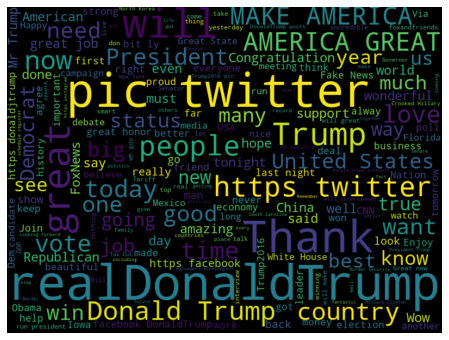

In [12]:
from wordcloud import WordCloud
positive_words=' '.join([text for text in df['tweet'][df['label']==1]])
wordcloud=WordCloud(width=800, height=600, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Trump has tweeted positively about America, white house.

### 2.12 Wordcloud for Donald Trump's tweets with negative sentiment

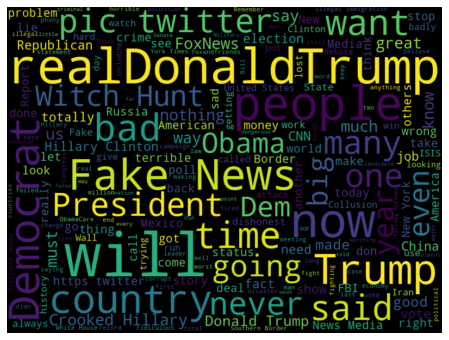

In [13]:
from wordcloud import WordCloud
negative_words=' '.join([text for text in df['tweet'][df['label']==0]])
wordcloud=WordCloud(width=800, height=600, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Trump has tweeted nagatively about Hillary Clinton, fake, Russia, China

## 2.2 Topic Modelling 

In [14]:
#functioning for cleaning the tweets

def standardize_report(pid, report='tweet'):
    # Print player information
    twt = df.loc[pid]
    print(twt['conversation_id'], twt['created_at'], twt['date'], twt['time'], twt['timezone'], twt['user_id'], '\n')
    
    # Extract report from data frame
    s = df.at[pid, report]
    
    # Convert text to lower case
    s = s.lower()
    
    # Remove unnecessary punctuation
    s = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",s).split())
    # Regular expression tokenization - Method 1
    words = regexp_tokenize(s, '[^. ]+')
    
    # Filter stop words from tokenized words
    words = [word for word in words if word not in stopwords.words('english') if word != "he's"]
    
    # Lemmatizataion
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(word) for word in words]
    
    return words

<>:15: DeprecationWarning: invalid escape sequence \w
<>:15: DeprecationWarning: invalid escape sequence \w
<>:15: DeprecationWarning: invalid escape sequence \w
<ipython-input-14-3dd4f072e5fa>:15: DeprecationWarning: invalid escape sequence \w
  s = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",s).split())


In [15]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

<>:10: DeprecationWarning: invalid escape sequence \s
<>:10: DeprecationWarning: invalid escape sequence \s
<>:10: DeprecationWarning: invalid escape sequence \s
<ipython-input-15-869d16050efb>:10: DeprecationWarning: invalid escape sequence \s
  tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet


In [16]:
tweet_link_removed = []
tweet_user_removed = []
for i in range(0, len(df['tweet'])):
    tweet_link_removed.append(remove_links(df['tweet'][i]))
#     df['tweet_user_removed']=remove_users(i)
df_link=df
#del df_link['tweet_user_removed']
for i in range(0, len(df_link)):
    tweet_user_removed.append(remove_users(tweet_link_removed[i]))
df_link['tweet_user_removed'] = tweet_user_removed
df_link.head()               

id  conversation_id    created_at        date      time  \
0  1.200000e+18     1.200000e+18  1.570000e+12  11/24/2019  18:33:02   
1  1.200000e+18     1.200000e+18  1.570000e+12  11/24/2019  18:33:02   
2  1.200000e+18     1.200000e+18  1.570000e+12  11/24/2019  18:32:58   
3  1.200000e+18     1.200000e+18  1.570000e+12  11/24/2019  17:42:25   
4  1.200000e+18     1.200000e+18  1.570000e+12  11/24/2019  17:16:30   

                timezone   user_id         username             name place  \
0  Eastern Standard Time  25073877  realdonaldtrump  Donald J. Trump   NaN   
1  Eastern Standard Time  25073877  realdonaldtrump  Donald J. Trump   NaN   
2  Eastern Standard Time  25073877  realdonaldtrump  Donald J. Trump   NaN   
3  Eastern Standard Time  25073877  realdonaldtrump  Donald J. Trump   NaN   
4  Eastern Standard Time  25073877  realdonaldtrump  Donald J. Trump   NaN   

                                                                                                                                                                                                                                                                                     tweet  \
0                               ....honors that he has earned, including his Trident Pin. Admiral and now Ambassador to Norway Ken Braithwaite will be nominated by me to be the new Secretary of the Navy. A man of great achievement and success, I know Ken will do an outstanding job!   
1   ....contracting procedures were not addressed to my satisfaction. Therefore, Secretary of the Navy Richard Spencer’s services have been terminated by Secretary of Defense Mark Esper. I thank Richard for his service & commitment. Eddie will retire peacefully with all of the.....   
2  I was not pleased with the way that Navy Seal Eddie Gallagher’s trial was handled by the Navy. He was treated very badly but, despite this, was completely exonerated on all major charges. I then restored Eddie’s rank. Likewise, large cost overruns from past administration’s.....   
3                                                                                            Democrats going back to their Districts for Thanksgiving are getting absolutely hammered by their constituents over the phony Impeachment Scam. Republicans will have a great #2020 Election!   
4                                                             “The whole Russia thing was a Hoax, and the Ukraine thing is a Hoax, and the Democrats are a Joke. This is a disaster for them!” @DevinNunes @FoxNews The Do Nothing Democrats are hurting our Country, and they don’t care!   

                    mentions urls photos  replies_count  retweets_count  \
0                         []   []     []           3785            7696   
1                         []   []     []           1522            6765   
2                         []   []     []           6382           10068   
3                         []   []     []          10503           12711   
4  ['devinnunes', 'foxnews']   []     []           8012           12418   

   likes_count hashtags cashtags  \
0        28138       []       []   
1        24568       []       []   
2        34823       []       []   
3        48162       []       []   
4        41014       []       []   

                                                             link  retweet  \
0  https://twitter.com/realDonaldTrump/status/1198746377720909824    False   
1  https://twitter.com/realDonaldTrump/status/1198746376420679680    False   
2  https://twitter.com/realDonaldTrump/status/1198746358091530241    False   
3  https://twitter.com/realDonaldTrump/status/1198733640722718725    False   
4  https://twitter.com/realDonaldTrump/status/1198727115006513157    False   

  quote_url  video  near  geo  source  user_rt_id  user_rt  retweet_id  \
0       NaN      0   NaN  NaN     NaN         NaN      NaN         NaN   
1       NaN      0   NaN  NaN     NaN         NaN      NaN         NaN   
2       NaN      0   NaN  NaN     N

In [17]:
trump_words = []

for pid in range(1, len(df)):
    trump_words = trump_words + (standardize_report(pid))
    
len(trump_words)


1.2e+18 1570000000000.0 11/24/2019 18:33:02 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 18:32:58 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 17:42:25 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 17:16:30 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 17:01:56 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 14:58:51 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 14:44:53 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 14:14:07 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 14:10:59 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 14:08:30 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 14:07:05 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 13:35:49 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 13:30:39 Eastern Standard Time 25073877 


1.2e+18 1570000000000.0 11/16/2019 21:23:27 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/16/2019 21:22:20 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/16/2019 13:48:46 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/16/2019 13:44:16 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/16/2019 13:38:10 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/16/2019 12:57:51 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/16/2019 10:38:36 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/16/2019 10:38:34 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/16/2019 10:18:27 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/16/2019 8:51:34 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/16/2019 8:08:14 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/15/2019 21:39:50 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/15/2019 19:33:20 Eastern Standard Time 25073877 

1

1.19e+18 1570000000000.0 11/7/2019 10:27:57 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/7/2019 10:18:53 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/7/2019 10:16:15 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/7/2019 9:51:38 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/7/2019 9:00:34 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/7/2019 8:47:57 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/7/2019 8:46:30 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/7/2019 7:28:41 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/7/2019 1:49:46 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/7/2019 0:08:41 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/7/2019 0:08:40 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/7/2019 0:06:41 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/6/2019 22:36:49 Eastern Standard Time 25073877 

1.19e+18

1.19e+18 1570000000000.0 10/31/2019 8:20:12 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/31/2019 0:49:56 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/31/2019 0:36:04 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/31/2019 0:17:08 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/30/2019 21:26:48 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/30/2019 16:42:43 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/30/2019 16:21:54 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/30/2019 15:54:02 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/30/2019 15:49:44 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/30/2019 14:44:32 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/30/2019 14:44:32 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/30/2019 13:54:14 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/30/2019 13:19:56 Eastern Standard Time 2

1.19e+18 1570000000000.0 10/23/2019 14:58:41 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/23/2019 13:48:40 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/23/2019 12:35:23 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/23/2019 12:06:00 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/23/2019 8:40:13 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/23/2019 8:39:20 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/23/2019 8:29:22 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/23/2019 8:29:22 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/23/2019 8:29:22 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/23/2019 7:36:27 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/23/2019 7:32:16 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/23/2019 6:56:02 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/23/2019 0:15:14 Eastern Standard Time 250738

1.18e+18 1570000000000.0 10/16/2019 7:14:11 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/16/2019 7:10:02 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/15/2019 23:22:00 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/15/2019 23:16:57 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/15/2019 23:15:40 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/15/2019 22:21:54 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/15/2019 22:21:54 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/15/2019 18:34:18 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/15/2019 16:05:12 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/15/2019 15:58:53 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/15/2019 14:04:56 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/15/2019 12:41:36 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/15/2019 11:57:15 Eastern Standard Time

1.18e+18 1570000000000.0 10/10/2019 22:37:01 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/10/2019 20:03:55 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/10/2019 16:55:28 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/10/2019 16:07:30 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/10/2019 16:07:30 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/10/2019 10:40:15 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/10/2019 10:40:14 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/10/2019 9:49:52 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/10/2019 9:42:47 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/10/2019 9:39:02 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/10/2019 9:34:09 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/10/2019 9:27:01 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/10/2019 9:27:00 Eastern Standard Time 250

1.18e+18 1570000000000.0 10/5/2019 10:06:47 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/5/2019 9:58:33 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/5/2019 9:49:15 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/5/2019 0:35:28 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/5/2019 0:17:14 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/5/2019 0:11:38 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/5/2019 0:05:38 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 23:49:11 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 23:28:07 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 23:24:58 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 23:24:27 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 23:24:18 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 23:22:45 Eastern Standard Time 25073877 

1.18e

1.18e+18 1570000000000.0 9/30/2019 8:12:47 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/30/2019 8:03:39 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/30/2019 7:48:03 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/30/2019 7:39:41 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 23:01:10 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 22:41:16 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 22:30:17 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 21:11:55 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 21:11:54 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 21:11:54 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 21:11:53 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 20:30:58 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 20:22:14 Eastern Standard Time 25073877 

1.1

1.18e+18 1570000000000.0 9/22/2019 9:39:20 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/22/2019 9:39:19 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/21/2019 21:49:00 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/21/2019 20:15:59 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/21/2019 20:04:46 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/21/2019 20:04:45 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/21/2019 18:47:22 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/21/2019 17:50:08 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/21/2019 17:47:50 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/21/2019 17:47:50 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/21/2019 17:43:07 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/21/2019 17:11:33 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/21/2019 17:10:48 Eastern Standard Time 25073877 

1

1.17e+18 1570000000000.0 9/11/2019 20:23:15 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/11/2019 19:17:19 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/11/2019 19:17:18 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/11/2019 18:47:46 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/11/2019 13:23:45 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/11/2019 8:21:36 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/11/2019 8:19:45 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/11/2019 8:12:58 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/11/2019 8:12:58 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/11/2019 6:42:13 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/11/2019 6:42:13 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/11/2019 6:32:13 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/11/2019 6:14:50 Eastern Standard Time 25073877 

1.17e+1

1.17e+18 1570000000000.0 9/4/2019 17:47:56 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/4/2019 17:08:58 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/4/2019 17:08:58 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/4/2019 17:08:58 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/4/2019 17:08:58 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/4/2019 17:08:57 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/4/2019 10:18:05 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/4/2019 10:18:05 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/4/2019 10:18:04 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/4/2019 9:52:58 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/3/2019 21:39:26 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/3/2019 21:39:25 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/3/2019 21:04:24 Eastern Standard Time 25073877 

1.17e+18 1570

1.17e+18 1570000000000.0 8/28/2019 8:06:23 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/28/2019 7:22:27 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/27/2019 23:23:11 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/27/2019 19:36:43 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/27/2019 19:36:43 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/27/2019 19:30:51 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/27/2019 18:04:01 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/27/2019 17:49:01 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/27/2019 17:46:49 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/27/2019 17:45:53 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/27/2019 17:35:53 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/27/2019 12:37:59 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/27/2019 12:27:17 Eastern Standard Time 25073877 

1

1.16e+18 1570000000000.0 8/21/2019 12:39:32 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/21/2019 9:56:12 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/21/2019 9:56:12 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/21/2019 9:38:25 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/21/2019 8:52:27 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/21/2019 8:52:27 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/21/2019 8:32:37 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/21/2019 8:28:40 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/21/2019 7:52:02 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/21/2019 7:44:37 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/21/2019 7:34:52 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/21/2019 7:34:52 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/21/2019 7:34:52 Eastern Standard Time 25073877 

1.16e+18 15

1.16e+18 1570000000000.0 8/13/2019 17:00:02 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/13/2019 16:41:33 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/13/2019 15:45:16 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/13/2019 15:38:46 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/13/2019 13:43:57 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/13/2019 13:32:14 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/13/2019 13:24:54 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/13/2019 13:17:18 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/13/2019 13:11:02 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/13/2019 10:53:00 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/13/2019 10:10:58 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/13/2019 10:04:43 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/13/2019 9:38:44 Eastern Standard Time 25073877 




1.16e+18 1560000000000.0 8/2/2019 11:05:34 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 8/2/2019 11:05:32 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 8/2/2019 11:05:32 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 8/2/2019 7:58:42 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 8/1/2019 22:44:34 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 8/1/2019 22:15:17 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 8/1/2019 21:18:17 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 8/1/2019 21:03:54 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 8/1/2019 14:48:22 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 8/1/2019 13:26:11 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 8/1/2019 13:26:10 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 8/1/2019 13:26:10 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 8/1/2019 13:26:09 Eastern Standard Time 25073877 

1.16e+18 156

1.15e+18 1560000000000.0 7/26/2019 7:00:49 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/26/2019 6:36:22 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/25/2019 19:25:10 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/25/2019 17:24:21 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/25/2019 17:19:04 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/25/2019 14:03:39 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/25/2019 14:03:38 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/25/2019 13:04:14 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/25/2019 9:00:58 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/25/2019 8:39:21 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/25/2019 8:37:37 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/25/2019 8:07:27 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/25/2019 7:54:46 Eastern Standard Time 25073877 

1.15e+

1.15e+18 1560000000000.0 7/19/2019 8:16:22 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/19/2019 8:16:22 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/19/2019 8:16:21 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/19/2019 7:35:55 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/18/2019 22:54:27 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/18/2019 20:22:45 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/18/2019 20:22:45 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/18/2019 18:14:12 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/18/2019 17:33:36 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/18/2019 16:35:19 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/18/2019 16:13:32 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/18/2019 11:10:21 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/18/2019 11:10:20 Eastern Standard Time 25073877 

1.1

1.15e+18 1560000000000.0 7/11/2019 10:00:12 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/11/2019 10:00:12 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/11/2019 8:08:46 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/11/2019 7:45:02 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/11/2019 7:45:01 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/11/2019 7:42:01 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/11/2019 7:42:01 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/11/2019 7:39:51 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/11/2019 7:39:50 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/11/2019 7:37:23 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/11/2019 6:39:23 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/10/2019 20:12:27 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/10/2019 20:08:20 Eastern Standard Time 25073877 

1.15e+18


1.15e+18 1560000000000.0 7/1/2019 18:18:55 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/1/2019 18:17:52 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/1/2019 18:16:51 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/1/2019 18:15:29 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/1/2019 12:37:21 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/1/2019 12:10:45 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/1/2019 12:10:44 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/1/2019 12:10:44 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/1/2019 11:47:36 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/1/2019 11:47:35 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/1/2019 11:42:09 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/1/2019 11:02:58 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/1/2019 10:57:13 Eastern Standard Time 25073877 

1.15e+18 15

1.14e+18 1560000000000.0 6/18/2019 22:04:07 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/18/2019 21:58:51 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/18/2019 21:52:19 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/18/2019 21:48:36 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/18/2019 19:54:28 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/18/2019 16:32:07 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/18/2019 12:59:12 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/18/2019 12:59:12 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/18/2019 10:22:52 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/18/2019 10:09:23 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/18/2019 9:39:38 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/18/2019 7:30:23 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/18/2019 7:21:34 Eastern Standard Time 25073877 

1.

1.14e+18 1560000000000.0 6/10/2019 6:31:43 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/10/2019 6:00:46 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/9/2019 18:57:11 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/9/2019 18:50:57 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/9/2019 18:50:57 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/9/2019 9:26:08 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/9/2019 8:45:21 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/9/2019 8:26:37 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/9/2019 8:26:37 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/9/2019 8:26:37 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/9/2019 8:26:37 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/9/2019 0:08:26 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/8/2019 23:54:08 Eastern Standard Time 25073877 

1.14e+18 1560000000

1.13e+18 1560000000000.0 5/31/2019 8:38:16 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/30/2019 21:52:12 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/30/2019 19:30:20 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/30/2019 19:30:19 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/30/2019 18:23:21 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/30/2019 17:16:00 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/30/2019 12:30:01 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/30/2019 12:28:40 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/30/2019 12:27:19 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/30/2019 11:34:11 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/30/2019 10:41:24 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/30/2019 9:41:43 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/30/2019 7:57:47 Eastern Standard Time 25073877 

1.

1.13e+18 1560000000000.0 5/21/2019 17:22:52 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/21/2019 17:22:52 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/21/2019 16:52:46 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/21/2019 12:38:40 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/21/2019 12:16:54 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/21/2019 12:16:53 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/21/2019 11:25:09 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/20/2019 22:06:31 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/20/2019 22:02:28 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/20/2019 21:04:55 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/20/2019 20:45:41 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/20/2019 18:39:53 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/20/2019 14:07:30 Eastern Standard Time 25073877 


1.13e+18 1560000000000.0 5/12/2019 21:19:46 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 19:22:39 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 19:19:39 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 19:16:10 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 19:10:43 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 19:03:16 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 17:35:41 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 17:35:41 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 17:06:05 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 17:06:05 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 13:52:27 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 13:12:48 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 13:11:31 Eastern Standard Time 25073877 


1.12e+18 1560000000000.0 5/3/2019 13:06:31 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/3/2019 12:22:14 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/3/2019 11:18:50 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/3/2019 9:35:49 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/3/2019 8:22:02 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/2/2019 23:45:29 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/2/2019 23:45:29 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/2/2019 21:01:02 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/2/2019 20:11:07 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/2/2019 17:33:57 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/2/2019 16:55:09 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/2/2019 12:56:07 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/2/2019 12:29:22 Eastern Standard Time 25073877 

1.12e+18 15600

1.12e+18 1560000000000.0 4/22/2019 15:04:11 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/22/2019 14:59:19 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/22/2019 14:25:26 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/22/2019 14:06:59 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/22/2019 14:05:04 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/22/2019 12:16:38 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/22/2019 10:18:24 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/22/2019 10:11:30 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/22/2019 9:47:41 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/22/2019 9:37:10 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/22/2019 8:52:46 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/21/2019 18:35:16 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/21/2019 10:23:37 Eastern Standard Time 25073877 

1.

1.12e+18 1560000000000.0 4/12/2019 9:37:30 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/12/2019 9:06:42 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/11/2019 20:46:56 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/11/2019 19:57:01 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/11/2019 19:14:47 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/11/2019 17:23:33 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/11/2019 11:35:36 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/11/2019 11:20:19 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/11/2019 7:20:18 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/10/2019 22:52:50 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/10/2019 22:33:10 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/10/2019 21:55:55 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/10/2019 17:41:06 Eastern Standard Time 25073877 

1.

1.11e+18 1550000000000.0 3/29/2019 11:37:09 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/29/2019 11:23:50 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/29/2019 11:09:07 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/29/2019 8:48:51 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/28/2019 23:23:35 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/28/2019 22:41:35 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/28/2019 22:30:19 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/28/2019 21:16:18 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/28/2019 17:06:28 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/28/2019 15:51:49 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/28/2019 15:41:11 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/28/2019 12:11:27 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/28/2019 11:11:47 Eastern Standard Time 25073877 



1.11e+18 1550000000000.0 3/16/2019 16:46:36 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/16/2019 15:32:23 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/16/2019 13:38:50 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/16/2019 13:24:46 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/16/2019 12:16:46 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/16/2019 12:10:39 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/16/2019 12:06:21 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/16/2019 11:56:22 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/16/2019 11:50:36 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/15/2019 17:16:15 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/15/2019 16:46:03 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/15/2019 15:14:10 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/15/2019 15:14:10 Eastern Standard Time 25073877 


1.1e+18 1550000000000.0 3/4/2019 23:33:57 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 3/4/2019 22:50:37 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 3/4/2019 21:10:34 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 3/4/2019 21:04:29 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 3/4/2019 20:59:32 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 3/4/2019 15:17:23 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 3/4/2019 15:06:34 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 3/4/2019 14:53:49 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 3/4/2019 11:17:28 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 3/3/2019 22:10:19 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 3/3/2019 20:28:47 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 3/3/2019 20:24:41 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 3/3/2019 20:01:01 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 3

1.1e+18 1550000000000.0 2/19/2019 7:30:03 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/19/2019 7:21:07 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/18/2019 22:26:47 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/18/2019 22:21:32 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/18/2019 22:13:48 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/18/2019 22:00:50 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/18/2019 21:53:59 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/18/2019 20:17:17 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/18/2019 17:32:53 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/18/2019 17:30:07 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/18/2019 17:26:51 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/18/2019 15:22:58 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/18/2019 8:29:25 Eastern Standard Time 25073877 

1.1e+18 1550000

1.09e+18 1550000000000.0 1/31/2019 8:36:29 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/31/2019 8:21:01 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/31/2019 7:56:36 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/31/2019 7:48:13 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/31/2019 7:41:56 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/31/2019 7:32:16 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/31/2019 7:16:49 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/31/2019 7:13:17 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/31/2019 7:04:57 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/30/2019 16:58:38 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/30/2019 16:58:38 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/30/2019 16:54:12 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/30/2019 8:56:00 Eastern Standard Time 25073877 

1.09e+18 

1.09e+18 1550000000000.0 1/19/2019 9:09:37 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/19/2019 8:50:09 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/19/2019 7:51:30 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/19/2019 7:11:38 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/19/2019 6:29:21 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/18/2019 22:24:49 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/18/2019 22:02:50 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/18/2019 21:14:44 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/18/2019 20:12:08 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/18/2019 17:51:00 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/18/2019 11:58:04 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/18/2019 11:00:07 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/18/2019 10:59:35 Eastern Standard Time 25073877 

1.09

1.08e+18 1550000000000.0 1/6/2019 10:27:49 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/6/2019 9:59:33 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/6/2019 7:33:39 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/6/2019 7:01:42 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/5/2019 21:15:10 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/5/2019 21:06:29 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/5/2019 20:47:56 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/5/2019 20:35:32 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/5/2019 20:00:30 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/5/2019 16:05:59 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/5/2019 15:49:27 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/5/2019 12:27:18 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/5/2019 11:13:07 Eastern Standard Time 25073877 

1.08e+18 155000

1.08e+18 1550000000000.0 12/22/2018 20:59:29 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/22/2018 20:48:23 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/22/2018 18:58:43 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/22/2018 16:12:02 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/22/2018 15:28:21 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/22/2018 15:03:58 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/22/2018 12:02:37 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/22/2018 11:30:35 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/22/2018 11:18:11 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/21/2018 21:49:05 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/21/2018 19:16:55 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/21/2018 18:23:27 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/21/2018 17:14:14 Eastern Standard Ti

1.07e+18 1540000000000.0 12/12/2018 18:50:48 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/12/2018 7:50:17 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/12/2018 7:34:21 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/11/2018 17:09:04 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/11/2018 13:55:06 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/11/2018 13:50:29 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/11/2018 8:30:31 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/11/2018 8:19:26 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/11/2018 8:11:05 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/11/2018 7:42:03 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/11/2018 7:30:57 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/11/2018 7:12:23 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/11/2018 7:04:50 Eastern Standard Time 250738

1.07e+18 1540000000000.0 11/27/2018 22:42:08 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/27/2018 22:38:48 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/27/2018 19:31:37 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/27/2018 14:05:39 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/27/2018 14:05:39 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/27/2018 8:32:57 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/27/2018 8:07:23 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/27/2018 7:42:58 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/27/2018 7:30:37 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/26/2018 15:20:59 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/26/2018 15:20:58 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/26/2018 14:47:29 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/26/2018 14:47:29 Eastern Standard Time 2

1.06e+18 1540000000000.0 11/12/2018 11:31:27 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/12/2018 10:34:09 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/12/2018 7:44:13 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/12/2018 7:21:11 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/12/2018 7:10:16 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/12/2018 7:03:25 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/11/2018 23:38:00 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/11/2018 11:03:35 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/11/2018 9:52:56 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/11/2018 9:16:42 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/11/2018 4:40:50 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/10/2018 17:20:40 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/10/2018 17:19:35 Eastern Standard Time 2507

1.06e+18 1540000000000.0 10/31/2018 23:33:01 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/31/2018 21:43:15 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/31/2018 20:53:19 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/31/2018 16:18:07 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/31/2018 15:25:29 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/31/2018 15:24:22 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/31/2018 13:19:27 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/31/2018 12:43:19 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/31/2018 11:28:57 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/31/2018 11:25:01 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/31/2018 10:19:51 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/31/2018 10:17:34 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/31/2018 9:25:17 Eastern Standard Tim

1.05e+18 1540000000000.0 10/22/2018 8:37:40 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/22/2018 8:26:10 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/21/2018 21:49:29 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/21/2018 18:48:55 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/21/2018 15:26:12 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/21/2018 15:14:24 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/21/2018 15:11:52 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/20/2018 22:45:20 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/20/2018 20:36:13 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/20/2018 16:12:52 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/20/2018 12:30:00 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/20/2018 12:19:05 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/20/2018 11:03:27 Eastern Standard Time

1.05e+18 1540000000000.0 10/9/2018 12:07:03 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/9/2018 12:00:05 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/9/2018 12:00:04 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/9/2018 10:18:47 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/9/2018 9:10:01 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/9/2018 8:37:55 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/9/2018 8:32:46 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/8/2018 21:34:56 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/8/2018 19:43:34 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/8/2018 15:44:49 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/8/2018 15:37:36 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/8/2018 15:27:41 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/8/2018 14:57:07 Eastern Standard Time 25073877 

1.

1.04e+18 1540000000000.0 9/21/2018 16:51:44 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 16:11:48 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 13:22:35 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 11:29:34 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 10:41:18 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 10:35:11 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 9:29:47 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 9:23:32 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 9:14:33 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 8:56:46 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 0:05:52 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/20/2018 23:33:30 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/20/2018 23:29:03 Eastern Standard Time 25073877 

1.04

1.04e+18 1540000000000.0 9/10/2018 15:35:06 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/10/2018 10:42:34 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/10/2018 9:57:18 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/10/2018 8:36:53 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/10/2018 7:46:35 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/10/2018 7:35:54 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/10/2018 7:22:29 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/10/2018 7:10:27 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/10/2018 7:03:40 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/9/2018 13:28:17 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/9/2018 11:31:58 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/9/2018 11:21:22 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/9/2018 10:42:41 Eastern Standard Time 25073877 

1.04e+18 1

1.04e+18 1540000000000.0 8/30/2018 6:50:20 Eastern Standard Time 25073877 

1.03e+18 1540000000000.0 8/29/2018 22:27:24 Eastern Standard Time 25073877 

1.03e+18 1540000000000.0 8/29/2018 21:51:50 Eastern Standard Time 25073877 

1.03e+18 1540000000000.0 8/29/2018 21:43:30 Eastern Standard Time 25073877 

1.03e+18 1540000000000.0 8/29/2018 20:44:26 Eastern Standard Time 25073877 

1.03e+18 1540000000000.0 8/29/2018 18:43:49 Eastern Standard Time 25073877 

1.03e+18 1540000000000.0 8/29/2018 17:23:10 Eastern Standard Time 25073877 

1.03e+18 1540000000000.0 8/29/2018 17:23:10 Eastern Standard Time 25073877 

1.03e+18 1540000000000.0 8/29/2018 17:23:09 Eastern Standard Time 25073877 

1.03e+18 1540000000000.0 8/29/2018 17:23:08 Eastern Standard Time 25073877 

1.03e+18 1540000000000.0 8/29/2018 16:55:45 Eastern Standard Time 25073877 

1.03e+18 1540000000000.0 8/29/2018 11:12:23 Eastern Standard Time 25073877 

1.03e+18 1540000000000.0 8/29/2018 10:56:38 Eastern Standard Time 25073877 



1.03e+18 1530000000000.0 8/19/2018 7:15:12 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/19/2018 7:01:47 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/18/2018 18:12:30 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/18/2018 17:51:11 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/18/2018 15:39:35 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/18/2018 9:39:28 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/18/2018 9:34:49 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/18/2018 9:12:43 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/18/2018 9:06:30 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/18/2018 7:46:14 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/18/2018 7:40:11 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/18/2018 7:32:17 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/18/2018 7:23:00 Eastern Standard Time 25073877 

1.03e+18 

1.03e+18 1530000000000.0 8/7/2018 23:23:54 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/7/2018 23:18:36 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/7/2018 22:59:39 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/7/2018 14:25:13 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/7/2018 6:46:45 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/7/2018 5:31:46 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/6/2018 17:53:42 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/6/2018 17:46:47 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/6/2018 15:13:42 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/6/2018 13:43:57 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/6/2018 11:48:40 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/6/2018 10:52:46 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/6/2018 10:25:56 Eastern Standard Time 25073877 

1.03e+18 15300

1.02e+18 1530000000000.0 7/28/2018 12:37:29 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/27/2018 21:53:48 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/27/2018 20:47:58 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/27/2018 18:45:56 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/27/2018 16:08:06 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/27/2018 15:23:07 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/27/2018 14:16:46 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/27/2018 12:20:37 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/27/2018 12:12:14 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/27/2018 11:58:45 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/27/2018 11:53:20 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/27/2018 11:53:20 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/27/2018 9:17:09 Eastern Standard Time 25073877 



1.02e+18 1530000000000.0 7/18/2018 6:08:36 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/18/2018 5:53:41 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/18/2018 0:10:19 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/17/2018 20:27:37 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/17/2018 20:21:54 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/17/2018 10:39:08 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/17/2018 10:33:47 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/17/2018 10:22:28 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/17/2018 9:53:39 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/16/2018 18:53:47 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/16/2018 16:34:07 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/16/2018 16:29:54 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/16/2018 15:40:23 Eastern Standard Time 25073877 

1.0

1.01e+18 1530000000000.0 7/2/2018 17:48:02 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/1/2018 23:01:30 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/1/2018 15:39:28 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/1/2018 8:11:05 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/1/2018 8:00:03 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/30/2018 15:44:09 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/30/2018 15:31:42 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/30/2018 15:26:12 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/30/2018 15:17:42 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/30/2018 15:05:48 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/30/2018 8:33:55 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/30/2018 7:37:03 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/30/2018 7:22:41 Eastern Standard Time 25073877 

1.01e+18 

1.01e+18 1530000000000.0 6/20/2018 10:00:18 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/20/2018 9:41:25 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/20/2018 8:25:17 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/19/2018 22:36:54 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/19/2018 22:17:37 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/19/2018 21:06:27 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/19/2018 14:04:17 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/19/2018 13:35:39 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/19/2018 11:22:29 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/19/2018 10:11:51 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/19/2018 10:07:02 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/19/2018 9:52:24 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/19/2018 9:52:18 Eastern Standard Time 25073877 

1.0

1e+18 1530000000000.0 6/7/2018 10:07:16 Eastern Standard Time 25073877 

1e+18 1530000000000.0 6/7/2018 10:01:01 Eastern Standard Time 25073877 

1e+18 1530000000000.0 6/7/2018 9:49:41 Eastern Standard Time 25073877 

1e+18 1530000000000.0 6/7/2018 9:07:56 Eastern Standard Time 25073877 

1e+18 1530000000000.0 6/7/2018 9:05:24 Eastern Standard Time 25073877 

1e+18 1530000000000.0 6/7/2018 8:07:10 Eastern Standard Time 25073877 

1e+18 1530000000000.0 6/7/2018 7:57:03 Eastern Standard Time 25073877 

1e+18 1530000000000.0 6/6/2018 17:41:09 Eastern Standard Time 25073877 

1e+18 1530000000000.0 6/6/2018 16:09:03 Eastern Standard Time 25073877 

1e+18 1530000000000.0 6/6/2018 15:37:37 Eastern Standard Time 25073877 

1e+18 1530000000000.0 6/6/2018 10:43:35 Eastern Standard Time 25073877 

1e+18 1530000000000.0 6/6/2018 10:04:29 Eastern Standard Time 25073877 

1e+18 1530000000000.0 6/6/2018 9:54:17 Eastern Standard Time 25073877 

1e+18 1530000000000.0 6/6/2018 9:48:20 Eastern Standard T

1e+18 1530000000000.0 5/25/2018 13:22:37 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/25/2018 13:12:13 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/25/2018 8:14:07 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/25/2018 8:04:20 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/25/2018 8:04:19 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/25/2018 8:04:17 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/25/2018 8:04:16 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/24/2018 17:18:32 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/24/2018 13:54:36 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/24/2018 12:57:51 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/24/2018 12:24:38 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/24/2018 12:18:25 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/24/2018 8:34:29 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/24/2018 8:21:08 East

9.95e+17 1530000000000.0 5/11/2018 15:30:16 Eastern Standard Time 25073877 

9.95e+17 1530000000000.0 5/10/2018 20:49:43 Eastern Standard Time 25073877 

9.95e+17 1530000000000.0 5/10/2018 10:37:57 Eastern Standard Time 25073877 

9.95e+17 1530000000000.0 5/10/2018 10:33:00 Eastern Standard Time 25073877 

9.95e+17 1530000000000.0 5/10/2018 10:30:27 Eastern Standard Time 25073877 

9.95e+17 1530000000000.0 5/10/2018 6:01:43 Eastern Standard Time 25073877 

9.94e+17 1530000000000.0 5/9/2018 22:19:02 Eastern Standard Time 25073877 

9.94e+17 1530000000000.0 5/9/2018 18:41:03 Eastern Standard Time 25073877 

9.94e+17 1530000000000.0 5/9/2018 18:38:10 Eastern Standard Time 25073877 

9.94e+17 1530000000000.0 5/9/2018 8:35:51 Eastern Standard Time 25073877 

9.94e+17 1530000000000.0 5/9/2018 8:30:56 Eastern Standard Time 25073877 

9.94e+17 1530000000000.0 5/9/2018 8:00:30 Eastern Standard Time 25073877 

9.94e+17 1530000000000.0 5/9/2018 7:48:17 Eastern Standard Time 25073877 

9.94e+17 15

9.88e+17 1520000000000.0 4/21/2018 14:52:28 Eastern Standard Time 25073877 

9.88e+17 1520000000000.0 4/21/2018 11:47:48 Eastern Standard Time 25073877 

9.88e+17 1520000000000.0 4/21/2018 11:45:24 Eastern Standard Time 25073877 

9.88e+17 1520000000000.0 4/21/2018 11:44:55 Eastern Standard Time 25073877 

9.88e+17 1520000000000.0 4/21/2018 9:18:58 Eastern Standard Time 25073877 

9.88e+17 1520000000000.0 4/21/2018 9:10:01 Eastern Standard Time 25073877 

9.88e+17 1520000000000.0 4/21/2018 9:10:01 Eastern Standard Time 25073877 

9.88e+17 1520000000000.0 4/21/2018 9:10:00 Eastern Standard Time 25073877 

9.88e+17 1520000000000.0 4/20/2018 23:22:51 Eastern Standard Time 25073877 

9.88e+17 1520000000000.0 4/20/2018 23:13:07 Eastern Standard Time 25073877 

9.87e+17 1520000000000.0 4/20/2018 19:19:51 Eastern Standard Time 25073877 

9.87e+17 1520000000000.0 4/20/2018 18:50:34 Eastern Standard Time 25073877 

9.87e+17 1520000000000.0 4/20/2018 16:25:13 Eastern Standard Time 25073877 

9.8


9.81e+17 1520000000000.0 4/3/2018 15:15:42 Eastern Standard Time 25073877 

9.81e+17 1520000000000.0 4/3/2018 9:55:37 Eastern Standard Time 25073877 

9.81e+17 1520000000000.0 4/3/2018 7:08:51 Eastern Standard Time 25073877 

9.81e+17 1520000000000.0 4/3/2018 6:58:30 Eastern Standard Time 25073877 

9.81e+17 1520000000000.0 4/3/2018 6:49:07 Eastern Standard Time 25073877 

9.81e+17 1520000000000.0 4/3/2018 6:34:18 Eastern Standard Time 25073877 

9.81e+17 1520000000000.0 4/2/2018 22:03:18 Eastern Standard Time 25073877 

9.81e+17 1520000000000.0 4/2/2018 20:34:48 Eastern Standard Time 25073877 

9.81e+17 1520000000000.0 4/2/2018 20:24:01 Eastern Standard Time 25073877 

9.81e+17 1520000000000.0 4/2/2018 20:12:03 Eastern Standard Time 25073877 

9.81e+17 1520000000000.0 4/2/2018 20:00:58 Eastern Standard Time 25073877 

9.81e+17 1520000000000.0 4/2/2018 12:38:29 Eastern Standard Time 25073877 

9.81e+17 1520000000000.0 4/2/2018 11:41:04 Eastern Standard Time 25073877 

9.81e+17 1520000

9.74e+17 1520000000000.0 3/13/2018 10:37:15 Eastern Standard Time 25073877 

9.74e+17 1520000000000.0 3/13/2018 8:44:33 Eastern Standard Time 25073877 

9.74e+17 1520000000000.0 3/13/2018 8:28:03 Eastern Standard Time 25073877 

9.73e+17 1520000000000.0 3/12/2018 20:49:27 Eastern Standard Time 25073877 

9.73e+17 1520000000000.0 3/12/2018 17:13:12 Eastern Standard Time 25073877 

9.73e+17 1520000000000.0 3/12/2018 10:43:36 Eastern Standard Time 25073877 

9.73e+17 1520000000000.0 3/12/2018 10:12:11 Eastern Standard Time 25073877 

9.73e+17 1520000000000.0 3/12/2018 9:22:38 Eastern Standard Time 25073877 

9.73e+17 1520000000000.0 3/12/2018 9:15:57 Eastern Standard Time 25073877 

9.73e+17 1520000000000.0 3/12/2018 8:20:03 Eastern Standard Time 25073877 

9.73e+17 1520000000000.0 3/11/2018 11:16:22 Eastern Standard Time 25073877 

9.73e+17 1520000000000.0 3/11/2018 10:49:29 Eastern Standard Time 25073877 

9.73e+17 1520000000000.0 3/11/2018 10:02:23 Eastern Standard Time 25073877 

9.73

9.67e+17 1520000000000.0 2/23/2018 8:01:09 Eastern Standard Time 25073877 

9.67e+17 1520000000000.0 2/23/2018 6:28:35 Eastern Standard Time 25073877 

9.67e+17 1520000000000.0 2/22/2018 20:26:26 Eastern Standard Time 25073877 

9.67e+17 1520000000000.0 2/22/2018 15:07:20 Eastern Standard Time 25073877 

9.67e+17 1520000000000.0 2/22/2018 11:29:50 Eastern Standard Time 25073877 

9.67e+17 1520000000000.0 2/22/2018 9:53:52 Eastern Standard Time 25073877 

9.67e+17 1520000000000.0 2/22/2018 9:31:35 Eastern Standard Time 25073877 

9.67e+17 1520000000000.0 2/22/2018 8:13:32 Eastern Standard Time 25073877 

9.67e+17 1520000000000.0 2/22/2018 8:05:18 Eastern Standard Time 25073877 

9.67e+17 1520000000000.0 2/22/2018 7:54:09 Eastern Standard Time 25073877 

9.67e+17 1520000000000.0 2/22/2018 7:40:08 Eastern Standard Time 25073877 

9.67e+17 1520000000000.0 2/22/2018 7:26:28 Eastern Standard Time 25073877 

9.66e+17 1520000000000.0 2/21/2018 20:40:33 Eastern Standard Time 25073877 

9.66e+17

9.59e+17 1520000000000.0 2/2/2018 13:05:49 Eastern Standard Time 25073877 

9.59e+17 1520000000000.0 2/2/2018 6:49:14 Eastern Standard Time 25073877 

9.59e+17 1520000000000.0 2/2/2018 6:33:58 Eastern Standard Time 25073877 

9.59e+17 1520000000000.0 2/1/2018 22:32:48 Eastern Standard Time 25073877 

9.59e+17 1520000000000.0 2/1/2018 7:02:49 Eastern Standard Time 25073877 

9.59e+17 1520000000000.0 2/1/2018 6:51:43 Eastern Standard Time 25073877 

9.59e+17 1520000000000.0 2/1/2018 6:43:17 Eastern Standard Time 25073877 

9.59e+17 1520000000000.0 1/30/2018 21:00:02 Eastern Standard Time 25073877 

9.58e+17 1520000000000.0 1/29/2018 15:12:39 Eastern Standard Time 25073877 

9.58e+17 1520000000000.0 1/28/2018 8:18:33 Eastern Standard Time 25073877 

9.58e+17 1520000000000.0 1/28/2018 8:18:32 Eastern Standard Time 25073877 

9.57e+17 1520000000000.0 1/27/2018 23:08:02 Eastern Standard Time 25073877 

9.57e+17 1520000000000.0 1/27/2018 22:58:02 Eastern Standard Time 25073877 

9.57e+17 1520

9.51e+17 1520000000000.0 1/10/2018 10:00:29 Eastern Standard Time 25073877 

9.51e+17 1520000000000.0 1/10/2018 9:11:13 Eastern Standard Time 25073877 

9.51e+17 1520000000000.0 1/9/2018 23:23:58 Eastern Standard Time 25073877 

9.51e+17 1520000000000.0 1/9/2018 22:48:26 Eastern Standard Time 25073877 

9.51e+17 1520000000000.0 1/9/2018 19:16:57 Eastern Standard Time 25073877 

9.51e+17 1520000000000.0 1/9/2018 18:07:09 Eastern Standard Time 25073877 

9.51e+17 1520000000000.0 1/9/2018 17:51:50 Eastern Standard Time 25073877 

9.51e+17 1520000000000.0 1/9/2018 15:17:17 Eastern Standard Time 25073877 

9.51e+17 1520000000000.0 1/9/2018 12:11:23 Eastern Standard Time 25073877 

9.51e+17 1520000000000.0 1/8/2018 18:19:47 Eastern Standard Time 25073877 

9.51e+17 1520000000000.0 1/8/2018 17:59:37 Eastern Standard Time 25073877 

9.51e+17 1520000000000.0 1/8/2018 17:58:13 Eastern Standard Time 25073877 

9.5e+17 1520000000000.0 1/8/2018 14:06:40 Eastern Standard Time 25073877 

9.5e+17 1520

9.44e+17 1510000000000.0 12/21/2017 7:45:17 Eastern Standard Time 25073877 

9.44e+17 1510000000000.0 12/21/2017 7:24:22 Eastern Standard Time 25073877 

9.44e+17 1510000000000.0 12/20/2017 16:44:50 Eastern Standard Time 25073877 

9.44e+17 1510000000000.0 12/20/2017 13:09:44 Eastern Standard Time 25073877 

9.44e+17 1510000000000.0 12/20/2017 12:30:26 Eastern Standard Time 25073877 

9.44e+17 1510000000000.0 12/20/2017 11:39:04 Eastern Standard Time 25073877 

9.43e+17 1510000000000.0 12/20/2017 9:32:51 Eastern Standard Time 25073877 

9.43e+17 1510000000000.0 12/20/2017 1:09:06 Eastern Standard Time 25073877 

9.43e+17 1510000000000.0 12/19/2017 15:18:12 Eastern Standard Time 25073877 

9.43e+17 1510000000000.0 12/19/2017 10:07:01 Eastern Standard Time 25073877 

9.43e+17 1510000000000.0 12/19/2017 6:23:40 Eastern Standard Time 25073877 

9.43e+17 1510000000000.0 12/19/2017 6:04:11 Eastern Standard Time 25073877 

9.43e+17 1510000000000.0 12/18/2017 19:54:32 Eastern Standard Time 250

9.37e+17 1510000000000.0 12/1/2017 6:21:06 Eastern Standard Time 25073877 

9.37e+17 1510000000000.0 12/1/2017 6:13:35 Eastern Standard Time 25073877 

9.37e+17 1510000000000.0 12/1/2017 6:03:35 Eastern Standard Time 25073877 

9.36e+17 1510000000000.0 11/30/2017 22:30:42 Eastern Standard Time 25073877 

9.36e+17 1510000000000.0 11/30/2017 19:42:21 Eastern Standard Time 25073877 

9.36e+17 1510000000000.0 11/30/2017 19:36:40 Eastern Standard Time 25073877 

9.36e+17 1510000000000.0 11/30/2017 16:50:33 Eastern Standard Time 25073877 

9.36e+17 1510000000000.0 11/30/2017 16:00:50 Eastern Standard Time 25073877 

9.36e+17 1510000000000.0 11/30/2017 14:26:42 Eastern Standard Time 25073877 

9.36e+17 1510000000000.0 11/30/2017 10:46:39 Eastern Standard Time 25073877 

9.36e+17 1510000000000.0 11/30/2017 8:05:21 Eastern Standard Time 25073877 

9.36e+17 1510000000000.0 11/30/2017 7:25:00 Eastern Standard Time 25073877 

9.36e+17 1510000000000.0 11/30/2017 7:15:08 Eastern Standard Time 250738

9.31e+17 1510000000000.0 11/15/2017 5:58:18 Eastern Standard Time 25073877 

9.31e+17 1510000000000.0 11/15/2017 5:53:42 Eastern Standard Time 25073877 

9.31e+17 1510000000000.0 11/15/2017 5:45:39 Eastern Standard Time 25073877 

9.31e+17 1510000000000.0 11/15/2017 5:40:02 Eastern Standard Time 25073877 

9.31e+17 1510000000000.0 11/15/2017 5:30:58 Eastern Standard Time 25073877 

9.31e+17 1510000000000.0 11/14/2017 23:42:16 Eastern Standard Time 25073877 

9.3e+17 1510000000000.0 11/14/2017 12:39:54 Eastern Standard Time 25073877 

9.3e+17 1510000000000.0 11/14/2017 4:11:51 Eastern Standard Time 25073877 

9.3e+17 1510000000000.0 11/14/2017 3:07:29 Eastern Standard Time 25073877 

9.3e+17 1510000000000.0 11/14/2017 1:23:12 Eastern Standard Time 25073877 

9.3e+17 1510000000000.0 11/14/2017 0:26:45 Eastern Standard Time 25073877 

9.3e+17 1510000000000.0 11/14/2017 0:20:31 Eastern Standard Time 25073877 

9.3e+17 1510000000000.0 11/14/2017 0:08:19 Eastern Standard Time 25073877 

9.3e

9.25e+17 1510000000000.0 10/31/2017 15:41:25 Eastern Standard Time 25073877 

9.25e+17 1510000000000.0 10/31/2017 15:14:31 Eastern Standard Time 25073877 

9.25e+17 1510000000000.0 10/31/2017 14:11:11 Eastern Standard Time 25073877 

9.25e+17 1510000000000.0 10/31/2017 12:08:36 Eastern Standard Time 25073877 

9.25e+17 1510000000000.0 10/31/2017 10:46:24 Eastern Standard Time 25073877 

9.25e+17 1510000000000.0 10/31/2017 10:10:42 Eastern Standard Time 25073877 

9.25e+17 1510000000000.0 10/31/2017 10:06:27 Eastern Standard Time 25073877 

9.25e+17 1510000000000.0 10/31/2017 8:21:06 Eastern Standard Time 25073877 

9.25e+17 1510000000000.0 10/31/2017 8:16:08 Eastern Standard Time 25073877 

9.25e+17 1510000000000.0 10/31/2017 8:09:41 Eastern Standard Time 25073877 

9.25e+17 1510000000000.0 10/30/2017 10:28:10 Eastern Standard Time 25073877 

9.25e+17 1510000000000.0 10/30/2017 10:25:09 Eastern Standard Time 25073877 

9.25e+17 1510000000000.0 10/30/2017 7:50:26 Eastern Standard Time 2

9.21e+17 1510000000000.0 10/18/2017 6:38:18 Eastern Standard Time 25073877 

9.21e+17 1510000000000.0 10/18/2017 6:27:29 Eastern Standard Time 25073877 

9.21e+17 1510000000000.0 10/18/2017 6:21:00 Eastern Standard Time 25073877 

9.2e+17 1510000000000.0 10/17/2017 22:21:16 Eastern Standard Time 25073877 

9.2e+17 1510000000000.0 10/17/2017 20:44:43 Eastern Standard Time 25073877 

9.2e+17 1510000000000.0 10/17/2017 19:06:01 Eastern Standard Time 25073877 

9.2e+17 1510000000000.0 10/17/2017 19:03:32 Eastern Standard Time 25073877 

9.2e+17 1510000000000.0 10/17/2017 17:56:08 Eastern Standard Time 25073877 

9.2e+17 1510000000000.0 10/17/2017 17:51:34 Eastern Standard Time 25073877 

9.2e+17 1510000000000.0 10/17/2017 14:59:43 Eastern Standard Time 25073877 

9.2e+17 1510000000000.0 10/17/2017 13:25:44 Eastern Standard Time 25073877 

9.2e+17 1510000000000.0 10/17/2017 12:16:28 Eastern Standard Time 25073877 

9.2e+17 1510000000000.0 10/17/2017 8:39:45 Eastern Standard Time 25073877 



9.15e+17 1510000000000.0 10/2/2017 7:11:37 Eastern Standard Time 25073877 

9.15e+17 1510000000000.0 10/1/2017 21:22:34 Eastern Standard Time 25073877 

9.15e+17 1510000000000.0 10/1/2017 15:01:19 Eastern Standard Time 25073877 

9.14e+17 1510000000000.0 10/1/2017 10:31:15 Eastern Standard Time 25073877 

9.14e+17 1510000000000.0 10/1/2017 10:30:59 Eastern Standard Time 25073877 

9.14e+17 1510000000000.0 10/1/2017 8:30:17 Eastern Standard Time 25073877 

9.14e+17 1510000000000.0 10/1/2017 8:26:26 Eastern Standard Time 25073877 

9.14e+17 1510000000000.0 10/1/2017 8:22:14 Eastern Standard Time 25073877 

9.14e+17 1510000000000.0 9/30/2017 22:08:00 Eastern Standard Time 25073877 

9.14e+17 1510000000000.0 9/30/2017 19:24:18 Eastern Standard Time 25073877 

9.14e+17 1510000000000.0 9/30/2017 18:46:47 Eastern Standard Time 25073877 

9.14e+17 1510000000000.0 9/30/2017 18:26:55 Eastern Standard Time 25073877 

9.14e+17 1510000000000.0 9/30/2017 18:15:02 Eastern Standard Time 25073877 

9.1


9.11e+17 1510000000000.0 9/21/2017 18:26:29 Eastern Standard Time 25073877 

9.11e+17 1510000000000.0 9/21/2017 18:23:44 Eastern Standard Time 25073877 

9.11e+17 1510000000000.0 9/21/2017 13:58:30 Eastern Standard Time 25073877 

9.11e+17 1510000000000.0 9/21/2017 12:06:32 Eastern Standard Time 25073877 

9.11e+17 1510000000000.0 9/21/2017 11:17:42 Eastern Standard Time 25073877 

9.11e+17 1510000000000.0 9/21/2017 11:15:19 Eastern Standard Time 25073877 

9.11e+17 1510000000000.0 9/20/2017 23:13:07 Eastern Standard Time 25073877 

9.11e+17 1510000000000.0 9/20/2017 21:06:25 Eastern Standard Time 25073877 

9.11e+17 1510000000000.0 9/20/2017 20:42:17 Eastern Standard Time 25073877 

9.11e+17 1510000000000.0 9/20/2017 19:07:55 Eastern Standard Time 25073877 

9.11e+17 1510000000000.0 9/20/2017 18:42:35 Eastern Standard Time 25073877 

9.11e+17 1510000000000.0 9/20/2017 18:29:44 Eastern Standard Time 25073877 

9.11e+17 1510000000000.0 9/20/2017 15:05:18 Eastern Standard Time 25073877 

9.05e+17 1500000000000.0 9/5/2017 8:04:43 Eastern Standard Time 25073877 

9.05e+17 1500000000000.0 9/4/2017 22:49:26 Eastern Standard Time 25073877 

9.05e+17 1500000000000.0 9/4/2017 12:38:46 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/3/2017 12:14:31 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/3/2017 12:07:32 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/3/2017 7:46:07 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/3/2017 7:39:38 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/3/2017 7:30:41 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/3/2017 1:17:04 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/2/2017 23:02:31 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/2/2017 22:57:43 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/2/2017 22:50:58 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/2/2017 21:55:30 Eastern Standard Time 25073877 

9.04e+17 15000000

8.98e+17 1500000000000.0 8/17/2017 9:21:45 Eastern Standard Time 25073877 

8.98e+17 1500000000000.0 8/17/2017 9:15:58 Eastern Standard Time 25073877 

8.98e+17 1500000000000.0 8/17/2017 9:07:28 Eastern Standard Time 25073877 

8.98e+17 1500000000000.0 8/17/2017 8:59:02 Eastern Standard Time 25073877 

8.98e+17 1500000000000.0 8/17/2017 6:56:33 Eastern Standard Time 25073877 

8.98e+17 1500000000000.0 8/17/2017 6:32:11 Eastern Standard Time 25073877 

8.98e+17 1500000000000.0 8/17/2017 6:24:05 Eastern Standard Time 25073877 

8.98e+17 1500000000000.0 8/17/2017 6:19:39 Eastern Standard Time 25073877 

8.98e+17 1500000000000.0 8/16/2017 22:55:18 Eastern Standard Time 25073877 

8.98e+17 1500000000000.0 8/16/2017 20:11:28 Eastern Standard Time 25073877 

8.98e+17 1500000000000.0 8/16/2017 17:35:16 Eastern Standard Time 25073877 

8.98e+17 1500000000000.0 8/16/2017 15:49:31 Eastern Standard Time 25073877 

8.98e+17 1500000000000.0 8/16/2017 13:14:27 Eastern Standard Time 25073877 

8.98e+1

8.91e+17 1500000000000.0 7/29/2017 19:15:57 Eastern Standard Time 25073877 

8.91e+17 1500000000000.0 7/29/2017 16:36:52 Eastern Standard Time 25073877 

8.91e+17 1500000000000.0 7/29/2017 13:04:20 Eastern Standard Time 25073877 

8.91e+17 1500000000000.0 7/29/2017 12:27:39 Eastern Standard Time 25073877 

8.91e+17 1500000000000.0 7/29/2017 12:19:12 Eastern Standard Time 25073877 

8.91e+17 1500000000000.0 7/29/2017 7:47:13 Eastern Standard Time 25073877 

8.91e+17 1500000000000.0 7/29/2017 7:39:25 Eastern Standard Time 25073877 

8.91e+17 1500000000000.0 7/29/2017 7:32:52 Eastern Standard Time 25073877 

8.91e+17 1500000000000.0 7/29/2017 7:28:57 Eastern Standard Time 25073877 

8.91e+17 1500000000000.0 7/29/2017 7:20:29 Eastern Standard Time 25073877 

8.91e+17 1500000000000.0 7/29/2017 7:07:18 Eastern Standard Time 25073877 

8.91e+17 1500000000000.0 7/28/2017 20:06:26 Eastern Standard Time 25073877 

8.91e+17 1500000000000.0 7/28/2017 17:00:19 Eastern Standard Time 25073877 

8.91e

8.86e+17 1500000000000.0 7/14/2017 3:56:26 Eastern Standard Time 25073877 

8.86e+17 1500000000000.0 7/13/2017 15:20:56 Eastern Standard Time 25073877 

8.86e+17 1500000000000.0 7/13/2017 14:45:49 Eastern Standard Time 25073877 

8.85e+17 1500000000000.0 7/13/2017 8:50:16 Eastern Standard Time 25073877 

8.85e+17 1500000000000.0 7/13/2017 4:06:11 Eastern Standard Time 25073877 

8.85e+17 1500000000000.0 7/12/2017 19:24:08 Eastern Standard Time 25073877 

8.85e+17 1500000000000.0 7/12/2017 19:12:03 Eastern Standard Time 25073877 

8.85e+17 1500000000000.0 7/12/2017 19:06:19 Eastern Standard Time 25073877 

8.85e+17 1500000000000.0 7/12/2017 18:35:53 Eastern Standard Time 25073877 

8.85e+17 1500000000000.0 7/12/2017 16:20:56 Eastern Standard Time 25073877 

8.85e+17 1500000000000.0 7/12/2017 9:39:25 Eastern Standard Time 25073877 

8.85e+17 1500000000000.0 7/12/2017 9:27:03 Eastern Standard Time 25073877 

8.85e+17 1500000000000.0 7/12/2017 8:12:42 Eastern Standard Time 25073877 

8.85e

8.8e+17 1500000000000.0 6/27/2017 18:27:48 Eastern Standard Time 25073877 

8.8e+17 1500000000000.0 6/27/2017 18:22:55 Eastern Standard Time 25073877 

8.8e+17 1500000000000.0 6/27/2017 8:47:17 Eastern Standard Time 25073877 

8.8e+17 1500000000000.0 6/27/2017 8:30:38 Eastern Standard Time 25073877 

8.8e+17 1500000000000.0 6/27/2017 6:33:42 Eastern Standard Time 25073877 

8.8e+17 1500000000000.0 6/26/2017 22:31:16 Eastern Standard Time 25073877 

8.8e+17 1500000000000.0 6/26/2017 22:24:30 Eastern Standard Time 25073877 

8.79e+17 1500000000000.0 6/26/2017 14:25:18 Eastern Standard Time 25073877 

8.79e+17 1500000000000.0 6/26/2017 9:14:24 Eastern Standard Time 25073877 

8.79e+17 1500000000000.0 6/26/2017 9:05:01 Eastern Standard Time 25073877 

8.79e+17 1500000000000.0 6/26/2017 8:59:31 Eastern Standard Time 25073877 

8.79e+17 1500000000000.0 6/26/2017 8:50:15 Eastern Standard Time 25073877 

8.79e+17 1500000000000.0 6/26/2017 8:37:16 Eastern Standard Time 25073877 

8.79e+17 15000

8.72e+17 1500000000000.0 6/6/2017 21:07:39 Eastern Standard Time 25073877 

8.72e+17 1500000000000.0 6/6/2017 20:44:56 Eastern Standard Time 25073877 

8.72e+17 1500000000000.0 6/6/2017 20:06:50 Eastern Standard Time 25073877 

8.72e+17 1500000000000.0 6/6/2017 13:47:33 Eastern Standard Time 25073877 

8.72e+17 1500000000000.0 6/6/2017 9:44:55 Eastern Standard Time 25073877 

8.72e+17 1500000000000.0 6/6/2017 9:36:50 Eastern Standard Time 25073877 

8.72e+17 1500000000000.0 6/6/2017 8:15:36 Eastern Standard Time 25073877 

8.72e+17 1500000000000.0 6/6/2017 8:06:35 Eastern Standard Time 25073877 

8.72e+17 1500000000000.0 6/6/2017 7:58:00 Eastern Standard Time 25073877 

8.72e+17 1500000000000.0 6/6/2017 6:51:39 Eastern Standard Time 25073877 

8.72e+17 1500000000000.0 6/5/2017 21:20:17 Eastern Standard Time 25073877 

8.72e+17 1500000000000.0 6/5/2017 17:25:16 Eastern Standard Time 25073877 

8.72e+17 1500000000000.0 6/5/2017 16:45:05 Eastern Standard Time 25073877 

8.72e+17 150000000

8.63e+17 1490000000000.0 5/11/2017 16:34:25 Eastern Standard Time 25073877 

8.63e+17 1490000000000.0 5/11/2017 15:55:34 Eastern Standard Time 25073877 

8.63e+17 1490000000000.0 5/11/2017 15:35:22 Eastern Standard Time 25073877 

8.63e+17 1490000000000.0 5/11/2017 15:34:00 Eastern Standard Time 25073877 

8.62e+17 1490000000000.0 5/10/2017 20:14:58 Eastern Standard Time 25073877 

8.62e+17 1490000000000.0 5/10/2017 15:23:52 Eastern Standard Time 25073877 

8.62e+17 1490000000000.0 5/10/2017 8:57:16 Eastern Standard Time 25073877 

8.62e+17 1490000000000.0 5/10/2017 8:39:59 Eastern Standard Time 25073877 

8.62e+17 1490000000000.0 5/10/2017 8:30:51 Eastern Standard Time 25073877 

8.62e+17 1490000000000.0 5/10/2017 8:24:32 Eastern Standard Time 25073877 

8.62e+17 1490000000000.0 5/10/2017 7:27:13 Eastern Standard Time 25073877 

8.62e+17 1490000000000.0 5/10/2017 7:19:04 Eastern Standard Time 25073877 

8.62e+17 1490000000000.0 5/10/2017 7:10:48 Eastern Standard Time 25073877 

8.62e+

8.56e+17 1490000000000.0 4/22/2017 12:10:26 Eastern Standard Time 25073877 

8.56e+17 1490000000000.0 4/22/2017 12:05:37 Eastern Standard Time 25073877 

8.56e+17 1490000000000.0 4/21/2017 23:38:00 Eastern Standard Time 25073877 

8.56e+17 1490000000000.0 4/21/2017 20:43:21 Eastern Standard Time 25073877 

8.56e+17 1490000000000.0 4/21/2017 16:22:14 Eastern Standard Time 25073877 

8.55e+17 1490000000000.0 4/21/2017 9:04:19 Eastern Standard Time 25073877 

8.55e+17 1490000000000.0 4/21/2017 6:50:33 Eastern Standard Time 25073877 

8.55e+17 1490000000000.0 4/21/2017 6:32:01 Eastern Standard Time 25073877 

8.55e+17 1490000000000.0 4/20/2017 17:35:05 Eastern Standard Time 25073877 

8.55e+17 1490000000000.0 4/20/2017 15:33:46 Eastern Standard Time 25073877 

8.55e+17 1490000000000.0 4/20/2017 9:48:14 Eastern Standard Time 25073877 

8.55e+17 1490000000000.0 4/19/2017 21:34:10 Eastern Standard Time 25073877 

8.55e+17 1490000000000.0 4/19/2017 16:26:45 Eastern Standard Time 25073877 

8.5

8.46e+17 1490000000000.0 3/25/2017 10:41:14 Eastern Standard Time 25073877 

8.46e+17 1490000000000.0 3/25/2017 10:37:52 Eastern Standard Time 25073877 

8.46e+17 1490000000000.0 3/25/2017 9:29:17 Eastern Standard Time 25073877 

8.45e+17 1490000000000.0 3/24/2017 13:59:42 Eastern Standard Time 25073877 

8.45e+17 1490000000000.0 3/24/2017 13:03:46 Eastern Standard Time 25073877 

8.45e+17 1490000000000.0 3/24/2017 8:23:00 Eastern Standard Time 25073877 

8.45e+17 1490000000000.0 3/24/2017 8:14:32 Eastern Standard Time 25073877 

8.45e+17 1490000000000.0 3/23/2017 18:19:43 Eastern Standard Time 25073877 

8.45e+17 1490000000000.0 3/23/2017 12:07:55 Eastern Standard Time 25073877 

8.45e+17 1490000000000.0 3/23/2017 11:16:24 Eastern Standard Time 25073877 

8.45e+17 1490000000000.0 3/23/2017 8:18:33 Eastern Standard Time 25073877 

8.45e+17 1490000000000.0 3/22/2017 21:33:54 Eastern Standard Time 25073877 

8.45e+17 1490000000000.0 3/22/2017 9:09:35 Eastern Standard Time 25073877 

8.44

8.35e+17 1490000000000.0 2/23/2017 17:53:45 Eastern Standard Time 25073877 

8.34e+17 1490000000000.0 2/22/2017 7:50:56 Eastern Standard Time 25073877 

8.34e+17 1490000000000.0 2/22/2017 7:20:40 Eastern Standard Time 25073877 

8.34e+17 1490000000000.0 2/21/2017 18:23:13 Eastern Standard Time 25073877 

8.34e+17 1490000000000.0 2/21/2017 15:46:42 Eastern Standard Time 25073877 

8.34e+17 1490000000000.0 2/20/2017 19:38:40 Eastern Standard Time 25073877 

8.34e+17 1490000000000.0 2/20/2017 16:00:37 Eastern Standard Time 25073877 

8.34e+17 1490000000000.0 2/20/2017 9:33:33 Eastern Standard Time 25073877 

8.34e+17 1490000000000.0 2/20/2017 9:15:42 Eastern Standard Time 25073877 

8.33e+17 1490000000000.0 2/19/2017 16:57:01 Eastern Standard Time 25073877 

8.33e+17 1490000000000.0 2/18/2017 8:51:20 Eastern Standard Time 25073877 

8.33e+17 1490000000000.0 2/18/2017 8:31:53 Eastern Standard Time 25073877 

8.33e+17 1490000000000.0 2/17/2017 19:02:58 Eastern Standard Time 25073877 

8.33e

8.27e+17 1490000000000.0 2/3/2017 6:41:11 Eastern Standard Time 25073877 

8.27e+17 1490000000000.0 2/3/2017 6:34:32 Eastern Standard Time 25073877 

8.27e+17 1490000000000.0 2/3/2017 6:28:02 Eastern Standard Time 25073877 

8.27e+17 1490000000000.0 2/3/2017 6:24:51 Eastern Standard Time 25073877 

8.27e+17 1490000000000.0 2/2/2017 12:29:16 Eastern Standard Time 25073877 

8.27e+17 1490000000000.0 2/2/2017 6:39:49 Eastern Standard Time 25073877 

8.27e+17 1490000000000.0 2/2/2017 6:34:36 Eastern Standard Time 25073877 

8.27e+17 1490000000000.0 2/2/2017 6:25:40 Eastern Standard Time 25073877 

8.27e+17 1490000000000.0 2/2/2017 6:18:21 Eastern Standard Time 25073877 

8.27e+17 1490000000000.0 2/2/2017 6:13:13 Eastern Standard Time 25073877 

8.27e+17 1490000000000.0 2/1/2017 22:55:49 Eastern Standard Time 25073877 

8.27e+17 1490000000000.0 2/1/2017 22:06:14 Eastern Standard Time 25073877 

8.27e+17 1490000000000.0 2/1/2017 7:50:16 Eastern Standard Time 25073877 

8.27e+17 1490000000000

8.21e+17 1480000000000.0 1/16/2017 20:49:38 Eastern Standard Time 25073877 

8.21e+17 1480000000000.0 1/16/2017 20:42:18 Eastern Standard Time 25073877 

8.21e+17 1480000000000.0 1/16/2017 8:54:52 Eastern Standard Time 25073877 

8.21e+17 1480000000000.0 1/15/2017 19:29:05 Eastern Standard Time 25073877 

8.21e+17 1480000000000.0 1/15/2017 19:16:20 Eastern Standard Time 25073877 

8.21e+17 1480000000000.0 1/15/2017 17:46:33 Eastern Standard Time 25073877 

8.21e+17 1480000000000.0 1/15/2017 15:13:00 Eastern Standard Time 25073877 

8.21e+17 1480000000000.0 1/15/2017 15:04:38 Eastern Standard Time 25073877 

8.21e+17 1480000000000.0 1/15/2017 14:00:21 Eastern Standard Time 25073877 

8.21e+17 1480000000000.0 1/15/2017 9:02:41 Eastern Standard Time 25073877 

8.21e+17 1480000000000.0 1/15/2017 8:59:29 Eastern Standard Time 25073877 

8.2e+17 1480000000000.0 1/14/2017 20:58:57 Eastern Standard Time 25073877 

8.2e+17 1480000000000.0 1/14/2017 19:22:01 Eastern Standard Time 25073877 

8.2e

8.12e+17 1480000000000.0 12/23/2016 15:14:34 Eastern Standard Time 25073877 

8.12e+17 1480000000000.0 12/23/2016 6:58:36 Eastern Standard Time 25073877 

8.12e+17 1480000000000.0 12/23/2016 6:53:05 Eastern Standard Time 25073877 

8.12e+17 1480000000000.0 12/22/2016 20:59:58 Eastern Standard Time 25073877 

8.12e+17 1480000000000.0 12/22/2016 17:26:05 Eastern Standard Time 25073877 

8.12e+17 1480000000000.0 12/22/2016 11:50:30 Eastern Standard Time 25073877 

8.12e+17 1480000000000.0 12/22/2016 11:41:52 Eastern Standard Time 25073877 

8.12e+17 1480000000000.0 12/22/2016 8:37:04 Eastern Standard Time 25073877 

8.12e+17 1480000000000.0 12/21/2016 22:39:33 Eastern Standard Time 25073877 

8.12e+17 1480000000000.0 12/21/2016 8:29:38 Eastern Standard Time 25073877 

8.12e+17 1480000000000.0 12/21/2016 8:24:29 Eastern Standard Time 25073877 

8.12e+17 1480000000000.0 12/21/2016 8:15:14 Eastern Standard Time 25073877 

8.11e+17 1480000000000.0 12/20/2016 15:27:57 Eastern Standard Time 250

8.03e+17 1480000000000.0 11/27/2016 15:34:18 Eastern Standard Time 25073877 

8.03e+17 1480000000000.0 11/27/2016 15:30:43 Eastern Standard Time 25073877 

8.03e+17 1480000000000.0 11/27/2016 8:29:30 Eastern Standard Time 25073877 

8.03e+17 1480000000000.0 11/27/2016 8:23:18 Eastern Standard Time 25073877 

8.03e+17 1480000000000.0 11/27/2016 8:18:06 Eastern Standard Time 25073877 

8.03e+17 1480000000000.0 11/27/2016 8:08:05 Eastern Standard Time 25073877 

8.03e+17 1480000000000.0 11/27/2016 8:01:08 Eastern Standard Time 25073877 

8.03e+17 1480000000000.0 11/27/2016 7:55:03 Eastern Standard Time 25073877 

8.03e+17 1480000000000.0 11/27/2016 7:19:31 Eastern Standard Time 25073877 

8.03e+17 1480000000000.0 11/26/2016 22:59:52 Eastern Standard Time 25073877 

8.03e+17 1480000000000.0 11/26/2016 19:31:32 Eastern Standard Time 25073877 

8.02e+17 1480000000000.0 11/26/2016 8:08:11 Eastern Standard Time 25073877 

8.02e+17 1480000000000.0 11/24/2016 10:11:58 Eastern Standard Time 25073

7.95e+17 1480000000000.0 11/4/2016 16:33:12 Eastern Standard Time 25073877 

7.95e+17 1480000000000.0 11/4/2016 15:07:20 Eastern Standard Time 25073877 

7.95e+17 1480000000000.0 11/4/2016 14:56:15 Eastern Standard Time 25073877 

7.95e+17 1480000000000.0 11/4/2016 14:46:42 Eastern Standard Time 25073877 

7.95e+17 1480000000000.0 11/4/2016 12:28:36 Eastern Standard Time 25073877 

7.95e+17 1480000000000.0 11/4/2016 12:17:22 Eastern Standard Time 25073877 

7.95e+17 1480000000000.0 11/4/2016 11:32:31 Eastern Standard Time 25073877 

7.94e+17 1480000000000.0 11/3/2016 22:35:08 Eastern Standard Time 25073877 

7.94e+17 1480000000000.0 11/3/2016 17:28:01 Eastern Standard Time 25073877 

7.94e+17 1480000000000.0 11/3/2016 16:55:36 Eastern Standard Time 25073877 

7.94e+17 1480000000000.0 11/3/2016 16:52:52 Eastern Standard Time 25073877 

7.94e+17 1480000000000.0 11/3/2016 15:25:37 Eastern Standard Time 25073877 

7.94e+17 1480000000000.0 11/3/2016 11:19:12 Eastern Standard Time 25073877 


7.91e+17 1480000000000.0 10/24/2016 20:33:07 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/24/2016 17:52:36 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/24/2016 17:50:25 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/24/2016 17:15:23 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/24/2016 16:39:38 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/24/2016 15:01:18 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/24/2016 14:30:43 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/24/2016 12:37:58 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/24/2016 12:35:59 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/24/2016 12:04:52 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/24/2016 11:55:44 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/24/2016 10:46:16 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/24/2016 10:17:35 Eastern Standard Ti

7.89e+17 1480000000000.0 10/19/2016 21:34:49 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:32:46 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:29:22 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:28:41 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:28:08 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:24:20 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:23:45 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:22:56 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:22:19 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:18:09 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:14:12 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:13:09 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:10:23 Eastern Standard Ti

7.86e+17 1480000000000.0 10/12/2016 9:46:43 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/12/2016 8:59:05 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/12/2016 0:04:47 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/11/2016 20:56:06 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/11/2016 19:04:25 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/11/2016 17:35:41 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/11/2016 16:56:33 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/11/2016 14:43:35 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/11/2016 14:29:59 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/11/2016 13:43:06 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/11/2016 13:12:35 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/11/2016 12:52:28 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/11/2016 11:25:11 Eastern Standard Time 

7.83e+17 1480000000000.0 10/4/2016 21:29:13 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:28:25 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:26:09 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:22:08 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:16:00 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:15:22 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:12:45 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:06:02 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:05:53 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:01:12 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 20:18:38 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 20:12:59 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 19:55:55 Eastern Standard Time 25073877 


7.8e+17 1470000000000.0 9/24/2016 8:35:02 Eastern Standard Time 25073877 

7.8e+17 1470000000000.0 9/24/2016 7:06:32 Eastern Standard Time 25073877 

7.8e+17 1470000000000.0 9/23/2016 22:09:56 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/23/2016 16:13:49 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/23/2016 13:32:20 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/23/2016 13:26:56 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/23/2016 11:57:47 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/22/2016 22:09:13 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/22/2016 21:17:50 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/22/2016 10:45:45 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/22/2016 7:02:01 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/21/2016 20:58:03 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/21/2016 20:54:26 Eastern Standard Time 25073877 

7.79e

7.74e+17 1470000000000.0 9/8/2016 12:25:36 Eastern Standard Time 25073877 

7.74e+17 1470000000000.0 9/8/2016 11:17:47 Eastern Standard Time 25073877 

7.74e+17 1470000000000.0 9/8/2016 8:10:13 Eastern Standard Time 25073877 

7.74e+17 1470000000000.0 9/8/2016 6:52:27 Eastern Standard Time 25073877 

7.74e+17 1470000000000.0 9/8/2016 6:43:12 Eastern Standard Time 25073877 

7.74e+17 1470000000000.0 9/8/2016 6:39:04 Eastern Standard Time 25073877 

7.74e+17 1470000000000.0 9/8/2016 5:59:36 Eastern Standard Time 25073877 

7.74e+17 1470000000000.0 9/8/2016 0:02:15 Eastern Standard Time 25073877 

7.74e+17 1470000000000.0 9/7/2016 18:07:20 Eastern Standard Time 25073877 

7.74e+17 1470000000000.0 9/7/2016 16:23:56 Eastern Standard Time 25073877 

7.74e+17 1470000000000.0 9/7/2016 14:12:26 Eastern Standard Time 25073877 

7.74e+17 1470000000000.0 9/7/2016 11:11:59 Eastern Standard Time 25073877 

7.73e+17 1470000000000.0 9/7/2016 0:22:37 Eastern Standard Time 25073877 

7.73e+17 1470000000

7.69e+17 1470000000000.0 8/25/2016 22:47:34 Eastern Standard Time 25073877 

7.69e+17 1470000000000.0 8/25/2016 22:46:34 Eastern Standard Time 25073877 

7.69e+17 1470000000000.0 8/25/2016 22:45:11 Eastern Standard Time 25073877 

7.69e+17 1470000000000.0 8/25/2016 22:40:04 Eastern Standard Time 25073877 

7.69e+17 1470000000000.0 8/25/2016 17:25:15 Eastern Standard Time 25073877 

7.69e+17 1470000000000.0 8/25/2016 16:45:38 Eastern Standard Time 25073877 

7.69e+17 1470000000000.0 8/25/2016 16:14:20 Eastern Standard Time 25073877 

7.69e+17 1470000000000.0 8/25/2016 16:11:41 Eastern Standard Time 25073877 

7.69e+17 1470000000000.0 8/25/2016 8:44:55 Eastern Standard Time 25073877 

7.69e+17 1470000000000.0 8/25/2016 8:34:58 Eastern Standard Time 25073877 

7.69e+17 1470000000000.0 8/25/2016 0:34:00 Eastern Standard Time 25073877 

7.69e+17 1470000000000.0 8/24/2016 21:41:53 Eastern Standard Time 25073877 

7.69e+17 1470000000000.0 8/24/2016 21:40:08 Eastern Standard Time 25073877 

7.

7.63e+17 1470000000000.0 8/10/2016 13:54:53 Eastern Standard Time 25073877 

7.63e+17 1470000000000.0 8/10/2016 13:43:26 Eastern Standard Time 25073877 

7.63e+17 1470000000000.0 8/10/2016 11:36:31 Eastern Standard Time 25073877 

7.63e+17 1470000000000.0 8/10/2016 11:08:01 Eastern Standard Time 25073877 

7.63e+17 1470000000000.0 8/10/2016 10:43:30 Eastern Standard Time 25073877 

7.63e+17 1470000000000.0 8/9/2016 22:21:12 Eastern Standard Time 25073877 

7.63e+17 1470000000000.0 8/9/2016 21:11:39 Eastern Standard Time 25073877 

7.63e+17 1470000000000.0 8/9/2016 20:18:46 Eastern Standard Time 25073877 

7.63e+17 1470000000000.0 8/9/2016 20:17:28 Eastern Standard Time 25073877 

7.63e+17 1470000000000.0 8/9/2016 17:07:38 Eastern Standard Time 25073877 

7.63e+17 1470000000000.0 8/9/2016 8:02:25 Eastern Standard Time 25073877 

7.63e+17 1470000000000.0 8/9/2016 8:01:33 Eastern Standard Time 25073877 

7.63e+17 1470000000000.0 8/9/2016 7:59:25 Eastern Standard Time 25073877 

7.63e+17 1

7.59e+17 1470000000000.0 7/30/2016 2:59:41 Eastern Standard Time 25073877 

7.59e+17 1470000000000.0 7/29/2016 23:22:57 Eastern Standard Time 25073877 

7.59e+17 1470000000000.0 7/29/2016 23:03:43 Eastern Standard Time 25073877 

7.59e+17 1470000000000.0 7/29/2016 21:01:43 Eastern Standard Time 25073877 

7.59e+17 1470000000000.0 7/29/2016 20:57:57 Eastern Standard Time 25073877 

7.59e+17 1470000000000.0 7/29/2016 20:34:52 Eastern Standard Time 25073877 

7.59e+17 1470000000000.0 7/29/2016 18:25:29 Eastern Standard Time 25073877 

7.59e+17 1470000000000.0 7/29/2016 16:04:03 Eastern Standard Time 25073877 

7.59e+17 1470000000000.0 7/29/2016 14:30:25 Eastern Standard Time 25073877 

7.59e+17 1470000000000.0 7/29/2016 14:10:58 Eastern Standard Time 25073877 

7.59e+17 1470000000000.0 7/29/2016 13:53:47 Eastern Standard Time 25073877 

7.59e+17 1470000000000.0 7/29/2016 13:43:52 Eastern Standard Time 25073877 

7.59e+17 1470000000000.0 7/29/2016 13:03:56 Eastern Standard Time 25073877 



7.57e+17 1470000000000.0 7/24/2016 8:30:15 Eastern Standard Time 25073877 

7.57e+17 1470000000000.0 7/24/2016 8:15:51 Eastern Standard Time 25073877 

7.57e+17 1470000000000.0 7/24/2016 7:56:43 Eastern Standard Time 25073877 

7.57e+17 1470000000000.0 7/24/2016 7:25:06 Eastern Standard Time 25073877 

7.57e+17 1470000000000.0 7/24/2016 7:16:15 Eastern Standard Time 25073877 

7.57e+17 1470000000000.0 7/23/2016 20:38:47 Eastern Standard Time 25073877 

7.57e+17 1470000000000.0 7/23/2016 18:13:39 Eastern Standard Time 25073877 

7.57e+17 1470000000000.0 7/23/2016 18:11:11 Eastern Standard Time 25073877 

7.57e+17 1470000000000.0 7/23/2016 18:05:55 Eastern Standard Time 25073877 

7.57e+17 1470000000000.0 7/23/2016 17:20:58 Eastern Standard Time 25073877 

7.57e+17 1470000000000.0 7/23/2016 16:43:33 Eastern Standard Time 25073877 

7.57e+17 1470000000000.0 7/23/2016 12:06:15 Eastern Standard Time 25073877 

7.57e+17 1470000000000.0 7/23/2016 11:36:41 Eastern Standard Time 25073877 

7.57

7.53e+17 1470000000000.0 7/13/2016 8:33:15 Eastern Standard Time 25073877 

7.53e+17 1470000000000.0 7/13/2016 0:54:40 Eastern Standard Time 25073877 

7.53e+17 1470000000000.0 7/12/2016 23:08:58 Eastern Standard Time 25073877 

7.53e+17 1470000000000.0 7/12/2016 18:19:52 Eastern Standard Time 25073877 

7.53e+17 1470000000000.0 7/12/2016 17:59:45 Eastern Standard Time 25073877 

7.53e+17 1470000000000.0 7/12/2016 17:10:03 Eastern Standard Time 25073877 

7.53e+17 1470000000000.0 7/12/2016 13:04:19 Eastern Standard Time 25073877 

7.53e+17 1470000000000.0 7/12/2016 13:03:44 Eastern Standard Time 25073877 

7.53e+17 1470000000000.0 7/12/2016 13:01:51 Eastern Standard Time 25073877 

7.53e+17 1470000000000.0 7/12/2016 12:45:45 Eastern Standard Time 25073877 

7.53e+17 1470000000000.0 7/12/2016 9:39:56 Eastern Standard Time 25073877 

7.53e+17 1470000000000.0 7/12/2016 9:36:47 Eastern Standard Time 25073877 

7.53e+17 1470000000000.0 7/12/2016 8:57:18 Eastern Standard Time 25073877 

7.53

7.48e+17 1470000000000.0 6/29/2016 21:46:50 Eastern Standard Time 25073877 

7.48e+17 1470000000000.0 6/29/2016 18:57:44 Eastern Standard Time 25073877 

7.48e+17 1470000000000.0 6/29/2016 14:21:38 Eastern Standard Time 25073877 

7.48e+17 1470000000000.0 6/29/2016 10:48:24 Eastern Standard Time 25073877 

7.48e+17 1470000000000.0 6/29/2016 10:39:13 Eastern Standard Time 25073877 

7.48e+17 1470000000000.0 6/29/2016 10:37:37 Eastern Standard Time 25073877 

7.48e+17 1470000000000.0 6/29/2016 9:14:56 Eastern Standard Time 25073877 

7.48e+17 1470000000000.0 6/29/2016 9:09:49 Eastern Standard Time 25073877 

7.48e+17 1470000000000.0 6/28/2016 22:55:50 Eastern Standard Time 25073877 

7.48e+17 1470000000000.0 6/28/2016 20:31:48 Eastern Standard Time 25073877 

7.48e+17 1470000000000.0 6/28/2016 17:10:57 Eastern Standard Time 25073877 

7.48e+17 1470000000000.0 6/28/2016 17:08:51 Eastern Standard Time 25073877 

7.48e+17 1470000000000.0 6/28/2016 16:26:22 Eastern Standard Time 25073877 

7

7.44e+17 1470000000000.0 6/17/2016 17:14:59 Eastern Standard Time 25073877 

7.44e+17 1470000000000.0 6/17/2016 13:07:23 Eastern Standard Time 25073877 

7.44e+17 1470000000000.0 6/17/2016 7:24:04 Eastern Standard Time 25073877 

7.44e+17 1470000000000.0 6/17/2016 7:20:36 Eastern Standard Time 25073877 

7.44e+17 1470000000000.0 6/17/2016 7:04:58 Eastern Standard Time 25073877 

7.44e+17 1470000000000.0 6/17/2016 6:09:42 Eastern Standard Time 25073877 

7.44e+17 1470000000000.0 6/16/2016 22:16:21 Eastern Standard Time 25073877 

7.44e+17 1470000000000.0 6/16/2016 16:38:38 Eastern Standard Time 25073877 

7.44e+17 1470000000000.0 6/16/2016 15:16:23 Eastern Standard Time 25073877 

7.43e+17 1470000000000.0 6/16/2016 12:59:00 Eastern Standard Time 25073877 

7.43e+17 1470000000000.0 6/16/2016 12:54:39 Eastern Standard Time 25073877 

7.43e+17 1470000000000.0 6/16/2016 12:50:00 Eastern Standard Time 25073877 

7.43e+17 1470000000000.0 6/15/2016 22:36:46 Eastern Standard Time 25073877 

7.4

7.39e+17 1470000000000.0 6/4/2016 17:24:13 Eastern Standard Time 25073877 

7.39e+17 1470000000000.0 6/4/2016 9:14:26 Eastern Standard Time 25073877 

7.39e+17 1470000000000.0 6/4/2016 9:11:09 Eastern Standard Time 25073877 

7.39e+17 1470000000000.0 6/4/2016 9:04:33 Eastern Standard Time 25073877 

7.39e+17 1470000000000.0 6/4/2016 8:49:18 Eastern Standard Time 25073877 

7.39e+17 1470000000000.0 6/4/2016 8:47:47 Eastern Standard Time 25073877 

7.39e+17 1470000000000.0 6/4/2016 0:29:03 Eastern Standard Time 25073877 

7.39e+17 1460000000000.0 6/3/2016 18:20:52 Eastern Standard Time 25073877 

7.39e+17 1460000000000.0 6/3/2016 15:07:26 Eastern Standard Time 25073877 

7.39e+17 1460000000000.0 6/3/2016 15:03:17 Eastern Standard Time 25073877 

7.39e+17 1460000000000.0 6/3/2016 12:01:47 Eastern Standard Time 25073877 

7.39e+17 1460000000000.0 6/3/2016 9:13:50 Eastern Standard Time 25073877 

7.39e+17 1460000000000.0 6/3/2016 9:05:53 Eastern Standard Time 25073877 

7.39e+17 14600000000

7.35e+17 1460000000000.0 5/25/2016 1:45:11 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 1:42:59 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 1:42:49 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 1:41:38 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 1:41:30 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 1:37:29 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 1:12:44 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/24/2016 23:26:20 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/24/2016 20:33:27 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/24/2016 20:32:47 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/24/2016 17:00:07 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/24/2016 11:09:24 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/24/2016 11:03:39 Eastern Standard Time 25073877 

7.35e+

7.33e+17 1460000000000.0 5/17/2016 9:58:08 Eastern Standard Time 25073877 

7.33e+17 1460000000000.0 5/17/2016 8:31:53 Eastern Standard Time 25073877 

7.33e+17 1460000000000.0 5/17/2016 7:58:10 Eastern Standard Time 25073877 

7.33e+17 1460000000000.0 5/17/2016 7:52:00 Eastern Standard Time 25073877 

7.33e+17 1460000000000.0 5/17/2016 7:46:22 Eastern Standard Time 25073877 

7.33e+17 1460000000000.0 5/17/2016 7:37:03 Eastern Standard Time 25073877 

7.33e+17 1460000000000.0 5/17/2016 7:29:09 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/17/2016 0:40:38 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/17/2016 0:02:45 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/16/2016 23:46:35 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/16/2016 21:08:17 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/16/2016 18:15:52 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/16/2016 18:14:19 Eastern Standard Time 25073877 

7.32e+17

7.28e+17 1460000000000.0 5/4/2016 12:31:05 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/4/2016 6:12:54 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/4/2016 6:09:36 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/4/2016 6:04:23 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/4/2016 5:44:28 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/4/2016 5:25:10 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/4/2016 0:00:46 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/3/2016 19:38:34 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/3/2016 19:14:30 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/3/2016 19:08:44 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/3/2016 19:02:55 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/3/2016 14:29:03 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/3/2016 12:50:10 Eastern Standard Time 25073877 

7.28e+17 146000000

7.24e+17 1460000000000.0 4/22/2016 21:17:58 Eastern Standard Time 25073877 

7.24e+17 1460000000000.0 4/22/2016 20:03:07 Eastern Standard Time 25073877 

7.24e+17 1460000000000.0 4/22/2016 19:33:20 Eastern Standard Time 25073877 

7.24e+17 1460000000000.0 4/22/2016 18:21:03 Eastern Standard Time 25073877 

7.24e+17 1460000000000.0 4/22/2016 13:35:37 Eastern Standard Time 25073877 

7.24e+17 1460000000000.0 4/22/2016 11:00:11 Eastern Standard Time 25073877 

7.23e+17 1460000000000.0 4/21/2016 18:16:27 Eastern Standard Time 25073877 

7.23e+17 1460000000000.0 4/21/2016 17:47:21 Eastern Standard Time 25073877 

7.23e+17 1460000000000.0 4/21/2016 6:22:03 Eastern Standard Time 25073877 

7.23e+17 1460000000000.0 4/21/2016 6:14:48 Eastern Standard Time 25073877 

7.23e+17 1460000000000.0 4/20/2016 22:26:19 Eastern Standard Time 25073877 

7.23e+17 1460000000000.0 4/20/2016 21:58:27 Eastern Standard Time 25073877 

7.23e+17 1460000000000.0 4/20/2016 21:58:17 Eastern Standard Time 25073877 

7

7.19e+17 1460000000000.0 4/8/2016 22:58:52 Eastern Standard Time 25073877 

7.19e+17 1460000000000.0 4/8/2016 22:52:33 Eastern Standard Time 25073877 

7.19e+17 1460000000000.0 4/8/2016 22:35:06 Eastern Standard Time 25073877 

7.19e+17 1460000000000.0 4/8/2016 22:33:07 Eastern Standard Time 25073877 

7.19e+17 1460000000000.0 4/8/2016 22:32:07 Eastern Standard Time 25073877 

7.19e+17 1460000000000.0 4/8/2016 22:28:16 Eastern Standard Time 25073877 

7.19e+17 1460000000000.0 4/8/2016 21:54:31 Eastern Standard Time 25073877 

7.19e+17 1460000000000.0 4/8/2016 21:51:16 Eastern Standard Time 25073877 

7.19e+17 1460000000000.0 4/8/2016 17:09:44 Eastern Standard Time 25073877 

7.19e+17 1460000000000.0 4/8/2016 16:06:21 Eastern Standard Time 25073877 

7.19e+17 1460000000000.0 4/8/2016 15:17:12 Eastern Standard Time 25073877 

7.19e+17 1460000000000.0 4/8/2016 15:12:12 Eastern Standard Time 25073877 

7.18e+17 1460000000000.0 4/8/2016 8:11:29 Eastern Standard Time 25073877 

7.18e+17 1460

7.14e+17 1460000000000.0 3/27/2016 10:23:51 Eastern Standard Time 25073877 

7.14e+17 1460000000000.0 3/27/2016 10:14:05 Eastern Standard Time 25073877 

7.14e+17 1460000000000.0 3/27/2016 9:02:06 Eastern Standard Time 25073877 

7.14e+17 1460000000000.0 3/26/2016 16:16:02 Eastern Standard Time 25073877 

7.14e+17 1460000000000.0 3/26/2016 16:12:01 Eastern Standard Time 25073877 

7.14e+17 1460000000000.0 3/26/2016 15:27:56 Eastern Standard Time 25073877 

7.14e+17 1460000000000.0 3/26/2016 15:20:33 Eastern Standard Time 25073877 

7.14e+17 1460000000000.0 3/26/2016 15:13:48 Eastern Standard Time 25073877 

7.14e+17 1460000000000.0 3/26/2016 15:01:42 Eastern Standard Time 25073877 

7.14e+17 1460000000000.0 3/26/2016 11:19:31 Eastern Standard Time 25073877 

7.14e+17 1460000000000.0 3/26/2016 7:24:00 Eastern Standard Time 25073877 

7.14e+17 1460000000000.0 3/26/2016 6:40:04 Eastern Standard Time 25073877 

7.14e+17 1460000000000.0 3/26/2016 6:36:09 Eastern Standard Time 25073877 

7.1

7.11e+17 1460000000000.0 3/17/2016 12:44:45 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/17/2016 9:22:07 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/17/2016 9:11:31 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/17/2016 9:08:55 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/17/2016 8:28:17 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/17/2016 8:19:55 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/17/2016 6:40:53 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/17/2016 6:17:00 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/17/2016 6:09:00 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/16/2016 17:26:40 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/16/2016 17:21:43 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/16/2016 14:56:09 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/16/2016 13:47:07 Eastern Standard Time 25073877 

7.1e+17 14600000000

7.08e+17 1460000000000.0 3/9/2016 16:46:12 Eastern Standard Time 25073877 

7.07e+17 1460000000000.0 3/9/2016 2:36:16 Eastern Standard Time 25073877 

7.07e+17 1460000000000.0 3/8/2016 22:58:28 Eastern Standard Time 25073877 

7.07e+17 1460000000000.0 3/8/2016 21:02:25 Eastern Standard Time 25073877 

7.07e+17 1460000000000.0 3/8/2016 20:28:43 Eastern Standard Time 25073877 

7.07e+17 1460000000000.0 3/8/2016 20:14:50 Eastern Standard Time 25073877 

7.07e+17 1460000000000.0 3/8/2016 20:12:46 Eastern Standard Time 25073877 

7.07e+17 1460000000000.0 3/8/2016 18:58:02 Eastern Standard Time 25073877 

7.07e+17 1460000000000.0 3/8/2016 18:53:48 Eastern Standard Time 25073877 

7.07e+17 1460000000000.0 3/8/2016 15:57:48 Eastern Standard Time 25073877 

7.07e+17 1460000000000.0 3/8/2016 12:52:32 Eastern Standard Time 25073877 

7.07e+17 1460000000000.0 3/8/2016 12:46:01 Eastern Standard Time 25073877 

7.07e+17 1460000000000.0 3/8/2016 12:44:37 Eastern Standard Time 25073877 

7.07e+17 1460

7.05e+17 1460000000000.0 3/2/2016 16:50:30 Eastern Standard Time 25073877 

7.05e+17 1460000000000.0 3/2/2016 14:54:30 Eastern Standard Time 25073877 

7.05e+17 1460000000000.0 3/2/2016 13:48:33 Eastern Standard Time 25073877 

7.05e+17 1460000000000.0 3/2/2016 13:18:37 Eastern Standard Time 25073877 

7.05e+17 1460000000000.0 3/2/2016 13:11:23 Eastern Standard Time 25073877 

7.05e+17 1460000000000.0 3/2/2016 12:53:38 Eastern Standard Time 25073877 

7.05e+17 1460000000000.0 3/2/2016 7:25:10 Eastern Standard Time 25073877 

7.05e+17 1460000000000.0 3/2/2016 7:23:13 Eastern Standard Time 25073877 

7.05e+17 1460000000000.0 3/2/2016 7:23:02 Eastern Standard Time 25073877 

7.05e+17 1460000000000.0 3/2/2016 7:22:39 Eastern Standard Time 25073877 

7.05e+17 1460000000000.0 3/2/2016 7:16:08 Eastern Standard Time 25073877 

7.05e+17 1460000000000.0 3/2/2016 0:06:00 Eastern Standard Time 25073877 

7.05e+17 1460000000000.0 3/1/2016 23:05:52 Eastern Standard Time 25073877 

7.05e+17 146000000


7.03e+17 1460000000000.0 2/25/2016 12:49:48 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/25/2016 12:41:26 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/25/2016 11:44:52 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/25/2016 11:41:37 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/25/2016 11:35:12 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/25/2016 11:22:44 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/25/2016 11:05:01 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/25/2016 7:34:11 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/24/2016 23:07:19 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/24/2016 22:34:39 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/24/2016 21:51:16 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/24/2016 21:43:42 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/24/2016 21:25:50 Eastern Standard Time 25073877 


7.01e+17 1460000000000.0 2/20/2016 9:02:25 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/20/2016 8:59:13 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/20/2016 8:18:54 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/20/2016 8:18:11 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/19/2016 16:51:51 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/19/2016 16:49:15 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/19/2016 16:38:07 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/19/2016 16:33:04 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/19/2016 16:32:43 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/19/2016 16:00:59 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/19/2016 15:49:57 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/19/2016 15:49:02 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/19/2016 15:30:24 Eastern Standard Time 25073877 

7.0

6.98e+17 1460000000000.0 2/12/2016 21:50:03 Eastern Standard Time 25073877 

6.98e+17 1460000000000.0 2/12/2016 21:44:07 Eastern Standard Time 25073877 

6.98e+17 1460000000000.0 2/12/2016 21:34:19 Eastern Standard Time 25073877 

6.98e+17 1460000000000.0 2/12/2016 19:31:58 Eastern Standard Time 25073877 

6.98e+17 1460000000000.0 2/12/2016 18:12:19 Eastern Standard Time 25073877 

6.98e+17 1460000000000.0 2/12/2016 16:54:11 Eastern Standard Time 25073877 

6.98e+17 1460000000000.0 2/12/2016 16:42:05 Eastern Standard Time 25073877 

6.98e+17 1460000000000.0 2/12/2016 16:37:19 Eastern Standard Time 25073877 

6.98e+17 1460000000000.0 2/12/2016 16:15:29 Eastern Standard Time 25073877 

6.98e+17 1460000000000.0 2/12/2016 15:30:07 Eastern Standard Time 25073877 

6.98e+17 1460000000000.0 2/12/2016 14:45:53 Eastern Standard Time 25073877 

6.98e+17 1460000000000.0 2/12/2016 13:59:38 Eastern Standard Time 25073877 

6.98e+17 1460000000000.0 2/12/2016 13:22:20 Eastern Standard Time 25073877 


6.96e+17 1450000000000.0 2/5/2016 21:01:35 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 18:14:41 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 18:13:07 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 17:53:20 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 16:12:15 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 15:36:19 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 15:29:19 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 12:46:58 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 11:50:49 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 11:32:30 Eastern Standard Time 25073877 

6.95e+17 1450000000000.0 2/4/2016 20:54:50 Eastern Standard Time 25073877 

6.95e+17 1450000000000.0 2/4/2016 20:03:23 Eastern Standard Time 25073877 

6.95e+17 1450000000000.0 2/4/2016 17:28:58 Eastern Standard Time 25073877 

6.95e+17 145

6.93e+17 1450000000000.0 1/28/2016 10:03:28 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 9:00:16 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 8:30:27 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 8:29:56 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 8:27:17 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 8:20:01 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 8:07:55 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 7:10:00 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 6:56:16 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 6:46:26 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 6:44:38 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 6:43:55 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 6:42:52 Eastern Standard Time 25073877 

6.93e+17 14

6.91e+17 1450000000000.0 1/23/2016 8:35:35 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/23/2016 8:32:58 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/23/2016 8:29:33 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/23/2016 8:12:22 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 22:08:21 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 21:08:41 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 21:04:23 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 20:34:26 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 20:33:17 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 20:32:32 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 20:02:38 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 18:58:14 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 18:49:42 Eastern Standard Time 25073877 

6.9

6.88e+17 1450000000000.0 1/16/2016 6:52:46 Eastern Standard Time 25073877 

6.88e+17 1450000000000.0 1/16/2016 6:49:02 Eastern Standard Time 25073877 

6.88e+17 1450000000000.0 1/16/2016 6:40:13 Eastern Standard Time 25073877 

6.88e+17 1450000000000.0 1/15/2016 21:47:22 Eastern Standard Time 25073877 

6.88e+17 1450000000000.0 1/15/2016 21:18:52 Eastern Standard Time 25073877 

6.88e+17 1450000000000.0 1/15/2016 21:02:12 Eastern Standard Time 25073877 

6.88e+17 1450000000000.0 1/15/2016 20:45:55 Eastern Standard Time 25073877 

6.88e+17 1450000000000.0 1/15/2016 20:41:10 Eastern Standard Time 25073877 

6.88e+17 1450000000000.0 1/15/2016 20:23:55 Eastern Standard Time 25073877 

6.88e+17 1450000000000.0 1/15/2016 16:06:40 Eastern Standard Time 25073877 

6.88e+17 1450000000000.0 1/15/2016 14:45:40 Eastern Standard Time 25073877 

6.88e+17 1450000000000.0 1/15/2016 10:30:38 Eastern Standard Time 25073877 

6.88e+17 1450000000000.0 1/15/2016 10:17:09 Eastern Standard Time 25073877 

6.

6.85e+17 1450000000000.0 1/7/2016 8:24:31 Eastern Standard Time 25073877 

6.85e+17 1450000000000.0 1/7/2016 8:17:40 Eastern Standard Time 25073877 

6.85e+17 1450000000000.0 1/7/2016 6:28:51 Eastern Standard Time 25073877 

6.85e+17 1450000000000.0 1/7/2016 6:15:54 Eastern Standard Time 25073877 

6.85e+17 1450000000000.0 1/7/2016 6:06:43 Eastern Standard Time 25073877 

6.85e+17 1450000000000.0 1/6/2016 18:15:24 Eastern Standard Time 25073877 

6.85e+17 1450000000000.0 1/6/2016 16:09:42 Eastern Standard Time 25073877 

6.85e+17 1450000000000.0 1/6/2016 15:22:41 Eastern Standard Time 25073877 

6.85e+17 1450000000000.0 1/6/2016 14:22:27 Eastern Standard Time 25073877 

6.85e+17 1450000000000.0 1/6/2016 14:22:16 Eastern Standard Time 25073877 

6.85e+17 1450000000000.0 1/6/2016 10:01:58 Eastern Standard Time 25073877 

6.85e+17 1450000000000.0 1/6/2016 9:25:28 Eastern Standard Time 25073877 

6.85e+17 1450000000000.0 1/5/2016 22:59:46 Eastern Standard Time 25073877 

6.85e+17 145000000

6.82e+17 1450000000000.0 12/29/2015 9:33:51 Eastern Standard Time 25073877 

6.82e+17 1450000000000.0 12/29/2015 7:38:02 Eastern Standard Time 25073877 

6.82e+17 1450000000000.0 12/29/2015 6:45:50 Eastern Standard Time 25073877 

6.82e+17 1450000000000.0 12/28/2015 23:51:02 Eastern Standard Time 25073877 

6.82e+17 1450000000000.0 12/28/2015 23:50:15 Eastern Standard Time 25073877 

6.82e+17 1450000000000.0 12/28/2015 23:39:36 Eastern Standard Time 25073877 

6.82e+17 1450000000000.0 12/28/2015 23:33:41 Eastern Standard Time 25073877 

6.82e+17 1450000000000.0 12/28/2015 23:31:18 Eastern Standard Time 25073877 

6.82e+17 1450000000000.0 12/28/2015 22:53:22 Eastern Standard Time 25073877 

6.82e+17 1450000000000.0 12/28/2015 22:52:26 Eastern Standard Time 25073877 

6.82e+17 1450000000000.0 12/28/2015 22:46:24 Eastern Standard Time 25073877 

6.82e+17 1450000000000.0 12/28/2015 22:45:58 Eastern Standard Time 25073877 

6.82e+17 1450000000000.0 12/28/2015 22:45:21 Eastern Standard Time 

6.79e+17 1450000000000.0 12/21/2015 7:34:40 Eastern Standard Time 25073877 

6.79e+17 1450000000000.0 12/21/2015 6:51:04 Eastern Standard Time 25073877 

6.79e+17 1450000000000.0 12/21/2015 6:47:58 Eastern Standard Time 25073877 

6.79e+17 1450000000000.0 12/21/2015 6:41:30 Eastern Standard Time 25073877 

6.79e+17 1450000000000.0 12/21/2015 6:34:54 Eastern Standard Time 25073877 

6.79e+17 1450000000000.0 12/21/2015 0:31:07 Eastern Standard Time 25073877 

6.79e+17 1450000000000.0 12/20/2015 23:42:21 Eastern Standard Time 25073877 

6.79e+17 1450000000000.0 12/20/2015 23:17:30 Eastern Standard Time 25073877 

6.79e+17 1450000000000.0 12/20/2015 22:16:37 Eastern Standard Time 25073877 

6.79e+17 1450000000000.0 12/20/2015 21:49:09 Eastern Standard Time 25073877 

6.79e+17 1450000000000.0 12/20/2015 19:45:26 Eastern Standard Time 25073877 

6.79e+17 1450000000000.0 12/20/2015 18:44:10 Eastern Standard Time 25073877 

6.79e+17 1450000000000.0 12/20/2015 18:37:15 Eastern Standard Time 250

6.77e+17 1450000000000.0 12/14/2015 16:25:50 Eastern Standard Time 25073877 

6.77e+17 1450000000000.0 12/14/2015 16:19:40 Eastern Standard Time 25073877 

6.77e+17 1450000000000.0 12/14/2015 16:11:12 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/14/2015 15:09:15 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/14/2015 13:23:50 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/14/2015 10:40:55 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/14/2015 0:55:40 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/13/2015 21:57:34 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/13/2015 21:53:27 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/13/2015 19:33:04 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/13/2015 17:58:33 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/13/2015 17:55:00 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/13/2015 17:53:45 Eastern Standard Tim

6.75e+17 1450000000000.0 12/9/2015 22:16:44 Eastern Standard Time 25073877 

6.75e+17 1450000000000.0 12/9/2015 22:08:28 Eastern Standard Time 25073877 

6.75e+17 1450000000000.0 12/9/2015 21:25:58 Eastern Standard Time 25073877 

6.75e+17 1450000000000.0 12/9/2015 21:15:31 Eastern Standard Time 25073877 

6.75e+17 1450000000000.0 12/9/2015 21:08:42 Eastern Standard Time 25073877 

6.75e+17 1450000000000.0 12/9/2015 18:48:46 Eastern Standard Time 25073877 

6.75e+17 1450000000000.0 12/9/2015 18:47:29 Eastern Standard Time 25073877 

6.75e+17 1450000000000.0 12/9/2015 15:41:17 Eastern Standard Time 25073877 

6.75e+17 1450000000000.0 12/9/2015 15:33:53 Eastern Standard Time 25073877 

6.75e+17 1450000000000.0 12/9/2015 14:21:31 Eastern Standard Time 25073877 

6.75e+17 1450000000000.0 12/9/2015 13:46:12 Eastern Standard Time 25073877 

6.75e+17 1450000000000.0 12/9/2015 11:13:22 Eastern Standard Time 25073877 

6.75e+17 1450000000000.0 12/9/2015 11:01:25 Eastern Standard Time 25073877 


6.73e+17 1450000000000.0 12/5/2015 19:36:03 Eastern Standard Time 25073877 

6.73e+17 1450000000000.0 12/5/2015 18:13:48 Eastern Standard Time 25073877 

6.73e+17 1450000000000.0 12/5/2015 14:17:30 Eastern Standard Time 25073877 

6.73e+17 1450000000000.0 12/5/2015 10:30:00 Eastern Standard Time 25073877 

6.73e+17 1450000000000.0 12/5/2015 7:35:37 Eastern Standard Time 25073877 

6.73e+17 1450000000000.0 12/5/2015 6:17:49 Eastern Standard Time 25073877 

6.73e+17 1450000000000.0 12/4/2015 22:42:48 Eastern Standard Time 25073877 

6.73e+17 1450000000000.0 12/4/2015 22:39:30 Eastern Standard Time 25073877 

6.73e+17 1450000000000.0 12/4/2015 22:38:13 Eastern Standard Time 25073877 

6.73e+17 1450000000000.0 12/4/2015 22:36:46 Eastern Standard Time 25073877 

6.73e+17 1450000000000.0 12/4/2015 22:36:08 Eastern Standard Time 25073877 

6.73e+17 1450000000000.0 12/4/2015 22:33:45 Eastern Standard Time 25073877 

6.73e+17 1450000000000.0 12/4/2015 22:31:46 Eastern Standard Time 25073877 

6

6.71e+17 1450000000000.0 11/30/2015 10:40:26 Eastern Standard Time 25073877 

6.71e+17 1450000000000.0 11/30/2015 10:23:33 Eastern Standard Time 25073877 

6.71e+17 1450000000000.0 11/30/2015 9:09:34 Eastern Standard Time 25073877 

6.71e+17 1450000000000.0 11/30/2015 9:08:01 Eastern Standard Time 25073877 

6.71e+17 1450000000000.0 11/30/2015 8:16:50 Eastern Standard Time 25073877 

6.71e+17 1450000000000.0 11/30/2015 8:14:18 Eastern Standard Time 25073877 

6.71e+17 1450000000000.0 11/30/2015 8:13:42 Eastern Standard Time 25073877 

6.71e+17 1450000000000.0 11/30/2015 7:44:45 Eastern Standard Time 25073877 

6.71e+17 1450000000000.0 11/29/2015 22:01:14 Eastern Standard Time 25073877 

6.71e+17 1450000000000.0 11/29/2015 21:57:50 Eastern Standard Time 25073877 

6.71e+17 1450000000000.0 11/29/2015 21:51:02 Eastern Standard Time 25073877 

6.71e+17 1450000000000.0 11/29/2015 20:36:31 Eastern Standard Time 25073877 

6.71e+17 1450000000000.0 11/29/2015 20:35:28 Eastern Standard Time 250

6.69e+17 1450000000000.0 11/23/2015 11:49:46 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/23/2015 11:26:10 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/23/2015 11:23:10 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/23/2015 11:22:42 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/22/2015 19:58:05 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/22/2015 17:56:56 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/22/2015 17:46:17 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/22/2015 17:42:34 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/22/2015 17:33:42 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/22/2015 17:32:42 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/22/2015 17:32:09 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/22/2015 17:26:06 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/22/2015 15:07:10 Eastern Standard Ti

6.67e+17 1450000000000.0 11/19/2015 16:28:44 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/19/2015 15:32:46 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/19/2015 15:11:05 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/19/2015 15:03:43 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/19/2015 14:50:00 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/19/2015 13:35:35 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/19/2015 13:32:38 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/19/2015 13:11:58 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/19/2015 11:39:58 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/19/2015 11:30:16 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/19/2015 11:05:20 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/19/2015 10:51:47 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/19/2015 10:38:24 Eastern Standard Ti

6.65e+17 1450000000000.0 11/12/2015 15:38:00 Eastern Standard Time 25073877 

6.65e+17 1450000000000.0 11/12/2015 14:21:39 Eastern Standard Time 25073877 

6.65e+17 1450000000000.0 11/12/2015 14:10:05 Eastern Standard Time 25073877 

6.65e+17 1450000000000.0 11/12/2015 12:03:14 Eastern Standard Time 25073877 

6.65e+17 1450000000000.0 11/12/2015 10:08:08 Eastern Standard Time 25073877 

6.65e+17 1450000000000.0 11/12/2015 10:00:34 Eastern Standard Time 25073877 

6.65e+17 1450000000000.0 11/12/2015 7:50:11 Eastern Standard Time 25073877 

6.65e+17 1450000000000.0 11/12/2015 7:23:14 Eastern Standard Time 25073877 

6.65e+17 1450000000000.0 11/12/2015 6:51:38 Eastern Standard Time 25073877 

6.65e+17 1450000000000.0 11/12/2015 6:45:47 Eastern Standard Time 25073877 

6.65e+17 1450000000000.0 11/12/2015 6:41:07 Eastern Standard Time 25073877 

6.65e+17 1450000000000.0 11/12/2015 6:36:40 Eastern Standard Time 25073877 

6.65e+17 1450000000000.0 11/12/2015 6:24:16 Eastern Standard Time 2507

6.63e+17 1450000000000.0 11/7/2015 12:39:36 Eastern Standard Time 25073877 

6.63e+17 1450000000000.0 11/7/2015 12:36:11 Eastern Standard Time 25073877 

6.63e+17 1450000000000.0 11/7/2015 12:34:50 Eastern Standard Time 25073877 

6.63e+17 1450000000000.0 11/7/2015 12:29:11 Eastern Standard Time 25073877 

6.63e+17 1450000000000.0 11/7/2015 0:23:18 Eastern Standard Time 25073877 

6.63e+17 1450000000000.0 11/7/2015 0:20:25 Eastern Standard Time 25073877 

6.63e+17 1450000000000.0 11/6/2015 22:23:44 Eastern Standard Time 25073877 

6.63e+17 1450000000000.0 11/6/2015 19:08:54 Eastern Standard Time 25073877 

6.63e+17 1450000000000.0 11/6/2015 19:07:28 Eastern Standard Time 25073877 

6.63e+17 1450000000000.0 11/6/2015 18:54:36 Eastern Standard Time 25073877 

6.63e+17 1450000000000.0 11/6/2015 18:41:59 Eastern Standard Time 25073877 

6.63e+17 1450000000000.0 11/6/2015 18:38:38 Eastern Standard Time 25073877 

6.63e+17 1450000000000.0 11/6/2015 15:00:13 Eastern Standard Time 25073877 

6

6.61e+17 1450000000000.0 11/2/2015 6:42:56 Eastern Standard Time 25073877 

6.61e+17 1450000000000.0 11/1/2015 21:29:46 Eastern Standard Time 25073877 

6.61e+17 1450000000000.0 11/1/2015 21:28:50 Eastern Standard Time 25073877 

6.61e+17 1450000000000.0 11/1/2015 21:28:14 Eastern Standard Time 25073877 

6.61e+17 1450000000000.0 11/1/2015 21:27:31 Eastern Standard Time 25073877 

6.61e+17 1450000000000.0 11/1/2015 21:26:52 Eastern Standard Time 25073877 

6.61e+17 1450000000000.0 11/1/2015 21:24:09 Eastern Standard Time 25073877 

6.61e+17 1450000000000.0 11/1/2015 21:19:03 Eastern Standard Time 25073877 

6.61e+17 1450000000000.0 11/1/2015 21:17:37 Eastern Standard Time 25073877 

6.61e+17 1450000000000.0 11/1/2015 21:09:55 Eastern Standard Time 25073877 

6.61e+17 1450000000000.0 11/1/2015 21:07:42 Eastern Standard Time 25073877 

6.61e+17 1450000000000.0 11/1/2015 20:54:57 Eastern Standard Time 25073877 

6.61e+17 1450000000000.0 11/1/2015 19:00:40 Eastern Standard Time 25073877 



6.6e+17 1450000000000.0 10/29/2015 11:52:29 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/29/2015 11:52:15 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/29/2015 11:50:24 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/29/2015 11:45:45 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/29/2015 11:42:23 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/29/2015 11:30:58 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/29/2015 11:28:51 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/29/2015 11:21:06 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/29/2015 10:49:27 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/29/2015 10:48:18 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/29/2015 10:47:29 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/29/2015 10:46:48 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/29/2015 10:42:01 Eastern Standard Time 25073877 


6.58e+17 1450000000000.0 10/25/2015 15:20:34 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 15:20:11 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 15:07:04 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 15:05:04 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 14:59:33 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 14:56:40 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 14:55:36 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 14:54:50 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 14:46:26 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 14:36:34 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 13:53:31 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 12:11:58 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 10:29:51 Eastern Standard Ti

6.56e+17 1450000000000.0 10/19/2015 22:53:48 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/19/2015 22:53:22 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/19/2015 20:00:38 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/19/2015 16:31:38 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/19/2015 15:21:07 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/19/2015 13:53:43 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/19/2015 13:42:17 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/19/2015 12:26:25 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/19/2015 9:36:31 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/19/2015 9:30:30 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/18/2015 20:53:05 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/18/2015 20:50:23 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/18/2015 20:43:40 Eastern Standard Time

6.55e+17 1450000000000.0 10/16/2015 7:56:11 Eastern Standard Time 25073877 

6.55e+17 1450000000000.0 10/16/2015 7:54:00 Eastern Standard Time 25073877 

6.55e+17 1450000000000.0 10/16/2015 7:53:53 Eastern Standard Time 25073877 

6.55e+17 1450000000000.0 10/16/2015 7:50:32 Eastern Standard Time 25073877 

6.55e+17 1450000000000.0 10/16/2015 7:46:23 Eastern Standard Time 25073877 

6.55e+17 1440000000000.0 10/16/2015 6:22:34 Eastern Standard Time 25073877 

6.55e+17 1440000000000.0 10/15/2015 22:58:41 Eastern Standard Time 25073877 

6.55e+17 1440000000000.0 10/15/2015 22:43:08 Eastern Standard Time 25073877 

6.55e+17 1440000000000.0 10/15/2015 22:29:27 Eastern Standard Time 25073877 

6.55e+17 1440000000000.0 10/15/2015 22:22:29 Eastern Standard Time 25073877 

6.55e+17 1440000000000.0 10/15/2015 22:12:26 Eastern Standard Time 25073877 

6.55e+17 1440000000000.0 10/15/2015 22:04:50 Eastern Standard Time 25073877 

6.55e+17 1440000000000.0 10/15/2015 22:00:12 Eastern Standard Time 250

6.54e+17 1440000000000.0 10/13/2015 15:18:03 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 13:34:01 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 12:21:20 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 11:52:02 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 11:37:43 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 11:09:24 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 9:35:29 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 9:29:43 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 7:43:09 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 7:42:01 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 7:39:52 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 6:46:46 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 6:40:19 Eastern Standard Time 2507

6.52e+17 1440000000000.0 10/7/2015 21:13:34 Eastern Standard Time 25073877 

6.52e+17 1440000000000.0 10/7/2015 19:57:40 Eastern Standard Time 25073877 

6.52e+17 1440000000000.0 10/7/2015 19:55:42 Eastern Standard Time 25073877 

6.52e+17 1440000000000.0 10/7/2015 19:54:29 Eastern Standard Time 25073877 

6.52e+17 1440000000000.0 10/7/2015 19:51:36 Eastern Standard Time 25073877 

6.52e+17 1440000000000.0 10/7/2015 19:46:39 Eastern Standard Time 25073877 

6.52e+17 1440000000000.0 10/7/2015 19:21:16 Eastern Standard Time 25073877 

6.52e+17 1440000000000.0 10/7/2015 19:19:52 Eastern Standard Time 25073877 

6.52e+17 1440000000000.0 10/7/2015 19:17:34 Eastern Standard Time 25073877 

6.52e+17 1440000000000.0 10/7/2015 19:05:05 Eastern Standard Time 25073877 

6.52e+17 1440000000000.0 10/7/2015 15:29:59 Eastern Standard Time 25073877 

6.52e+17 1440000000000.0 10/7/2015 11:47:34 Eastern Standard Time 25073877 

6.52e+17 1440000000000.0 10/7/2015 11:46:52 Eastern Standard Time 25073877 


6.5e+17 1440000000000.0 10/2/2015 22:21:56 Eastern Standard Time 25073877 

6.5e+17 1440000000000.0 10/2/2015 22:21:43 Eastern Standard Time 25073877 

6.5e+17 1440000000000.0 10/2/2015 22:20:30 Eastern Standard Time 25073877 

6.5e+17 1440000000000.0 10/2/2015 22:19:10 Eastern Standard Time 25073877 

6.5e+17 1440000000000.0 10/2/2015 22:18:32 Eastern Standard Time 25073877 

6.5e+17 1440000000000.0 10/2/2015 22:17:18 Eastern Standard Time 25073877 

6.5e+17 1440000000000.0 10/2/2015 22:01:23 Eastern Standard Time 25073877 

6.5e+17 1440000000000.0 10/2/2015 21:59:37 Eastern Standard Time 25073877 

6.5e+17 1440000000000.0 10/2/2015 21:58:42 Eastern Standard Time 25073877 

6.5e+17 1440000000000.0 10/2/2015 21:57:42 Eastern Standard Time 25073877 

6.5e+17 1440000000000.0 10/2/2015 21:56:23 Eastern Standard Time 25073877 

6.5e+17 1440000000000.0 10/2/2015 21:49:11 Eastern Standard Time 25073877 

6.5e+17 1440000000000.0 10/2/2015 20:52:08 Eastern Standard Time 25073877 

6.5e+17 1440

6.47e+17 1440000000000.0 9/25/2015 14:51:35 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/25/2015 14:36:19 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/25/2015 14:10:08 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/25/2015 13:06:46 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/25/2015 13:06:06 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 23:59:44 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 23:55:24 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 23:48:57 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 23:48:23 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 23:23:51 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 23:11:28 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 17:51:29 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 17:42:25 Eastern Standard Time 25073877 


6.46e+17 1440000000000.0 9/20/2015 23:22:58 Eastern Standard Time 25073877 

6.46e+17 1440000000000.0 9/20/2015 21:34:00 Eastern Standard Time 25073877 

6.46e+17 1440000000000.0 9/20/2015 20:59:16 Eastern Standard Time 25073877 

6.46e+17 1440000000000.0 9/20/2015 20:56:52 Eastern Standard Time 25073877 

6.46e+17 1440000000000.0 9/20/2015 20:51:49 Eastern Standard Time 25073877 

6.46e+17 1440000000000.0 9/20/2015 20:30:07 Eastern Standard Time 25073877 

6.46e+17 1440000000000.0 9/20/2015 9:17:28 Eastern Standard Time 25073877 

6.46e+17 1440000000000.0 9/20/2015 5:27:54 Eastern Standard Time 25073877 

6.46e+17 1440000000000.0 9/20/2015 5:07:35 Eastern Standard Time 25073877 

6.45e+17 1440000000000.0 9/19/2015 21:52:36 Eastern Standard Time 25073877 

6.45e+17 1440000000000.0 9/19/2015 20:49:15 Eastern Standard Time 25073877 

6.45e+17 1440000000000.0 9/19/2015 15:31:24 Eastern Standard Time 25073877 

6.45e+17 1440000000000.0 9/19/2015 15:15:11 Eastern Standard Time 25073877 

6.

6.41e+17 1440000000000.0 9/8/2015 23:17:18 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/8/2015 19:27:47 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/8/2015 17:47:40 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/8/2015 17:20:40 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/8/2015 15:57:05 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/8/2015 15:44:50 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/8/2015 15:41:52 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/8/2015 15:41:18 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/8/2015 14:55:22 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/8/2015 13:43:32 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/8/2015 11:49:11 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/8/2015 11:24:48 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/8/2015 11:22:51 Eastern Standard Time 25073877 

6.41e+17 144

6.37e+17 1440000000000.0 8/28/2015 13:33:41 Eastern Standard Time 25073877 

6.37e+17 1440000000000.0 8/28/2015 10:32:32 Eastern Standard Time 25073877 

6.37e+17 1440000000000.0 8/27/2015 21:53:45 Eastern Standard Time 25073877 

6.37e+17 1440000000000.0 8/27/2015 21:52:56 Eastern Standard Time 25073877 

6.37e+17 1440000000000.0 8/27/2015 21:52:08 Eastern Standard Time 25073877 

6.37e+17 1440000000000.0 8/27/2015 21:51:13 Eastern Standard Time 25073877 

6.37e+17 1440000000000.0 8/27/2015 21:45:48 Eastern Standard Time 25073877 

6.37e+17 1440000000000.0 8/27/2015 20:37:51 Eastern Standard Time 25073877 

6.37e+17 1440000000000.0 8/27/2015 20:28:16 Eastern Standard Time 25073877 

6.37e+17 1440000000000.0 8/27/2015 20:28:10 Eastern Standard Time 25073877 

6.37e+17 1440000000000.0 8/27/2015 20:23:42 Eastern Standard Time 25073877 

6.37e+17 1440000000000.0 8/27/2015 20:20:28 Eastern Standard Time 25073877 

6.37e+17 1440000000000.0 8/27/2015 20:18:39 Eastern Standard Time 25073877 


6.33e+17 1440000000000.0 8/17/2015 13:37:51 Eastern Standard Time 25073877 

6.33e+17 1440000000000.0 8/17/2015 13:37:08 Eastern Standard Time 25073877 

6.33e+17 1440000000000.0 8/17/2015 13:31:41 Eastern Standard Time 25073877 

6.33e+17 1440000000000.0 8/17/2015 12:49:31 Eastern Standard Time 25073877 

6.33e+17 1440000000000.0 8/17/2015 12:48:15 Eastern Standard Time 25073877 

6.33e+17 1440000000000.0 8/17/2015 11:28:10 Eastern Standard Time 25073877 

6.33e+17 1440000000000.0 8/17/2015 10:45:16 Eastern Standard Time 25073877 

6.33e+17 1440000000000.0 8/17/2015 10:37:28 Eastern Standard Time 25073877 

6.33e+17 1440000000000.0 8/15/2015 18:15:15 Eastern Standard Time 25073877 

6.33e+17 1440000000000.0 8/15/2015 18:12:58 Eastern Standard Time 25073877 

6.33e+17 1440000000000.0 8/15/2015 18:09:24 Eastern Standard Time 25073877 

6.33e+17 1440000000000.0 8/15/2015 11:38:43 Eastern Standard Time 25073877 

6.33e+17 1440000000000.0 8/15/2015 9:17:12 Eastern Standard Time 25073877 



6.29e+17 1440000000000.0 8/5/2015 11:27:57 Eastern Standard Time 25073877 

6.29e+17 1440000000000.0 8/5/2015 11:25:14 Eastern Standard Time 25073877 

6.29e+17 1440000000000.0 8/5/2015 11:23:26 Eastern Standard Time 25073877 

6.29e+17 1440000000000.0 8/5/2015 11:19:01 Eastern Standard Time 25073877 

6.29e+17 1440000000000.0 8/5/2015 10:37:31 Eastern Standard Time 25073877 

6.29e+17 1440000000000.0 8/5/2015 10:37:04 Eastern Standard Time 25073877 

6.29e+17 1440000000000.0 8/5/2015 9:03:49 Eastern Standard Time 25073877 

6.29e+17 1440000000000.0 8/5/2015 9:03:04 Eastern Standard Time 25073877 

6.29e+17 1440000000000.0 8/5/2015 9:01:35 Eastern Standard Time 25073877 

6.29e+17 1440000000000.0 8/5/2015 9:00:29 Eastern Standard Time 25073877 

6.29e+17 1440000000000.0 8/5/2015 8:56:57 Eastern Standard Time 25073877 

6.29e+17 1440000000000.0 8/4/2015 21:12:05 Eastern Standard Time 25073877 

6.29e+17 1440000000000.0 8/4/2015 19:22:19 Eastern Standard Time 25073877 

6.29e+17 14400000

6.26e+17 1440000000000.0 7/29/2015 8:40:14 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/29/2015 8:32:53 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/29/2015 8:28:24 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/29/2015 7:31:33 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/29/2015 7:28:02 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/29/2015 0:57:35 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/28/2015 18:49:30 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/28/2015 17:20:58 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/28/2015 16:22:56 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/28/2015 15:46:49 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/28/2015 15:25:57 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/28/2015 15:00:35 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/28/2015 14:40:00 Eastern Standard Time 25073877 

6.26e

6.25e+17 1440000000000.0 7/25/2015 13:32:10 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/25/2015 13:17:34 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/25/2015 12:59:49 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/25/2015 12:14:59 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/25/2015 11:52:24 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/25/2015 9:33:56 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/25/2015 9:16:32 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/25/2015 8:14:27 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/25/2015 8:13:27 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/25/2015 8:10:40 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/25/2015 8:09:05 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/25/2015 7:57:50 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/25/2015 7:43:41 Eastern Standard Time 25073877 

6.25e+1

6.23e+17 1440000000000.0 7/21/2015 1:59:49 Eastern Standard Time 25073877 

6.23e+17 1440000000000.0 7/21/2015 1:54:31 Eastern Standard Time 25073877 

6.23e+17 1440000000000.0 7/21/2015 1:53:52 Eastern Standard Time 25073877 

6.23e+17 1440000000000.0 7/21/2015 1:53:34 Eastern Standard Time 25073877 

6.23e+17 1440000000000.0 7/21/2015 1:52:03 Eastern Standard Time 25073877 

6.23e+17 1440000000000.0 7/21/2015 1:50:37 Eastern Standard Time 25073877 

6.23e+17 1440000000000.0 7/21/2015 1:50:01 Eastern Standard Time 25073877 

6.23e+17 1440000000000.0 7/21/2015 1:47:34 Eastern Standard Time 25073877 

6.23e+17 1440000000000.0 7/21/2015 1:46:21 Eastern Standard Time 25073877 

6.23e+17 1440000000000.0 7/21/2015 1:44:30 Eastern Standard Time 25073877 

6.23e+17 1440000000000.0 7/21/2015 1:42:23 Eastern Standard Time 25073877 

6.23e+17 1440000000000.0 7/21/2015 1:40:17 Eastern Standard Time 25073877 

6.23e+17 1440000000000.0 7/21/2015 1:39:11 Eastern Standard Time 25073877 

6.23e+17 144

6.22e+17 1440000000000.0 7/16/2015 16:38:16 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/16/2015 16:28:53 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/16/2015 16:27:08 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/16/2015 16:06:38 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/16/2015 16:03:29 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/16/2015 16:02:34 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/16/2015 15:57:10 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/16/2015 15:54:31 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/16/2015 15:49:24 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/16/2015 15:20:45 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/16/2015 15:10:27 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/16/2015 14:53:43 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/16/2015 14:51:22 Eastern Standard Time 25073877 


6.19e+17 1440000000000.0 7/9/2015 17:29:52 Eastern Standard Time 25073877 

6.19e+17 1440000000000.0 7/9/2015 17:14:43 Eastern Standard Time 25073877 

6.19e+17 1440000000000.0 7/9/2015 17:01:44 Eastern Standard Time 25073877 

6.19e+17 1440000000000.0 7/9/2015 15:02:12 Eastern Standard Time 25073877 

6.19e+17 1440000000000.0 7/9/2015 14:54:25 Eastern Standard Time 25073877 

6.19e+17 1440000000000.0 7/9/2015 14:45:35 Eastern Standard Time 25073877 

6.19e+17 1440000000000.0 7/9/2015 14:42:47 Eastern Standard Time 25073877 

6.19e+17 1440000000000.0 7/9/2015 14:40:36 Eastern Standard Time 25073877 

6.19e+17 1440000000000.0 7/9/2015 14:32:55 Eastern Standard Time 25073877 

6.19e+17 1440000000000.0 7/9/2015 14:23:44 Eastern Standard Time 25073877 

6.19e+17 1440000000000.0 7/9/2015 14:18:24 Eastern Standard Time 25073877 

6.19e+17 1440000000000.0 7/9/2015 13:48:57 Eastern Standard Time 25073877 

6.19e+17 1440000000000.0 7/9/2015 13:23:04 Eastern Standard Time 25073877 

6.19e+17 144

6.17e+17 1440000000000.0 7/4/2015 16:55:09 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/4/2015 16:51:45 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/4/2015 9:17:57 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/4/2015 9:16:44 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/4/2015 8:58:27 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/4/2015 8:05:49 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/3/2015 23:59:41 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/3/2015 23:57:30 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/3/2015 23:53:16 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/3/2015 23:51:44 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/3/2015 23:50:11 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/3/2015 23:50:03 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/3/2015 23:49:10 Eastern Standard Time 25073877 

6.17e+17 1440000

6.16e+17 1440000000000.0 6/30/2015 9:45:15 Eastern Standard Time 25073877 

6.16e+17 1440000000000.0 6/30/2015 9:44:06 Eastern Standard Time 25073877 

6.16e+17 1440000000000.0 6/30/2015 8:57:28 Eastern Standard Time 25073877 

6.16e+17 1440000000000.0 6/30/2015 8:35:44 Eastern Standard Time 25073877 

6.16e+17 1440000000000.0 6/29/2015 21:44:41 Eastern Standard Time 25073877 

6.16e+17 1440000000000.0 6/29/2015 21:42:37 Eastern Standard Time 25073877 

6.16e+17 1440000000000.0 6/29/2015 21:41:10 Eastern Standard Time 25073877 

6.16e+17 1440000000000.0 6/29/2015 21:37:37 Eastern Standard Time 25073877 

6.16e+17 1440000000000.0 6/29/2015 20:31:51 Eastern Standard Time 25073877 

6.16e+17 1440000000000.0 6/29/2015 20:22:56 Eastern Standard Time 25073877 

6.16e+17 1440000000000.0 6/29/2015 20:22:20 Eastern Standard Time 25073877 

6.16e+17 1440000000000.0 6/29/2015 20:21:31 Eastern Standard Time 25073877 

6.16e+17 1440000000000.0 6/29/2015 20:20:05 Eastern Standard Time 25073877 

6.1

6.14e+17 1440000000000.0 6/24/2015 8:12:37 Eastern Standard Time 25073877 

6.14e+17 1440000000000.0 6/23/2015 22:49:46 Eastern Standard Time 25073877 

6.13e+17 1440000000000.0 6/23/2015 18:24:08 Eastern Standard Time 25073877 

6.13e+17 1440000000000.0 6/23/2015 16:50:28 Eastern Standard Time 25073877 

6.13e+17 1440000000000.0 6/23/2015 14:25:43 Eastern Standard Time 25073877 

6.13e+17 1440000000000.0 6/23/2015 13:37:57 Eastern Standard Time 25073877 

6.13e+17 1440000000000.0 6/23/2015 11:34:50 Eastern Standard Time 25073877 

6.13e+17 1440000000000.0 6/23/2015 11:24:30 Eastern Standard Time 25073877 

6.13e+17 1440000000000.0 6/23/2015 10:32:56 Eastern Standard Time 25073877 

6.13e+17 1440000000000.0 6/23/2015 9:35:48 Eastern Standard Time 25073877 

6.13e+17 1440000000000.0 6/22/2015 22:15:55 Eastern Standard Time 25073877 

6.13e+17 1440000000000.0 6/22/2015 22:14:04 Eastern Standard Time 25073877 

6.13e+17 1440000000000.0 6/22/2015 22:12:50 Eastern Standard Time 25073877 

6

6.11e+17 1430000000000.0 6/16/2015 23:37:30 Eastern Standard Time 25073877 

6.11e+17 1430000000000.0 6/16/2015 21:55:59 Eastern Standard Time 25073877 

6.11e+17 1430000000000.0 6/16/2015 21:13:33 Eastern Standard Time 25073877 

6.11e+17 1430000000000.0 6/16/2015 20:28:59 Eastern Standard Time 25073877 

6.11e+17 1430000000000.0 6/16/2015 20:22:01 Eastern Standard Time 25073877 

6.11e+17 1430000000000.0 6/16/2015 15:15:54 Eastern Standard Time 25073877 

6.11e+17 1430000000000.0 6/16/2015 13:59:15 Eastern Standard Time 25073877 

6.11e+17 1430000000000.0 6/16/2015 13:23:59 Eastern Standard Time 25073877 

6.11e+17 1430000000000.0 6/16/2015 11:57:23 Eastern Standard Time 25073877 

6.11e+17 1430000000000.0 6/16/2015 10:58:14 Eastern Standard Time 25073877 

6.11e+17 1430000000000.0 6/16/2015 10:51:37 Eastern Standard Time 25073877 

6.11e+17 1430000000000.0 6/16/2015 10:48:26 Eastern Standard Time 25073877 

6.11e+17 1430000000000.0 6/16/2015 10:31:51 Eastern Standard Time 25073877 


6.07e+17 1430000000000.0 6/7/2015 4:45:40 Eastern Standard Time 25073877 

6.07e+17 1430000000000.0 6/7/2015 4:44:56 Eastern Standard Time 25073877 

6.07e+17 1430000000000.0 6/7/2015 4:40:51 Eastern Standard Time 25073877 

6.07e+17 1430000000000.0 6/6/2015 23:49:34 Eastern Standard Time 25073877 

6.07e+17 1430000000000.0 6/6/2015 23:49:09 Eastern Standard Time 25073877 

6.07e+17 1430000000000.0 6/6/2015 23:45:24 Eastern Standard Time 25073877 

6.07e+17 1430000000000.0 6/6/2015 23:43:19 Eastern Standard Time 25073877 

6.07e+17 1430000000000.0 6/6/2015 23:43:07 Eastern Standard Time 25073877 

6.07e+17 1430000000000.0 6/6/2015 22:25:46 Eastern Standard Time 25073877 

6.07e+17 1430000000000.0 6/6/2015 20:27:35 Eastern Standard Time 25073877 

6.07e+17 1430000000000.0 6/6/2015 20:05:31 Eastern Standard Time 25073877 

6.07e+17 1430000000000.0 6/6/2015 20:03:11 Eastern Standard Time 25073877 

6.07e+17 1430000000000.0 6/6/2015 20:01:06 Eastern Standard Time 25073877 

6.07e+17 143000

6.05e+17 1430000000000.0 5/31/2015 15:56:44 Eastern Standard Time 25073877 

6.05e+17 1430000000000.0 5/31/2015 15:47:39 Eastern Standard Time 25073877 

6.05e+17 1430000000000.0 5/31/2015 15:32:10 Eastern Standard Time 25073877 

6.05e+17 1430000000000.0 5/31/2015 15:31:29 Eastern Standard Time 25073877 

6.05e+17 1430000000000.0 5/31/2015 6:48:12 Eastern Standard Time 25073877 

6.05e+17 1430000000000.0 5/31/2015 3:28:31 Eastern Standard Time 25073877 

6.05e+17 1430000000000.0 5/31/2015 3:28:13 Eastern Standard Time 25073877 

6.05e+17 1430000000000.0 5/31/2015 3:26:55 Eastern Standard Time 25073877 

6.05e+17 1430000000000.0 5/31/2015 3:25:17 Eastern Standard Time 25073877 

6.05e+17 1430000000000.0 5/31/2015 3:25:07 Eastern Standard Time 25073877 

6.05e+17 1430000000000.0 5/31/2015 3:24:44 Eastern Standard Time 25073877 

6.05e+17 1430000000000.0 5/31/2015 3:23:17 Eastern Standard Time 25073877 

6.05e+17 1430000000000.0 5/31/2015 3:19:29 Eastern Standard Time 25073877 

6.05e+17

6.03e+17 1430000000000.0 5/26/2015 8:00:33 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/26/2015 7:59:35 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/26/2015 7:58:30 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/26/2015 7:57:44 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/26/2015 7:55:45 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/26/2015 7:54:59 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/26/2015 7:54:25 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/25/2015 22:28:45 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/25/2015 22:26:52 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/25/2015 22:21:59 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/25/2015 22:20:48 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/25/2015 22:19:45 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/25/2015 22:16:56 Eastern Standard Time 25073877 

6.03e+

6.01e+17 1430000000000.0 5/21/2015 1:54:30 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/21/2015 1:52:58 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/20/2015 22:14:11 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/20/2015 22:13:06 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/20/2015 22:08:35 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/20/2015 22:07:17 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/20/2015 22:07:08 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/20/2015 22:06:45 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/20/2015 22:05:45 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/20/2015 22:03:48 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/20/2015 22:03:22 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/20/2015 21:53:48 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/20/2015 21:52:23 Eastern Standard Time 25073877 

6

5.99e+17 1430000000000.0 5/15/2015 15:50:23 Eastern Standard Time 25073877 

5.99e+17 1430000000000.0 5/15/2015 14:20:57 Eastern Standard Time 25073877 

5.99e+17 1430000000000.0 5/15/2015 14:02:59 Eastern Standard Time 25073877 

5.99e+17 1430000000000.0 5/15/2015 13:53:54 Eastern Standard Time 25073877 

5.99e+17 1430000000000.0 5/15/2015 9:20:10 Eastern Standard Time 25073877 

5.99e+17 1430000000000.0 5/15/2015 9:02:42 Eastern Standard Time 25073877 

5.99e+17 1430000000000.0 5/14/2015 22:14:10 Eastern Standard Time 25073877 

5.99e+17 1430000000000.0 5/14/2015 21:21:12 Eastern Standard Time 25073877 

5.99e+17 1430000000000.0 5/14/2015 21:19:57 Eastern Standard Time 25073877 

5.99e+17 1430000000000.0 5/14/2015 21:19:27 Eastern Standard Time 25073877 

5.99e+17 1430000000000.0 5/14/2015 21:18:48 Eastern Standard Time 25073877 

5.99e+17 1430000000000.0 5/14/2015 21:18:30 Eastern Standard Time 25073877 

5.99e+17 1430000000000.0 5/14/2015 21:13:17 Eastern Standard Time 25073877 

5

5.97e+17 1430000000000.0 5/8/2015 13:06:27 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/8/2015 12:52:54 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/8/2015 7:32:04 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/7/2015 23:19:55 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/7/2015 23:16:19 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/7/2015 23:16:10 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/7/2015 23:15:55 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/7/2015 22:42:24 Eastern Standard Time 25073877 

5.96e+17 1430000000000.0 5/7/2015 15:23:13 Eastern Standard Time 25073877 

5.96e+17 1430000000000.0 5/7/2015 11:40:29 Eastern Standard Time 25073877 

5.96e+17 1430000000000.0 5/7/2015 11:38:40 Eastern Standard Time 25073877 

5.96e+17 1430000000000.0 5/7/2015 11:15:50 Eastern Standard Time 25073877 

5.96e+17 1430000000000.0 5/7/2015 10:02:12 Eastern Standard Time 25073877 

5.96e+17 1430

5.95e+17 1430000000000.0 5/2/2015 18:27:36 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 18:24:32 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 18:24:09 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 18:21:41 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 18:20:18 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 18:14:20 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 18:13:26 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 17:47:57 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 17:33:50 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 17:23:25 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 17:13:48 Eastern Standard Time 25073877 

5.94e+17 1430000000000.0 5/2/2015 6:53:26 Eastern Standard Time 25073877 

5.94e+17 1430000000000.0 5/2/2015 1:35:24 Eastern Standard Time 25073877 

5.94e+17 14300

5.93e+17 1430000000000.0 4/27/2015 8:34:52 Eastern Standard Time 25073877 

5.93e+17 1430000000000.0 4/27/2015 6:57:31 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:43:28 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:42:41 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:27:45 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:25:51 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:24:13 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:20:33 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:15:00 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:13:40 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:10:31 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:08:59 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:05:50 Eastern Standard Time 25073877 

5

5.91e+17 1430000000000.0 4/21/2015 12:00:52 Eastern Standard Time 25073877 

5.91e+17 1430000000000.0 4/21/2015 11:46:12 Eastern Standard Time 25073877 

5.91e+17 1430000000000.0 4/21/2015 11:25:08 Eastern Standard Time 25073877 

5.91e+17 1430000000000.0 4/21/2015 10:59:43 Eastern Standard Time 25073877 

5.91e+17 1430000000000.0 4/21/2015 10:48:48 Eastern Standard Time 25073877 

5.91e+17 1430000000000.0 4/21/2015 10:42:15 Eastern Standard Time 25073877 

5.91e+17 1430000000000.0 4/21/2015 10:36:40 Eastern Standard Time 25073877 

5.91e+17 1430000000000.0 4/21/2015 10:15:47 Eastern Standard Time 25073877 

5.91e+17 1430000000000.0 4/21/2015 9:33:30 Eastern Standard Time 25073877 

5.91e+17 1430000000000.0 4/21/2015 9:25:57 Eastern Standard Time 25073877 

5.9e+17 1430000000000.0 4/20/2015 23:00:44 Eastern Standard Time 25073877 

5.9e+17 1430000000000.0 4/20/2015 22:59:08 Eastern Standard Time 25073877 

5.9e+17 1430000000000.0 4/20/2015 22:56:11 Eastern Standard Time 25073877 

5.9e

5.89e+17 1430000000000.0 4/17/2015 19:58:07 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/17/2015 19:55:16 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/17/2015 19:47:43 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/17/2015 19:43:28 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/17/2015 19:41:04 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/17/2015 19:40:17 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/17/2015 19:39:34 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/17/2015 16:55:41 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/17/2015 16:55:02 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/17/2015 15:34:09 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/17/2015 13:16:37 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/17/2015 9:17:33 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/17/2015 8:59:51 Eastern Standard Time 25073877 

5

5.88e+17 1430000000000.0 4/14/2015 10:41:43 Eastern Standard Time 25073877 

5.88e+17 1430000000000.0 4/14/2015 9:23:28 Eastern Standard Time 25073877 

5.88e+17 1430000000000.0 4/14/2015 4:29:42 Eastern Standard Time 25073877 

5.88e+17 1430000000000.0 4/14/2015 4:28:34 Eastern Standard Time 25073877 

5.88e+17 1430000000000.0 4/13/2015 22:37:02 Eastern Standard Time 25073877 

5.88e+17 1430000000000.0 4/13/2015 22:34:24 Eastern Standard Time 25073877 

5.88e+17 1430000000000.0 4/13/2015 22:30:16 Eastern Standard Time 25073877 

5.88e+17 1430000000000.0 4/13/2015 22:22:41 Eastern Standard Time 25073877 

5.88e+17 1430000000000.0 4/13/2015 22:16:39 Eastern Standard Time 25073877 

5.88e+17 1430000000000.0 4/13/2015 22:14:41 Eastern Standard Time 25073877 

5.88e+17 1430000000000.0 4/13/2015 15:30:40 Eastern Standard Time 25073877 

5.88e+17 1430000000000.0 4/13/2015 15:27:00 Eastern Standard Time 25073877 

5.88e+17 1430000000000.0 4/13/2015 15:24:42 Eastern Standard Time 25073877 

5.


5.87e+17 1430000000000.0 4/11/2015 21:27:44 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/11/2015 21:23:05 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/11/2015 21:19:01 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/11/2015 20:17:17 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/11/2015 20:14:49 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/11/2015 20:14:03 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/11/2015 20:10:36 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/11/2015 20:03:22 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/11/2015 19:23:15 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/11/2015 17:23:55 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/11/2015 17:20:28 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/11/2015 14:03:14 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/11/2015 14:01:51 Eastern Standard Time 25073877 

5.85e+17 1430000000000.0 4/6/2015 18:07:20 Eastern Standard Time 25073877 

5.85e+17 1430000000000.0 4/6/2015 18:05:44 Eastern Standard Time 25073877 

5.85e+17 1430000000000.0 4/6/2015 14:59:31 Eastern Standard Time 25073877 

5.85e+17 1430000000000.0 4/6/2015 14:50:15 Eastern Standard Time 25073877 

5.85e+17 1430000000000.0 4/6/2015 13:39:37 Eastern Standard Time 25073877 

5.85e+17 1430000000000.0 4/6/2015 11:28:22 Eastern Standard Time 25073877 

5.85e+17 1430000000000.0 4/6/2015 11:06:39 Eastern Standard Time 25073877 

5.85e+17 1430000000000.0 4/6/2015 10:42:57 Eastern Standard Time 25073877 

5.85e+17 1430000000000.0 4/6/2015 10:35:25 Eastern Standard Time 25073877 

5.85e+17 1430000000000.0 4/6/2015 7:24:52 Eastern Standard Time 25073877 

5.85e+17 1430000000000.0 4/6/2015 7:24:10 Eastern Standard Time 25073877 

5.85e+17 1430000000000.0 4/6/2015 7:23:12 Eastern Standard Time 25073877 

5.85e+17 1430000000000.0 4/6/2015 7:23:05 Eastern Standard Time 25073877 

5.85e+17 1430000

5.83e+17 1430000000000.0 3/31/2015 11:01:12 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 3/30/2015 22:11:41 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 3/30/2015 22:10:59 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 3/30/2015 22:10:26 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 3/30/2015 22:08:23 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 3/30/2015 22:04:44 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 3/30/2015 16:47:41 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 3/30/2015 16:32:26 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 3/30/2015 16:24:44 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 3/30/2015 15:49:28 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 3/30/2015 15:31:33 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 3/30/2015 15:12:36 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 3/30/2015 14:43:48 Eastern Standard Time 25073877 


5.8e+17 1430000000000.0 3/24/2015 0:34:29 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 0:34:04 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 0:31:13 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 0:31:02 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 0:30:44 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 0:29:37 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 0:27:59 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 0:25:41 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 0:24:19 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 0:20:29 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 0:18:00 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 0:15:32 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 0:14:50 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3

5.77e+17 1430000000000.0 3/16/2015 9:53:34 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/16/2015 9:49:01 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/16/2015 7:16:47 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/16/2015 7:16:33 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/16/2015 7:15:18 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/16/2015 6:58:08 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/16/2015 6:57:44 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/16/2015 6:46:59 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/15/2015 21:53:55 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/15/2015 20:24:40 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/15/2015 20:24:00 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/15/2015 20:23:12 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/13/2015 23:18:28 Eastern Standard Time 25073877 

5.77e+1

5.73e+17 1430000000000.0 3/5/2015 7:04:03 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/5/2015 6:58:12 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/5/2015 6:52:20 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 22:02:30 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 22:00:29 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 21:59:46 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 21:59:17 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 16:05:21 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 15:52:21 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 15:49:29 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 15:49:00 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 13:09:09 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 11:33:11 Eastern Standard Time 25073877 

5.73e+17 143000

5.69e+17 1420000000000.0 2/19/2015 15:29:25 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/19/2015 12:35:58 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/19/2015 11:37:04 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/19/2015 11:25:31 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/19/2015 11:13:27 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/19/2015 7:41:14 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/19/2015 7:40:00 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/19/2015 7:33:06 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/19/2015 7:27:44 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 20:44:59 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 18:13:47 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 17:43:49 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 12:41:42 Eastern Standard Time 25073877 

5.6

5.66e+17 1420000000000.0 2/12/2015 15:29:16 Eastern Standard Time 25073877 

5.66e+17 1420000000000.0 2/12/2015 15:28:29 Eastern Standard Time 25073877 

5.66e+17 1420000000000.0 2/12/2015 14:12:31 Eastern Standard Time 25073877 

5.66e+17 1420000000000.0 2/12/2015 12:08:49 Eastern Standard Time 25073877 

5.66e+17 1420000000000.0 2/12/2015 8:27:01 Eastern Standard Time 25073877 

5.66e+17 1420000000000.0 2/12/2015 8:24:13 Eastern Standard Time 25073877 

5.66e+17 1420000000000.0 2/12/2015 7:43:50 Eastern Standard Time 25073877 

5.66e+17 1420000000000.0 2/12/2015 7:42:08 Eastern Standard Time 25073877 

5.66e+17 1420000000000.0 2/11/2015 16:39:03 Eastern Standard Time 25073877 

5.66e+17 1420000000000.0 2/11/2015 15:48:45 Eastern Standard Time 25073877 

5.66e+17 1420000000000.0 2/11/2015 13:54:04 Eastern Standard Time 25073877 

5.66e+17 1420000000000.0 2/11/2015 13:51:49 Eastern Standard Time 25073877 

5.66e+17 1420000000000.0 2/11/2015 13:47:42 Eastern Standard Time 25073877 

5.6

5.65e+17 1420000000000.0 2/9/2015 9:51:37 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 9:51:06 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 9:49:55 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 9:49:44 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 9:48:09 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 9:47:14 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 9:44:14 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 9:43:31 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 9:43:06 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 9:42:31 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 9:41:22 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 9:40:36 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 9:40:25 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 

5.62e+17 1420000000000.0 2/2/2015 20:12:49 Eastern Standard Time 25073877 

5.62e+17 1420000000000.0 2/2/2015 20:12:09 Eastern Standard Time 25073877 

5.62e+17 1420000000000.0 2/2/2015 20:11:30 Eastern Standard Time 25073877 

5.62e+17 1420000000000.0 2/2/2015 20:11:19 Eastern Standard Time 25073877 

5.62e+17 1420000000000.0 2/2/2015 20:11:00 Eastern Standard Time 25073877 

5.62e+17 1420000000000.0 2/2/2015 20:10:31 Eastern Standard Time 25073877 

5.62e+17 1420000000000.0 2/2/2015 20:09:59 Eastern Standard Time 25073877 

5.62e+17 1420000000000.0 2/2/2015 20:09:48 Eastern Standard Time 25073877 

5.62e+17 1420000000000.0 2/2/2015 20:08:37 Eastern Standard Time 25073877 

5.62e+17 1420000000000.0 2/2/2015 20:05:30 Eastern Standard Time 25073877 

5.62e+17 1420000000000.0 2/2/2015 20:04:39 Eastern Standard Time 25073877 

5.62e+17 1420000000000.0 2/2/2015 20:03:22 Eastern Standard Time 25073877 

5.62e+17 1420000000000.0 2/2/2015 20:03:12 Eastern Standard Time 25073877 

5.62e+17 142

5.6e+17 1420000000000.0 1/27/2015 9:28:41 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/27/2015 9:24:17 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/27/2015 9:23:51 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/27/2015 9:21:13 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/27/2015 9:11:20 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/27/2015 9:01:06 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/27/2015 8:47:43 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/27/2015 8:40:14 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/27/2015 7:08:36 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/26/2015 22:26:22 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/26/2015 22:26:13 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/26/2015 22:25:22 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/26/2015 22:15:50 Eastern Standard Time 25073877 

5.6e+17 1420000000000

5.59e+17 1420000000000.0 1/25/2015 0:16:35 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/25/2015 0:15:51 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/25/2015 0:14:52 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/25/2015 0:13:58 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/25/2015 0:12:40 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/25/2015 0:05:52 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/24/2015 21:25:22 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/24/2015 19:20:01 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/24/2015 19:00:14 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/24/2015 18:18:50 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/24/2015 17:19:43 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/24/2015 15:34:26 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/24/2015 15:20:06 Eastern Standard Time 25073877 

5.59e

5.57e+17 1420000000000.0 1/19/2015 21:31:08 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:29:42 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:29:13 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:29:11 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:28:23 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:28:08 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:25:48 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:25:37 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:24:58 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:24:35 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:21:01 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:18:39 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:18:28 Eastern Standard Time 25073877 


5.56e+17 1420000000000.0 1/17/2015 2:41:24 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/16/2015 14:58:08 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/16/2015 13:47:25 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/16/2015 13:01:12 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/16/2015 12:29:10 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/16/2015 11:56:14 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/16/2015 1:23:32 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/16/2015 0:08:39 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 17:51:56 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 13:53:04 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 11:23:29 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 11:23:02 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 11:12:02 Eastern Standard Time 25073877 

5.

5.55e+17 1420000000000.0 1/12/2015 6:02:12 Eastern Standard Time 25073877 

5.55e+17 1420000000000.0 1/12/2015 5:51:50 Eastern Standard Time 25073877 

5.55e+17 1420000000000.0 1/12/2015 5:50:30 Eastern Standard Time 25073877 

5.55e+17 1420000000000.0 1/12/2015 5:49:49 Eastern Standard Time 25073877 

5.55e+17 1420000000000.0 1/12/2015 5:34:11 Eastern Standard Time 25073877 

5.55e+17 1420000000000.0 1/12/2015 5:31:21 Eastern Standard Time 25073877 

5.55e+17 1420000000000.0 1/12/2015 5:30:15 Eastern Standard Time 25073877 

5.55e+17 1420000000000.0 1/12/2015 5:28:58 Eastern Standard Time 25073877 

5.55e+17 1420000000000.0 1/12/2015 5:28:14 Eastern Standard Time 25073877 

5.55e+17 1420000000000.0 1/12/2015 5:27:44 Eastern Standard Time 25073877 

5.55e+17 1420000000000.0 1/12/2015 5:26:17 Eastern Standard Time 25073877 

5.55e+17 1420000000000.0 1/12/2015 5:25:13 Eastern Standard Time 25073877 

5.55e+17 1420000000000.0 1/12/2015 5:24:43 Eastern Standard Time 25073877 

5.55e+17 142

5.53e+17 1420000000000.0 1/8/2015 14:07:26 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/8/2015 13:35:46 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/8/2015 13:19:34 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/8/2015 12:46:33 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/8/2015 10:55:57 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/8/2015 9:42:53 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/8/2015 8:58:48 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/8/2015 8:40:14 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/8/2015 5:21:08 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/8/2015 2:25:59 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/8/2015 2:24:44 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/8/2015 2:23:51 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/8/2015 2:23:39 Eastern Standard Time 25073877 

5.53e+17 14200000000

5.52e+17 1420000000000.0 1/5/2015 21:45:59 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 21:44:04 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 21:43:55 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 21:43:27 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 21:42:57 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 21:42:49 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 21:40:59 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 21:40:22 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 21:38:24 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 21:38:14 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 21:25:02 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 21:24:53 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 21:24:43 Eastern Standard Time 25073877 

5.52e+17 142

5.52e+17 1420000000000.0 1/4/2015 23:36:42 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 23:36:30 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 23:36:00 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 23:35:26 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 23:34:59 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 23:34:42 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 23:33:27 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 23:33:19 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 23:30:33 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 23:28:47 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 23:28:29 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 23:17:09 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 23:11:11 Eastern Standard Time 25073877 

5.52e+17 142

5.52e+17 1420000000000.0 1/4/2015 20:53:39 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 20:53:22 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 20:53:11 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 20:52:20 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 20:36:10 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 17:02:48 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 10:51:20 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 10:46:53 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 10:45:25 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 10:44:54 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 10:43:42 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 10:43:23 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 10:41:50 Eastern Standard Time 25073877 

5.52e+17 142

5.51e+17 1420000000000.0 1/2/2015 16:30:04 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/1/2015 22:02:53 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/1/2015 22:02:36 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/1/2015 22:01:55 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/1/2015 21:59:42 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/1/2015 21:56:03 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/1/2015 7:30:51 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/1/2015 2:11:21 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/1/2015 2:10:50 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/1/2015 2:10:05 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/1/2015 2:09:30 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/1/2015 2:09:22 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/1/2015 2:09:11 Eastern Standard Time 25073877 

5.51e+17 1420000000

5.48e+17 1420000000000.0 12/26/2014 5:41:27 Eastern Standard Time 25073877 

5.48e+17 1420000000000.0 12/26/2014 5:40:22 Eastern Standard Time 25073877 

5.48e+17 1420000000000.0 12/26/2014 5:39:59 Eastern Standard Time 25073877 

5.48e+17 1420000000000.0 12/26/2014 5:39:19 Eastern Standard Time 25073877 

5.48e+17 1420000000000.0 12/26/2014 5:39:10 Eastern Standard Time 25073877 

5.48e+17 1420000000000.0 12/26/2014 5:38:32 Eastern Standard Time 25073877 

5.48e+17 1420000000000.0 12/26/2014 5:37:39 Eastern Standard Time 25073877 

5.48e+17 1420000000000.0 12/26/2014 5:36:23 Eastern Standard Time 25073877 

5.48e+17 1420000000000.0 12/26/2014 5:35:00 Eastern Standard Time 25073877 

5.48e+17 1420000000000.0 12/26/2014 5:34:10 Eastern Standard Time 25073877 

5.48e+17 1420000000000.0 12/26/2014 5:33:07 Eastern Standard Time 25073877 

5.48e+17 1420000000000.0 12/26/2014 5:32:00 Eastern Standard Time 25073877 

5.48e+17 1420000000000.0 12/26/2014 5:31:33 Eastern Standard Time 25073877 


5.47e+17 1420000000000.0 12/21/2014 22:21:11 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 19:00:04 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 18:59:33 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 18:57:55 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 18:57:42 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:22:02 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:20:52 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:20:02 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:16:49 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:15:03 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:13:37 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:11:46 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:10:33 Eastern Standard Ti

5.44e+17 1420000000000.0 12/15/2014 7:41:10 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/15/2014 7:40:07 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/15/2014 7:39:38 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/15/2014 7:39:01 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/15/2014 7:38:06 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/15/2014 7:37:41 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/15/2014 7:37:22 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/15/2014 7:36:59 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/15/2014 7:35:47 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/15/2014 6:53:35 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/15/2014 6:46:58 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/15/2014 6:40:17 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/15/2014 6:36:48 Eastern Standard Time 25073877 


5.43e+17 1420000000000.0 12/10/2014 0:26:43 Eastern Standard Time 25073877 

5.43e+17 1420000000000.0 12/10/2014 0:26:23 Eastern Standard Time 25073877 

5.43e+17 1420000000000.0 12/10/2014 0:25:14 Eastern Standard Time 25073877 

5.43e+17 1420000000000.0 12/10/2014 0:24:34 Eastern Standard Time 25073877 

5.43e+17 1420000000000.0 12/10/2014 0:23:01 Eastern Standard Time 25073877 

5.43e+17 1420000000000.0 12/10/2014 0:21:14 Eastern Standard Time 25073877 

5.43e+17 1420000000000.0 12/10/2014 0:18:37 Eastern Standard Time 25073877 

5.43e+17 1420000000000.0 12/9/2014 22:13:18 Eastern Standard Time 25073877 

5.43e+17 1420000000000.0 12/9/2014 22:12:52 Eastern Standard Time 25073877 

5.43e+17 1420000000000.0 12/9/2014 21:53:31 Eastern Standard Time 25073877 

5.43e+17 1420000000000.0 12/9/2014 21:41:17 Eastern Standard Time 25073877 

5.43e+17 1420000000000.0 12/9/2014 21:40:33 Eastern Standard Time 25073877 

5.43e+17 1420000000000.0 12/9/2014 21:39:52 Eastern Standard Time 25073877 


5.4e+17 1420000000000.0 12/3/2014 14:17:01 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/3/2014 13:08:23 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/3/2014 10:10:09 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/3/2014 9:09:39 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/3/2014 7:59:34 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/3/2014 7:58:06 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/3/2014 7:56:41 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/3/2014 7:55:41 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 22:51:45 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 22:51:14 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 22:49:20 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 22:49:01 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 22:48:49 Eastern Standard Time 25073877 

5.4e+17 142000000

5.39e+17 1420000000000.0 11/29/2014 17:21:32 Eastern Standard Time 25073877 

5.39e+17 1420000000000.0 11/29/2014 17:19:17 Eastern Standard Time 25073877 

5.39e+17 1420000000000.0 11/29/2014 17:16:30 Eastern Standard Time 25073877 

5.39e+17 1420000000000.0 11/29/2014 17:15:16 Eastern Standard Time 25073877 

5.39e+17 1420000000000.0 11/29/2014 17:14:18 Eastern Standard Time 25073877 

5.39e+17 1420000000000.0 11/29/2014 16:16:00 Eastern Standard Time 25073877 

5.38e+17 1420000000000.0 11/28/2014 6:56:37 Eastern Standard Time 25073877 

5.38e+17 1420000000000.0 11/28/2014 6:56:12 Eastern Standard Time 25073877 

5.38e+17 1420000000000.0 11/28/2014 6:54:05 Eastern Standard Time 25073877 

5.38e+17 1420000000000.0 11/28/2014 6:53:25 Eastern Standard Time 25073877 

5.38e+17 1420000000000.0 11/28/2014 6:53:04 Eastern Standard Time 25073877 

5.38e+17 1420000000000.0 11/28/2014 6:52:48 Eastern Standard Time 25073877 

5.38e+17 1420000000000.0 11/28/2014 4:55:51 Eastern Standard Time 2507

5.37e+17 1420000000000.0 11/23/2014 18:17:21 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/23/2014 18:16:22 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/23/2014 18:13:20 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/23/2014 18:12:50 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/23/2014 18:11:03 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/23/2014 18:09:59 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/23/2014 18:06:31 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/23/2014 18:03:11 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/23/2014 18:01:37 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/23/2014 18:00:19 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/23/2014 17:55:30 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/23/2014 17:53:20 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/23/2014 17:52:11 Eastern Standard Ti

5.33e+17 1420000000000.0 11/14/2014 11:54:07 Eastern Standard Time 25073877 

5.33e+17 1420000000000.0 11/14/2014 11:45:22 Eastern Standard Time 25073877 

5.33e+17 1420000000000.0 11/13/2014 16:54:53 Eastern Standard Time 25073877 

5.33e+17 1420000000000.0 11/13/2014 15:31:38 Eastern Standard Time 25073877 

5.33e+17 1420000000000.0 11/13/2014 14:35:51 Eastern Standard Time 25073877 

5.33e+17 1420000000000.0 11/13/2014 13:51:23 Eastern Standard Time 25073877 

5.33e+17 1420000000000.0 11/13/2014 13:43:34 Eastern Standard Time 25073877 

5.33e+17 1420000000000.0 11/13/2014 11:11:51 Eastern Standard Time 25073877 

5.33e+17 1420000000000.0 11/13/2014 10:31:37 Eastern Standard Time 25073877 

5.33e+17 1420000000000.0 11/13/2014 9:30:42 Eastern Standard Time 25073877 

5.33e+17 1420000000000.0 11/13/2014 9:28:21 Eastern Standard Time 25073877 

5.33e+17 1420000000000.0 11/12/2014 15:37:36 Eastern Standard Time 25073877 

5.33e+17 1420000000000.0 11/12/2014 13:58:22 Eastern Standard Time

5.31e+17 1420000000000.0 11/7/2014 7:56:07 Eastern Standard Time 25073877 

5.31e+17 1420000000000.0 11/7/2014 7:55:51 Eastern Standard Time 25073877 

5.31e+17 1420000000000.0 11/7/2014 7:55:23 Eastern Standard Time 25073877 

5.31e+17 1420000000000.0 11/7/2014 7:54:23 Eastern Standard Time 25073877 

5.31e+17 1420000000000.0 11/7/2014 7:54:02 Eastern Standard Time 25073877 

5.31e+17 1420000000000.0 11/7/2014 7:53:00 Eastern Standard Time 25073877 

5.31e+17 1420000000000.0 11/7/2014 7:52:53 Eastern Standard Time 25073877 

5.31e+17 1420000000000.0 11/7/2014 7:52:11 Eastern Standard Time 25073877 

5.31e+17 1420000000000.0 11/7/2014 7:51:49 Eastern Standard Time 25073877 

5.31e+17 1420000000000.0 11/7/2014 7:51:25 Eastern Standard Time 25073877 

5.31e+17 1420000000000.0 11/7/2014 7:51:02 Eastern Standard Time 25073877 

5.31e+17 1420000000000.0 11/7/2014 6:59:35 Eastern Standard Time 25073877 

5.31e+17 1420000000000.0 11/7/2014 6:51:41 Eastern Standard Time 25073877 

5.31e+17 142

5.29e+17 1420000000000.0 11/3/2014 14:32:16 Eastern Standard Time 25073877 

5.29e+17 1420000000000.0 11/3/2014 14:24:06 Eastern Standard Time 25073877 

5.29e+17 1420000000000.0 11/3/2014 13:46:48 Eastern Standard Time 25073877 

5.29e+17 1420000000000.0 11/3/2014 13:19:03 Eastern Standard Time 25073877 

5.29e+17 1420000000000.0 11/3/2014 12:24:45 Eastern Standard Time 25073877 

5.29e+17 1420000000000.0 11/3/2014 12:09:53 Eastern Standard Time 25073877 

5.29e+17 1420000000000.0 11/3/2014 10:08:07 Eastern Standard Time 25073877 

5.29e+17 1420000000000.0 11/3/2014 8:17:51 Eastern Standard Time 25073877 

5.29e+17 1420000000000.0 11/3/2014 7:55:11 Eastern Standard Time 25073877 

5.29e+17 1420000000000.0 11/3/2014 6:51:39 Eastern Standard Time 25073877 

5.29e+17 1420000000000.0 11/3/2014 5:57:53 Eastern Standard Time 25073877 

5.29e+17 1420000000000.0 11/3/2014 5:38:06 Eastern Standard Time 25073877 

5.29e+17 1420000000000.0 11/3/2014 5:35:06 Eastern Standard Time 25073877 

5.29e

5.28e+17 1410000000000.0 10/29/2014 15:55:36 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/29/2014 15:36:27 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/29/2014 15:16:38 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/29/2014 15:01:58 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/29/2014 14:49:25 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/29/2014 14:37:21 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/29/2014 14:16:49 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/29/2014 12:51:35 Eastern Standard Time 25073877 

5.27e+17 1410000000000.0 10/29/2014 10:24:30 Eastern Standard Time 25073877 

5.27e+17 1410000000000.0 10/29/2014 5:52:22 Eastern Standard Time 25073877 

5.27e+17 1410000000000.0 10/29/2014 5:15:04 Eastern Standard Time 25073877 

5.27e+17 1410000000000.0 10/29/2014 5:06:29 Eastern Standard Time 25073877 

5.27e+17 1410000000000.0 10/29/2014 3:51:27 Eastern Standard Time 2

5.25e+17 1410000000000.0 10/23/2014 5:53:22 Eastern Standard Time 25073877 

5.25e+17 1410000000000.0 10/23/2014 5:53:07 Eastern Standard Time 25073877 

5.25e+17 1410000000000.0 10/23/2014 5:52:23 Eastern Standard Time 25073877 

5.25e+17 1410000000000.0 10/23/2014 5:50:41 Eastern Standard Time 25073877 

5.25e+17 1410000000000.0 10/23/2014 5:43:25 Eastern Standard Time 25073877 

5.25e+17 1410000000000.0 10/23/2014 5:41:22 Eastern Standard Time 25073877 

5.25e+17 1410000000000.0 10/23/2014 5:39:05 Eastern Standard Time 25073877 

5.25e+17 1410000000000.0 10/23/2014 5:37:45 Eastern Standard Time 25073877 

5.25e+17 1410000000000.0 10/23/2014 5:37:32 Eastern Standard Time 25073877 

5.25e+17 1410000000000.0 10/23/2014 5:31:09 Eastern Standard Time 25073877 

5.25e+17 1410000000000.0 10/23/2014 4:11:33 Eastern Standard Time 25073877 

5.25e+17 1410000000000.0 10/22/2014 16:49:16 Eastern Standard Time 25073877 

5.25e+17 1410000000000.0 10/22/2014 16:25:09 Eastern Standard Time 25073877

263560

In [18]:
final_trump_words=[]
for pid in range(1, len(df_link)):
    final_trump_words.append(standardize_report(pid, report='tweet_user_removed'))
    
len(final_trump_words)


1.2e+18 1570000000000.0 11/24/2019 18:33:02 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 18:32:58 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 17:42:25 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 17:16:30 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 17:01:56 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 14:58:51 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 14:44:53 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 14:14:07 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 14:10:59 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 14:08:30 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 14:07:05 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 13:35:49 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/24/2019 13:30:39 Eastern Standard Time 25073877 


1.2e+18 1570000000000.0 11/17/2019 14:56:02 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/17/2019 14:49:47 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/17/2019 14:47:32 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/17/2019 14:30:09 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/17/2019 13:34:46 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/17/2019 13:10:59 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/17/2019 13:10:19 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/17/2019 12:54:12 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/17/2019 12:43:27 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/17/2019 12:33:01 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/17/2019 12:29:58 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/17/2019 12:26:49 Eastern Standard Time 25073877 

1.2e+18 1570000000000.0 11/17/2019 12:26:10 Eastern Standard Time 25073877 


1.19e+18 1570000000000.0 11/11/2019 6:25:08 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/10/2019 22:44:14 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/10/2019 21:25:43 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/10/2019 21:25:09 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/10/2019 21:08:36 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/10/2019 20:55:45 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/10/2019 20:54:46 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/10/2019 18:02:52 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/10/2019 14:43:31 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/10/2019 14:06:15 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/10/2019 13:58:14 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/9/2019 22:59:10 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/9/2019 22:49:14 Eastern Standard Time 

1.19e+18 1570000000000.0 11/3/2019 17:24:47 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/3/2019 15:23:15 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/3/2019 15:18:09 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/3/2019 15:05:10 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/3/2019 13:23:41 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/3/2019 11:45:08 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/3/2019 11:41:58 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/3/2019 11:40:52 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/3/2019 11:25:59 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/3/2019 11:25:56 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/3/2019 11:13:59 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/3/2019 10:01:01 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 11/3/2019 10:01:00 Eastern Standard Time 25073877 


1.19e+18 1570000000000.0 10/26/2019 16:26:34 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/26/2019 16:20:04 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/26/2019 16:20:04 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/26/2019 16:17:18 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/26/2019 16:17:18 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/26/2019 10:43:01 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/26/2019 10:41:18 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/26/2019 9:54:33 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/26/2019 8:18:29 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/26/2019 8:18:28 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/26/2019 8:18:28 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/26/2019 7:44:09 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/26/2019 7:29:04 Eastern Standard Time 250

1.19e+18 1570000000000.0 10/19/2019 21:18:24 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/19/2019 21:18:24 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/19/2019 19:28:01 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/19/2019 18:26:59 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/19/2019 17:15:17 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/19/2019 15:47:51 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/19/2019 15:23:00 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/19/2019 15:16:00 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/19/2019 13:35:40 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/19/2019 13:23:22 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/19/2019 13:01:56 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/19/2019 11:58:49 Eastern Standard Time 25073877 

1.19e+18 1570000000000.0 10/19/2019 11:57:54 Eastern Standard Ti

1.18e+18 1570000000000.0 10/14/2019 8:33:39 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/14/2019 8:26:13 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/14/2019 8:13:44 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/14/2019 8:13:20 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/14/2019 8:06:24 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/14/2019 7:40:42 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/14/2019 7:14:09 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/14/2019 7:14:09 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/14/2019 6:54:24 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/14/2019 6:39:09 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/14/2019 6:39:09 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/14/2019 6:19:31 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/13/2019 20:34:01 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/9/2019 8:14:03 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/9/2019 8:14:02 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/9/2019 7:36:10 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/9/2019 7:17:12 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/9/2019 7:14:30 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/9/2019 7:10:14 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/9/2019 7:10:14 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/9/2019 6:47:43 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/9/2019 0:28:47 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/8/2019 23:19:34 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/8/2019 23:16:04 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/8/2019 22:39:23 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/8/2019 22:15:19 Eastern Standard Time 25073877 

1.18e+18

1.18e+18 1570000000000.0 10/4/2019 22:25:19 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 20:55:23 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 19:25:27 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 18:33:42 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 18:27:19 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 18:27:19 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 18:15:42 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 18:12:55 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 18:05:09 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 18:02:39 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 17:59:44 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 17:57:17 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 10/4/2019 15:46:59 Eastern Standard Time 25073877 


1.18e+18 1570000000000.0 9/29/2019 20:22:14 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 20:22:14 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 19:07:18 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 18:53:44 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 18:53:43 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 18:53:42 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 14:15:22 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 14:12:38 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 13:47:35 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 11:18:44 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 10:20:12 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 10:10:31 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/29/2019 9:18:48 Eastern Standard Time 25073877 



1.18e+18 1570000000000.0 9/23/2019 18:44:25 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/23/2019 16:21:42 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/23/2019 15:37:27 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/23/2019 11:29:11 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/23/2019 11:29:08 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/22/2019 23:03:47 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/22/2019 20:06:54 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/22/2019 20:03:56 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/22/2019 20:03:55 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/22/2019 19:42:10 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/22/2019 15:05:45 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/22/2019 15:03:37 Eastern Standard Time 25073877 

1.18e+18 1570000000000.0 9/22/2019 14:11:17 Eastern Standard Time 25073877 


1.17e+18 1570000000000.0 9/15/2019 17:55:21 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/15/2019 14:49:55 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/15/2019 14:41:55 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/15/2019 14:20:29 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/15/2019 14:08:38 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/15/2019 9:47:31 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/15/2019 9:25:06 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/15/2019 8:45:37 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/15/2019 8:24:33 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/15/2019 8:17:20 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/14/2019 18:08:48 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/14/2019 16:57:01 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/14/2019 16:56:01 Eastern Standard Time 25073877 

1.17

1.17e+18 1570000000000.0 9/7/2019 18:51:18 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/7/2019 18:51:17 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/7/2019 16:44:54 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/7/2019 16:44:53 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/7/2019 15:58:37 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/7/2019 15:42:27 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/7/2019 11:11:21 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/7/2019 9:51:21 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/7/2019 9:48:36 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/7/2019 9:14:46 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/7/2019 7:08:27 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/7/2019 6:52:36 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 9/7/2019 6:39:44 Eastern Standard Time 25073877 

1.17e+18 157000000

1.17e+18 1570000000000.0 8/31/2019 8:52:12 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/31/2019 8:11:16 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/31/2019 8:11:15 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/31/2019 8:06:30 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/31/2019 8:00:24 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/31/2019 7:58:45 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/31/2019 7:58:44 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/31/2019 7:51:09 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/31/2019 7:45:36 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/31/2019 0:13:39 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/30/2019 19:54:24 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/30/2019 19:54:24 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/30/2019 19:37:50 Eastern Standard Time 25073877 

1.17e+18 

1.17e+18 1570000000000.0 8/24/2019 11:15:14 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/24/2019 11:00:34 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/24/2019 11:00:34 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/23/2019 23:58:32 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/23/2019 21:31:14 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/23/2019 21:19:38 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/23/2019 21:10:32 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/23/2019 21:06:32 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/23/2019 21:04:33 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/23/2019 21:02:05 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/23/2019 20:58:55 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/23/2019 20:54:13 Eastern Standard Time 25073877 

1.17e+18 1570000000000.0 8/23/2019 20:46:22 Eastern Standard Time 25073877 


1.16e+18 1570000000000.0 8/16/2019 22:43:30 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/16/2019 19:04:19 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/16/2019 18:58:44 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/16/2019 18:52:54 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/16/2019 18:43:04 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/16/2019 18:37:39 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/16/2019 18:26:29 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/16/2019 16:55:56 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/16/2019 16:54:56 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/16/2019 13:23:59 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/16/2019 11:58:36 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/16/2019 11:57:04 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/16/2019 8:47:23 Eastern Standard Time 25073877 



1.16e+18 1570000000000.0 8/7/2019 8:46:23 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/7/2019 8:46:22 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/7/2019 6:58:16 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/7/2019 6:32:14 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/7/2019 6:32:14 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/7/2019 6:21:11 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/7/2019 6:21:11 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/6/2019 23:57:13 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/6/2019 23:41:25 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/6/2019 23:41:25 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/6/2019 16:57:30 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/6/2019 13:51:24 Eastern Standard Time 25073877 

1.16e+18 1570000000000.0 8/6/2019 13:51:23 Eastern Standard Time 25073877 

1.16e+18 1570000000

1.16e+18 1560000000000.0 7/29/2019 21:45:34 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 7/29/2019 21:34:29 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 7/29/2019 18:24:02 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 7/29/2019 18:24:02 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 7/29/2019 16:40:44 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 7/29/2019 16:28:11 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 7/29/2019 16:28:11 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 7/29/2019 15:10:31 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 7/29/2019 13:29:30 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 7/29/2019 9:18:14 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 7/29/2019 9:18:14 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 7/29/2019 8:46:59 Eastern Standard Time 25073877 

1.16e+18 1560000000000.0 7/29/2019 8:46:58 Eastern Standard Time 25073877 

1.1

1.15e+18 1560000000000.0 7/24/2019 7:03:41 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/24/2019 6:50:55 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/23/2019 22:29:14 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/23/2019 20:18:42 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/23/2019 19:52:15 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/23/2019 19:46:15 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/23/2019 19:43:17 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/23/2019 19:43:09 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/23/2019 19:32:21 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/23/2019 18:33:37 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/23/2019 14:43:15 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/23/2019 14:43:15 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/23/2019 10:06:49 Eastern Standard Time 25073877 

1

1.15e+18 1560000000000.0 7/16/2019 7:20:42 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/15/2019 22:03:14 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/15/2019 17:56:27 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/15/2019 17:43:10 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/15/2019 17:26:47 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/15/2019 17:08:25 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/15/2019 17:08:25 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/15/2019 17:08:24 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/15/2019 10:49:18 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/15/2019 9:58:08 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/15/2019 9:58:07 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/15/2019 9:58:07 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/15/2019 9:58:07 Eastern Standard Time 25073877 

1.15

1.15e+18 1560000000000.0 7/9/2019 10:31:36 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/9/2019 8:44:28 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/9/2019 8:42:00 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/9/2019 8:38:04 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/9/2019 8:18:35 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/9/2019 8:02:22 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/9/2019 7:48:05 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/9/2019 7:48:05 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/9/2019 7:48:05 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/9/2019 7:05:20 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/8/2019 19:02:52 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/8/2019 14:31:10 Eastern Standard Time 25073877 

1.15e+18 1560000000000.0 7/8/2019 14:31:10 Eastern Standard Time 25073877 

1.15e+18 156000000000

1.14e+18 1560000000000.0 6/27/2019 13:37:32 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/27/2019 9:28:46 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/27/2019 5:36:39 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/26/2019 23:47:05 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/26/2019 22:40:04 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/26/2019 22:33:50 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/26/2019 22:06:51 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/26/2019 21:35:55 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/26/2019 20:02:08 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/26/2019 19:52:03 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/26/2019 19:46:05 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/26/2019 19:46:04 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/26/2019 19:14:52 Eastern Standard Time 25073877 

1

1.14e+18 1560000000000.0 6/16/2019 17:23:31 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/16/2019 16:36:12 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/16/2019 16:36:10 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/16/2019 15:00:49 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/16/2019 12:58:13 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/16/2019 9:55:08 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/16/2019 9:39:22 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/16/2019 9:39:22 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/16/2019 7:39:52 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/16/2019 7:39:51 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/16/2019 7:03:13 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/16/2019 0:51:05 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/16/2019 0:51:04 Eastern Standard Time 25073877 

1.14e+1

1.14e+18 1560000000000.0 6/8/2019 23:54:08 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/8/2019 20:24:14 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/8/2019 19:25:11 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/8/2019 10:20:59 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/8/2019 9:47:29 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/8/2019 9:43:35 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/8/2019 8:03:41 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/8/2019 7:02:17 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/8/2019 6:55:26 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/8/2019 6:47:38 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/7/2019 20:31:07 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/7/2019 20:31:07 Eastern Standard Time 25073877 

1.14e+18 1560000000000.0 6/7/2019 17:43:41 Eastern Standard Time 25073877 

1.14e+18 156000000

1.13e+18 1560000000000.0 5/29/2019 20:59:43 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/29/2019 20:46:39 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/29/2019 20:32:06 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/29/2019 11:37:21 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/29/2019 7:40:31 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/29/2019 7:40:30 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/28/2019 20:33:37 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/28/2019 20:22:51 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/28/2019 17:58:55 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/28/2019 17:24:32 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/28/2019 15:40:20 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/28/2019 15:38:00 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/28/2019 8:39:41 Eastern Standard Time 25073877 

1.

1.13e+18 1560000000000.0 5/21/2019 12:38:40 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/21/2019 12:16:54 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/21/2019 12:16:53 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/21/2019 11:25:09 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/20/2019 22:06:31 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/20/2019 22:02:28 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/20/2019 21:04:55 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/20/2019 20:45:41 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/20/2019 18:39:53 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/20/2019 14:07:30 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/20/2019 13:40:23 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/20/2019 13:30:35 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/20/2019 13:30:35 Eastern Standard Time 25073877 


1.13e+18 1560000000000.0 5/12/2019 21:19:46 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 19:22:39 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 19:19:39 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 19:16:10 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 19:10:43 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 19:03:16 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 17:35:41 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 17:35:41 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 17:06:05 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 17:06:05 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 13:52:27 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 13:12:48 Eastern Standard Time 25073877 

1.13e+18 1560000000000.0 5/12/2019 13:11:31 Eastern Standard Time 25073877 


1.12e+18 1560000000000.0 5/2/2019 21:01:02 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/2/2019 20:11:07 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/2/2019 17:33:57 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/2/2019 16:55:09 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/2/2019 12:56:07 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/2/2019 12:29:22 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/2/2019 12:29:21 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/1/2019 23:14:36 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/1/2019 23:09:34 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/1/2019 22:53:39 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/1/2019 21:58:10 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/1/2019 9:03:41 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 5/1/2019 8:28:53 Eastern Standard Time 25073877 

1.12e+18 15600

1.12e+18 1560000000000.0 4/21/2019 7:20:25 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/21/2019 7:04:01 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/20/2019 21:53:02 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/20/2019 21:44:34 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/20/2019 19:34:04 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/20/2019 19:02:54 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/20/2019 18:09:33 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/20/2019 17:46:09 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/20/2019 11:52:34 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/20/2019 8:15:41 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/20/2019 8:02:38 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/20/2019 7:53:29 Eastern Standard Time 25073877 

1.12e+18 1560000000000.0 4/19/2019 19:10:40 Eastern Standard Time 25073877 

1.12

1.12e+18 1550000000000.0 4/9/2019 14:32:44 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/9/2019 13:58:35 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/9/2019 12:09:58 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/9/2019 11:38:27 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/9/2019 11:36:17 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/9/2019 11:31:21 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/9/2019 8:44:17 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/9/2019 8:33:09 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/9/2019 8:16:54 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/9/2019 7:34:39 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/9/2019 0:43:57 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/8/2019 23:10:33 Eastern Standard Time 25073877 

1.12e+18 1550000000000.0 4/8/2019 19:57:29 Eastern Standard Time 25073877 

1.12e+18 15500000

1.11e+18 1550000000000.0 3/27/2019 15:00:12 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/27/2019 14:47:09 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/26/2019 21:27:21 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/26/2019 21:10:51 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/26/2019 21:09:27 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/26/2019 20:39:17 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/26/2019 19:15:06 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/26/2019 17:31:16 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/26/2019 16:36:53 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/26/2019 12:58:18 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/26/2019 10:49:07 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/26/2019 6:54:55 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/25/2019 22:08:59 Eastern Standard Time 25073877 



1.11e+18 1550000000000.0 3/14/2019 7:22:13 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/14/2019 6:44:56 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/14/2019 6:28:37 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/13/2019 18:52:42 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/13/2019 18:47:30 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/13/2019 18:35:47 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/13/2019 14:54:10 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/13/2019 12:48:29 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/13/2019 12:43:14 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/13/2019 10:14:09 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/13/2019 9:44:38 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/13/2019 8:21:07 Eastern Standard Time 25073877 

1.11e+18 1550000000000.0 3/13/2019 7:39:13 Eastern Standard Time 25073877 

1.11e

1.1e+18 1550000000000.0 3/1/2019 7:49:22 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/28/2019 23:35:26 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/28/2019 23:00:29 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/28/2019 22:59:59 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/28/2019 20:15:17 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/28/2019 20:12:26 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/28/2019 5:25:18 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/27/2019 10:38:24 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/27/2019 10:36:56 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/27/2019 4:45:59 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/27/2019 4:20:25 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/27/2019 4:08:03 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/27/2019 2:58:32 Eastern Standard Time 25073877 

1.1e+18 15500000000

1.1e+18 1550000000000.0 2/13/2019 15:51:14 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/13/2019 10:01:31 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/13/2019 5:58:03 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/12/2019 22:23:41 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/12/2019 18:52:28 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/12/2019 18:47:24 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/12/2019 18:47:23 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/12/2019 11:35:52 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/11/2019 22:52:33 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/11/2019 17:03:25 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/11/2019 14:58:05 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/11/2019 14:58:03 Eastern Standard Time 25073877 

1.1e+18 1550000000000.0 2/11/2019 14:33:18 Eastern Standard Time 25073877 

1.09e+18 1550

1.09e+18 1550000000000.0 1/28/2019 8:41:52 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/28/2019 8:21:15 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/28/2019 8:16:32 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/27/2019 20:09:49 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/27/2019 20:08:09 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/27/2019 13:22:55 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/27/2019 13:04:38 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/27/2019 10:27:29 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/27/2019 10:11:55 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/27/2019 8:44:39 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/27/2019 8:22:19 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/26/2019 20:51:57 Eastern Standard Time 25073877 

1.09e+18 1550000000000.0 1/26/2019 20:49:53 Eastern Standard Time 25073877 

1.09

1.08e+18 1550000000000.0 1/14/2019 17:19:50 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/14/2019 17:19:49 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/14/2019 17:12:49 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/14/2019 13:44:35 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/14/2019 10:49:31 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/14/2019 8:44:59 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/14/2019 7:35:13 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/14/2019 7:26:18 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/14/2019 7:23:11 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/14/2019 7:14:25 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/13/2019 22:18:31 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/13/2019 22:12:34 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/13/2019 22:03:03 Eastern Standard Time 25073877 

1.08

1.08e+18 1550000000000.0 1/2/2019 8:35:30 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/2/2019 7:53:55 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/1/2019 19:43:50 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/1/2019 18:39:32 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/1/2019 18:11:12 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/1/2019 17:51:12 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/1/2019 17:44:03 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/1/2019 14:02:36 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/1/2019 13:12:08 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/1/2019 10:51:09 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/1/2019 10:32:30 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/1/2019 9:32:01 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 1/1/2019 9:25:32 Eastern Standard Time 25073877 

1.08e+18 1550000

1.08e+18 1550000000000.0 12/20/2018 22:20:29 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/20/2018 22:13:54 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/20/2018 17:21:07 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/20/2018 17:21:07 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/20/2018 16:48:15 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/20/2018 15:14:35 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/20/2018 14:22:19 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/20/2018 14:16:07 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/20/2018 10:28:54 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/20/2018 7:39:19 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/20/2018 7:28:34 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/20/2018 7:16:38 Eastern Standard Time 25073877 

1.08e+18 1550000000000.0 12/20/2018 6:56:54 Eastern Standard Time 2

1.07e+18 1540000000000.0 12/8/2018 7:34:04 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/7/2018 18:00:21 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/7/2018 16:49:01 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/7/2018 15:56:17 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/7/2018 15:02:34 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/7/2018 11:18:37 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/7/2018 11:18:36 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/7/2018 11:16:51 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/7/2018 9:56:46 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/7/2018 9:46:32 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/7/2018 8:39:36 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/7/2018 8:13:48 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 12/7/2018 7:15:58 Eastern Standard Time 25073877 

1.07e

1.07e+18 1540000000000.0 11/25/2018 20:59:13 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/25/2018 15:39:26 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/25/2018 15:27:34 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/25/2018 15:20:36 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/25/2018 15:13:00 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/25/2018 8:46:54 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/25/2018 8:28:30 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/25/2018 8:16:56 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/25/2018 7:30:51 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/25/2018 7:12:34 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/24/2018 18:56:27 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/24/2018 18:49:25 Eastern Standard Time 25073877 

1.07e+18 1540000000000.0 11/23/2018 18:48:19 Eastern Standard Time 25

1.06e+18 1540000000000.0 11/9/2018 10:58:56 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/9/2018 10:55:25 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/9/2018 9:54:15 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/8/2018 21:38:22 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/8/2018 7:51:21 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/8/2018 7:38:41 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/7/2018 14:44:12 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/7/2018 14:44:11 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/7/2018 10:39:11 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/7/2018 8:31:24 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/7/2018 8:04:02 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/7/2018 7:52:39 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 11/7/2018 7:36:28 Eastern Standard Time 25073877 

1.06e+

1.06e+18 1540000000000.0 10/30/2018 11:10:39 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/30/2018 8:53:03 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/30/2018 8:33:39 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/30/2018 8:25:07 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/30/2018 8:12:25 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/29/2018 23:21:36 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/29/2018 23:19:42 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/29/2018 23:13:13 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/29/2018 23:07:15 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/29/2018 23:05:14 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/29/2018 22:11:37 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/29/2018 20:39:17 Eastern Standard Time 25073877 

1.06e+18 1540000000000.0 10/29/2018 20:31:36 Eastern Standard Time 2

1.05e+18 1540000000000.0 10/19/2018 23:17:36 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/19/2018 23:13:08 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/19/2018 21:23:25 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/19/2018 20:51:02 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/19/2018 19:47:06 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/19/2018 14:41:29 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/19/2018 13:34:07 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/19/2018 13:26:19 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/19/2018 10:04:45 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/19/2018 10:02:49 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/18/2018 23:23:02 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/18/2018 23:11:46 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/18/2018 21:54:52 Eastern Standard Ti

1.05e+18 1540000000000.0 10/9/2018 9:10:01 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/9/2018 8:37:55 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/9/2018 8:32:46 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/8/2018 21:34:56 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/8/2018 19:43:34 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/8/2018 15:44:49 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/8/2018 15:37:36 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/8/2018 15:27:41 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/8/2018 14:57:07 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/8/2018 14:32:51 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/8/2018 11:31:51 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/8/2018 9:36:11 Eastern Standard Time 25073877 

1.05e+18 1540000000000.0 10/7/2018 10:42:25 Eastern Standard Time 25073877 

1.0

1.04e+18 1540000000000.0 9/22/2018 15:39:15 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/22/2018 10:56:35 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/22/2018 10:01:05 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 23:20:49 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 21:31:42 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 21:05:00 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 17:44:11 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 16:51:44 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 16:11:48 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 13:22:35 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 11:29:34 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 10:41:18 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/21/2018 10:35:11 Eastern Standard Time 25073877 


1.04e+18 1540000000000.0 9/11/2018 16:16:49 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/11/2018 12:48:49 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/11/2018 11:32:28 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/11/2018 8:58:10 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/11/2018 8:24:52 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/11/2018 7:59:08 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/11/2018 7:41:33 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/11/2018 7:19:19 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/11/2018 7:12:31 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/11/2018 7:08:35 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/10/2018 19:35:54 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/10/2018 19:21:41 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 9/10/2018 19:17:24 Eastern Standard Time 25073877 

1.04e+

1.04e+18 1540000000000.0 8/31/2018 22:35:28 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 8/31/2018 22:25:38 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 8/31/2018 20:01:21 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 8/31/2018 18:07:25 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 8/31/2018 14:37:04 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 8/31/2018 13:09:01 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 8/30/2018 21:50:40 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 8/30/2018 15:59:32 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 8/30/2018 14:30:04 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 8/30/2018 12:54:09 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 8/30/2018 9:49:51 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 8/30/2018 9:39:00 Eastern Standard Time 25073877 

1.04e+18 1540000000000.0 8/30/2018 9:17:48 Eastern Standard Time 25073877 

1.

1.03e+18 1530000000000.0 8/21/2018 7:10:49 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/21/2018 6:55:03 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/21/2018 6:38:19 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/20/2018 23:53:49 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/20/2018 23:40:49 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/20/2018 22:06:08 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/20/2018 21:46:12 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/20/2018 19:49:27 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/20/2018 13:14:59 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/20/2018 10:46:15 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/20/2018 10:36:23 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/20/2018 10:23:57 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/20/2018 10:13:19 Eastern Standard Time 25073877 

1.

1.03e+18 1530000000000.0 8/12/2018 8:57:39 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/12/2018 8:34:06 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/12/2018 8:24:12 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/11/2018 21:51:10 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/11/2018 14:59:17 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/11/2018 14:54:36 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/11/2018 14:28:48 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/11/2018 9:41:16 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/11/2018 9:26:32 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/11/2018 9:18:06 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/11/2018 9:17:09 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/10/2018 19:12:58 Eastern Standard Time 25073877 

1.03e+18 1530000000000.0 8/10/2018 18:58:05 Eastern Standard Time 25073877 

1.03e+

1.02e+18 1530000000000.0 7/31/2018 7:58:58 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/31/2018 7:00:41 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/31/2018 6:50:28 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/31/2018 6:23:41 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/31/2018 6:14:18 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/30/2018 22:01:02 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/30/2018 20:56:16 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/30/2018 18:44:12 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/30/2018 18:36:02 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/30/2018 18:34:22 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/30/2018 18:34:21 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/30/2018 18:31:20 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/30/2018 18:28:21 Eastern Standard Time 25073877 

1.02

1.02e+18 1530000000000.0 7/21/2018 18:40:06 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/21/2018 8:10:58 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/20/2018 18:17:21 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/20/2018 17:50:30 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/20/2018 10:35:49 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/20/2018 9:04:44 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/20/2018 8:51:45 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/20/2018 8:43:05 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/20/2018 8:31:18 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/19/2018 14:14:25 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/19/2018 9:35:21 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/19/2018 9:30:11 Eastern Standard Time 25073877 

1.02e+18 1530000000000.0 7/19/2018 9:24:58 Eastern Standard Time 25073877 

1.02e+1

1.01e+18 1530000000000.0 7/4/2018 22:47:35 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/4/2018 16:46:00 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/4/2018 10:44:53 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/4/2018 10:42:38 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/3/2018 20:36:39 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/3/2018 19:52:08 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/3/2018 19:52:06 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/3/2018 19:19:35 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/3/2018 19:13:34 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/3/2018 17:35:11 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/3/2018 17:26:01 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/3/2018 10:18:44 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 7/3/2018 10:00:22 Eastern Standard Time 25073877 

1.01e+18 153

1.01e+18 1530000000000.0 6/22/2018 15:40:20 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/22/2018 10:10:07 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/22/2018 9:43:06 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/22/2018 9:30:54 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/22/2018 7:46:12 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/22/2018 7:31:29 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/22/2018 7:06:30 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/22/2018 7:00:36 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/22/2018 6:54:51 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/22/2018 6:41:35 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/21/2018 19:07:53 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/21/2018 18:40:07 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/21/2018 17:51:07 Eastern Standard Time 25073877 

1.01e+1

1.01e+18 1530000000000.0 6/12/2018 16:12:43 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/12/2018 15:30:54 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/12/2018 4:02:55 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/11/2018 20:35:49 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/11/2018 20:03:23 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/11/2018 18:04:01 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/11/2018 17:52:36 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/11/2018 17:27:21 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/11/2018 3:51:06 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/10/2018 22:41:02 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/10/2018 21:45:11 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/10/2018 21:42:35 Eastern Standard Time 25073877 

1.01e+18 1530000000000.0 6/10/2018 21:29:29 Eastern Standard Time 25073877 

1

1e+18 1530000000000.0 5/30/2018 18:59:08 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/30/2018 13:19:59 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/30/2018 13:11:58 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/30/2018 13:09:38 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/30/2018 11:31:01 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/30/2018 10:35:07 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/30/2018 8:47:07 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/30/2018 8:47:04 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/30/2018 8:46:57 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/29/2018 9:30:24 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/29/2018 7:27:07 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/29/2018 7:09:32 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/29/2018 7:00:02 Eastern Standard Time 25073877 

1e+18 1530000000000.0 5/29/2018 6:49:23 Easte

9.97e+17 1530000000000.0 5/18/2018 6:24:53 Eastern Standard Time 25073877 

9.97e+17 1530000000000.0 5/17/2018 18:17:08 Eastern Standard Time 25073877 

9.97e+17 1530000000000.0 5/17/2018 18:14:23 Eastern Standard Time 25073877 

9.97e+17 1530000000000.0 5/17/2018 17:53:51 Eastern Standard Time 25073877 

9.97e+17 1530000000000.0 5/17/2018 17:27:52 Eastern Standard Time 25073877 

9.97e+17 1530000000000.0 5/17/2018 17:00:12 Eastern Standard Time 25073877 

9.97e+17 1530000000000.0 5/17/2018 11:25:57 Eastern Standard Time 25073877 

9.97e+17 1530000000000.0 5/17/2018 9:52:44 Eastern Standard Time 25073877 

9.97e+17 1530000000000.0 5/17/2018 8:45:03 Eastern Standard Time 25073877 

9.97e+17 1530000000000.0 5/17/2018 7:28:09 Eastern Standard Time 25073877 

9.97e+17 1530000000000.0 5/16/2018 18:57:25 Eastern Standard Time 25073877 

9.97e+17 1530000000000.0 5/16/2018 14:40:36 Eastern Standard Time 25073877 

9.97e+17 1530000000000.0 5/16/2018 14:40:35 Eastern Standard Time 25073877 

9.9

9.91e+17 1530000000000.0 4/29/2018 21:29:09 Eastern Standard Time 25073877 

9.91e+17 1530000000000.0 4/29/2018 7:54:02 Eastern Standard Time 25073877 

9.91e+17 1530000000000.0 4/29/2018 7:45:40 Eastern Standard Time 25073877 

9.91e+17 1530000000000.0 4/29/2018 7:21:32 Eastern Standard Time 25073877 

9.9e+17 1520000000000.0 4/28/2018 18:45:49 Eastern Standard Time 25073877 

9.9e+17 1520000000000.0 4/28/2018 15:11:51 Eastern Standard Time 25073877 

9.9e+17 1520000000000.0 4/28/2018 9:54:16 Eastern Standard Time 25073877 

9.9e+17 1520000000000.0 4/28/2018 9:45:20 Eastern Standard Time 25073877 

9.9e+17 1520000000000.0 4/28/2018 8:58:18 Eastern Standard Time 25073877 

9.9e+17 1520000000000.0 4/28/2018 8:15:49 Eastern Standard Time 25073877 

9.9e+17 1520000000000.0 4/28/2018 8:07:16 Eastern Standard Time 25073877 

9.9e+17 1520000000000.0 4/27/2018 22:04:31 Eastern Standard Time 25073877 

9.9e+17 1520000000000.0 4/27/2018 15:23:23 Eastern Standard Time 25073877 

9.9e+17 15200000


9.85e+17 1520000000000.0 4/13/2018 8:17:37 Eastern Standard Time 25073877 

9.85e+17 1520000000000.0 4/13/2018 8:01:47 Eastern Standard Time 25073877 

9.85e+17 1520000000000.0 4/13/2018 7:44:51 Eastern Standard Time 25073877 

9.85e+17 1520000000000.0 4/12/2018 23:15:16 Eastern Standard Time 25073877 

9.85e+17 1520000000000.0 4/12/2018 15:03:57 Eastern Standard Time 25073877 

9.85e+17 1520000000000.0 4/12/2018 14:32:30 Eastern Standard Time 25073877 

9.84e+17 1520000000000.0 4/12/2018 12:46:15 Eastern Standard Time 25073877 

9.84e+17 1520000000000.0 4/12/2018 12:42:54 Eastern Standard Time 25073877 

9.84e+17 1520000000000.0 4/12/2018 6:37:16 Eastern Standard Time 25073877 

9.84e+17 1520000000000.0 4/12/2018 6:15:25 Eastern Standard Time 25073877 

9.84e+17 1520000000000.0 4/12/2018 6:08:49 Eastern Standard Time 25073877 

9.84e+17 1520000000000.0 4/12/2018 6:03:46 Eastern Standard Time 25073877 

9.84e+17 1520000000000.0 4/11/2018 20:48:39 Eastern Standard Time 25073877 

9.84e

9.78e+17 1520000000000.0 3/25/2018 6:10:14 Eastern Standard Time 25073877 

9.78e+17 1520000000000.0 3/24/2018 12:40:11 Eastern Standard Time 25073877 

9.77e+17 1520000000000.0 3/23/2018 19:01:10 Eastern Standard Time 25073877 

9.77e+17 1520000000000.0 3/23/2018 16:50:30 Eastern Standard Time 25073877 

9.77e+17 1520000000000.0 3/23/2018 12:32:58 Eastern Standard Time 25073877 

9.77e+17 1520000000000.0 3/23/2018 8:55:15 Eastern Standard Time 25073877 

9.77e+17 1520000000000.0 3/23/2018 8:26:37 Eastern Standard Time 25073877 

9.77e+17 1520000000000.0 3/23/2018 6:07:18 Eastern Standard Time 25073877 

9.77e+17 1520000000000.0 3/22/2018 18:26:41 Eastern Standard Time 25073877 

9.77e+17 1520000000000.0 3/22/2018 16:11:30 Eastern Standard Time 25073877 

9.77e+17 1520000000000.0 3/22/2018 14:40:54 Eastern Standard Time 25073877 

9.77e+17 1520000000000.0 3/22/2018 6:40:37 Eastern Standard Time 25073877 

9.77e+17 1520000000000.0 3/22/2018 6:19:57 Eastern Standard Time 25073877 

9.77e

9.69e+17 1520000000000.0 3/1/2018 22:04:51 Eastern Standard Time 25073877 

9.69e+17 1520000000000.0 3/1/2018 19:52:43 Eastern Standard Time 25073877 

9.69e+17 1520000000000.0 3/1/2018 19:51:28 Eastern Standard Time 25073877 

9.69e+17 1520000000000.0 3/1/2018 16:31:32 Eastern Standard Time 25073877 

9.69e+17 1520000000000.0 3/1/2018 15:40:52 Eastern Standard Time 25073877 

9.69e+17 1520000000000.0 3/1/2018 13:26:55 Eastern Standard Time 25073877 

9.69e+17 1520000000000.0 3/1/2018 13:06:30 Eastern Standard Time 25073877 

9.69e+17 1520000000000.0 3/1/2018 7:12:42 Eastern Standard Time 25073877 

9.69e+17 1520000000000.0 3/1/2018 6:53:58 Eastern Standard Time 25073877 

9.69e+17 1520000000000.0 2/28/2018 16:34:16 Eastern Standard Time 25073877 

9.69e+17 1520000000000.0 2/28/2018 14:01:34 Eastern Standard Time 25073877 

9.69e+17 1520000000000.0 2/28/2018 13:36:53 Eastern Standard Time 25073877 

9.69e+17 1520000000000.0 2/28/2018 12:10:22 Eastern Standard Time 25073877 

9.69e+17 1

9.63e+17 1520000000000.0 2/11/2018 14:15:32 Eastern Standard Time 25073877 

9.63e+17 1520000000000.0 2/11/2018 13:21:48 Eastern Standard Time 25073877 

9.62e+17 1520000000000.0 2/10/2018 18:34:08 Eastern Standard Time 25073877 

9.62e+17 1520000000000.0 2/10/2018 16:18:23 Eastern Standard Time 25073877 

9.62e+17 1520000000000.0 2/10/2018 13:50:02 Eastern Standard Time 25073877 

9.62e+17 1520000000000.0 2/10/2018 13:34:49 Eastern Standard Time 25073877 

9.62e+17 1520000000000.0 2/10/2018 13:16:20 Eastern Standard Time 25073877 

9.62e+17 1520000000000.0 2/10/2018 10:33:35 Eastern Standard Time 25073877 

9.62e+17 1520000000000.0 2/10/2018 10:20:05 Eastern Standard Time 25073877 

9.62e+17 1520000000000.0 2/10/2018 9:20:35 Eastern Standard Time 25073877 

9.62e+17 1520000000000.0 2/10/2018 9:02:54 Eastern Standard Time 25073877 

9.62e+17 1520000000000.0 2/9/2018 8:59:13 Eastern Standard Time 25073877 

9.62e+17 1520000000000.0 2/9/2018 8:47:28 Eastern Standard Time 25073877 

9.62e

9.54e+17 1520000000000.0 1/17/2018 18:19:02 Eastern Standard Time 25073877 

9.54e+17 1520000000000.0 1/17/2018 8:04:46 Eastern Standard Time 25073877 

9.53e+17 1520000000000.0 1/16/2018 18:20:10 Eastern Standard Time 25073877 

9.53e+17 1520000000000.0 1/16/2018 18:19:39 Eastern Standard Time 25073877 

9.53e+17 1520000000000.0 1/16/2018 15:17:39 Eastern Standard Time 25073877 

9.53e+17 1520000000000.0 1/16/2018 14:43:32 Eastern Standard Time 25073877 

9.53e+17 1520000000000.0 1/16/2018 9:30:00 Eastern Standard Time 25073877 

9.53e+17 1520000000000.0 1/16/2018 9:24:40 Eastern Standard Time 25073877 

9.53e+17 1520000000000.0 1/16/2018 9:19:46 Eastern Standard Time 25073877 

9.53e+17 1520000000000.0 1/16/2018 9:07:38 Eastern Standard Time 25073877 

9.53e+17 1520000000000.0 1/16/2018 8:54:02 Eastern Standard Time 25073877 

9.53e+17 1520000000000.0 1/15/2018 15:28:15 Eastern Standard Time 25073877 

9.53e+17 1520000000000.0 1/15/2018 8:02:22 Eastern Standard Time 25073877 

9.53e+

9.48e+17 1510000000000.0 1/2/2018 7:09:17 Eastern Standard Time 25073877 

9.48e+17 1510000000000.0 1/1/2018 8:37:52 Eastern Standard Time 25073877 

9.48e+17 1510000000000.0 1/1/2018 7:44:40 Eastern Standard Time 25073877 

9.48e+17 1510000000000.0 1/1/2018 7:12:00 Eastern Standard Time 25073877 

9.48e+17 1510000000000.0 12/31/2017 18:43:04 Eastern Standard Time 25073877 

9.48e+17 1510000000000.0 12/31/2017 17:18:20 Eastern Standard Time 25073877 

9.48e+17 1510000000000.0 12/31/2017 17:00:21 Eastern Standard Time 25073877 

9.48e+17 1510000000000.0 12/31/2017 14:06:52 Eastern Standard Time 25073877 

9.48e+17 1510000000000.0 12/31/2017 13:36:28 Eastern Standard Time 25073877 

9.47e+17 1510000000000.0 12/31/2017 8:36:32 Eastern Standard Time 25073877 

9.47e+17 1510000000000.0 12/31/2017 8:26:29 Eastern Standard Time 25073877 

9.47e+17 1510000000000.0 12/31/2017 8:03:29 Eastern Standard Time 25073877 

9.47e+17 1510000000000.0 12/30/2017 23:46:21 Eastern Standard Time 25073877 

9

9.39e+17 1510000000000.0 12/9/2017 8:02:23 Eastern Standard Time 25073877 

9.39e+17 1510000000000.0 12/9/2017 7:52:18 Eastern Standard Time 25073877 

9.39e+17 1510000000000.0 12/9/2017 7:41:39 Eastern Standard Time 25073877 

9.39e+17 1510000000000.0 12/9/2017 1:06:03 Eastern Standard Time 25073877 

9.39e+17 1510000000000.0 12/8/2017 23:46:05 Eastern Standard Time 25073877 

9.39e+17 1510000000000.0 12/8/2017 20:04:16 Eastern Standard Time 25073877 

9.39e+17 1510000000000.0 12/8/2017 18:25:06 Eastern Standard Time 25073877 

9.39e+17 1510000000000.0 12/8/2017 14:02:27 Eastern Standard Time 25073877 

9.39e+17 1510000000000.0 12/8/2017 12:46:21 Eastern Standard Time 25073877 

9.39e+17 1510000000000.0 12/8/2017 10:18:27 Eastern Standard Time 25073877 

9.39e+17 1510000000000.0 12/8/2017 10:06:55 Eastern Standard Time 25073877 

9.39e+17 1510000000000.0 12/8/2017 8:11:43 Eastern Standard Time 25073877 

9.39e+17 1510000000000.0 12/8/2017 0:41:08 Eastern Standard Time 25073877 

9.39e

9.32e+17 1510000000000.0 11/19/2017 20:29:02 Eastern Standard Time 25073877 

9.32e+17 1510000000000.0 11/19/2017 18:57:10 Eastern Standard Time 25073877 

9.32e+17 1510000000000.0 11/19/2017 18:36:40 Eastern Standard Time 25073877 

9.32e+17 1510000000000.0 11/19/2017 18:22:17 Eastern Standard Time 25073877 

9.32e+17 1510000000000.0 11/19/2017 12:42:36 Eastern Standard Time 25073877 

9.32e+17 1510000000000.0 11/18/2017 8:31:47 Eastern Standard Time 25073877 

9.32e+17 1510000000000.0 11/17/2017 19:47:03 Eastern Standard Time 25073877 

9.32e+17 1510000000000.0 11/17/2017 18:13:27 Eastern Standard Time 25073877 

9.32e+17 1510000000000.0 11/17/2017 10:03:16 Eastern Standard Time 25073877 

9.31e+17 1510000000000.0 11/17/2017 6:00:43 Eastern Standard Time 25073877 

9.31e+17 1510000000000.0 11/17/2017 5:29:37 Eastern Standard Time 25073877 

9.31e+17 1510000000000.0 11/16/2017 22:15:49 Eastern Standard Time 25073877 

9.31e+17 1510000000000.0 11/16/2017 22:06:34 Eastern Standard Time 

9.26e+17 1510000000000.0 11/2/2017 20:39:57 Eastern Standard Time 25073877 

9.26e+17 1510000000000.0 11/2/2017 20:05:07 Eastern Standard Time 25073877 

9.26e+17 1510000000000.0 11/2/2017 18:35:43 Eastern Standard Time 25073877 

9.26e+17 1510000000000.0 11/2/2017 16:33:18 Eastern Standard Time 25073877 

9.26e+17 1510000000000.0 11/2/2017 15:58:56 Eastern Standard Time 25073877 

9.26e+17 1510000000000.0 11/2/2017 14:43:47 Eastern Standard Time 25073877 

9.26e+17 1510000000000.0 11/2/2017 14:33:47 Eastern Standard Time 25073877 

9.26e+17 1510000000000.0 11/2/2017 13:31:32 Eastern Standard Time 25073877 

9.26e+17 1510000000000.0 11/2/2017 7:54:36 Eastern Standard Time 25073877 

9.26e+17 1510000000000.0 11/2/2017 7:50:46 Eastern Standard Time 25073877 

9.26e+17 1510000000000.0 11/1/2017 23:43:18 Eastern Standard Time 25073877 

9.26e+17 1510000000000.0 11/1/2017 23:21:56 Eastern Standard Time 25073877 

9.26e+17 1510000000000.0 11/1/2017 22:45:57 Eastern Standard Time 25073877 

9

9.22e+17 1510000000000.0 10/22/2017 8:02:31 Eastern Standard Time 25073877 

9.22e+17 1510000000000.0 10/22/2017 7:50:39 Eastern Standard Time 25073877 

9.22e+17 1510000000000.0 10/21/2017 20:09:21 Eastern Standard Time 25073877 

9.22e+17 1510000000000.0 10/21/2017 20:02:45 Eastern Standard Time 25073877 

9.22e+17 1510000000000.0 10/21/2017 19:57:41 Eastern Standard Time 25073877 

9.22e+17 1510000000000.0 10/21/2017 18:51:57 Eastern Standard Time 25073877 

9.22e+17 1510000000000.0 10/21/2017 17:21:08 Eastern Standard Time 25073877 

9.22e+17 1510000000000.0 10/21/2017 16:06:00 Eastern Standard Time 25073877 

9.22e+17 1510000000000.0 10/21/2017 15:59:23 Eastern Standard Time 25073877 

9.22e+17 1510000000000.0 10/21/2017 12:50:33 Eastern Standard Time 25073877 

9.22e+17 1510000000000.0 10/21/2017 9:14:33 Eastern Standard Time 25073877 

9.22e+17 1510000000000.0 10/21/2017 9:08:17 Eastern Standard Time 25073877 

9.22e+17 1510000000000.0 10/21/2017 8:35:05 Eastern Standard Time 25

9.18e+17 1510000000000.0 10/10/2017 21:21:43 Eastern Standard Time 25073877 

9.18e+17 1510000000000.0 10/10/2017 21:15:26 Eastern Standard Time 25073877 

9.18e+17 1510000000000.0 10/10/2017 19:29:47 Eastern Standard Time 25073877 

9.18e+17 1510000000000.0 10/10/2017 8:50:55 Eastern Standard Time 25073877 

9.18e+17 1510000000000.0 10/10/2017 8:13:54 Eastern Standard Time 25073877 

9.18e+17 1510000000000.0 10/10/2017 6:42:23 Eastern Standard Time 25073877 

9.18e+17 1510000000000.0 10/10/2017 6:30:28 Eastern Standard Time 25073877 

9.18e+17 1510000000000.0 10/10/2017 6:18:34 Eastern Standard Time 25073877 

9.18e+17 1510000000000.0 10/10/2017 6:13:47 Eastern Standard Time 25073877 

9.18e+17 1510000000000.0 10/9/2017 21:51:32 Eastern Standard Time 25073877 

9.17e+17 1510000000000.0 10/9/2017 14:35:04 Eastern Standard Time 25073877 

9.17e+17 1510000000000.0 10/9/2017 7:05:13 Eastern Standard Time 25073877 

9.17e+17 1510000000000.0 10/9/2017 6:50:34 Eastern Standard Time 25073877 

9.12e+17 1510000000000.0 9/24/2017 15:32:21 Eastern Standard Time 25073877 

9.12e+17 1510000000000.0 9/24/2017 14:24:36 Eastern Standard Time 25073877 

9.12e+17 1510000000000.0 9/24/2017 14:20:35 Eastern Standard Time 25073877 

9.12e+17 1510000000000.0 9/24/2017 7:13:11 Eastern Standard Time 25073877 

9.12e+17 1510000000000.0 9/24/2017 6:44:52 Eastern Standard Time 25073877 

9.12e+17 1510000000000.0 9/23/2017 23:08:07 Eastern Standard Time 25073877 

9.12e+17 1510000000000.0 9/23/2017 18:25:17 Eastern Standard Time 25073877 

9.12e+17 1510000000000.0 9/23/2017 18:20:47 Eastern Standard Time 25073877 

9.12e+17 1510000000000.0 9/23/2017 17:59:04 Eastern Standard Time 25073877 

9.12e+17 1510000000000.0 9/23/2017 17:16:51 Eastern Standard Time 25073877 

9.12e+17 1510000000000.0 9/23/2017 14:18:19 Eastern Standard Time 25073877 

9.12e+17 1510000000000.0 9/23/2017 14:11:10 Eastern Standard Time 25073877 

9.12e+17 1510000000000.0 9/23/2017 8:45:19 Eastern Standard Time 25073877 

9.

9.04e+17 1500000000000.0 9/3/2017 12:14:31 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/3/2017 12:07:32 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/3/2017 7:46:07 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/3/2017 7:39:38 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/3/2017 7:30:41 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/3/2017 1:17:04 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/2/2017 23:02:31 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/2/2017 22:57:43 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/2/2017 22:50:58 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/2/2017 21:55:30 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/2/2017 12:56:51 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/2/2017 9:58:37 Eastern Standard Time 25073877 

9.04e+17 1500000000000.0 9/1/2017 20:34:32 Eastern Standard Time 25073877 

9.04e+17 15000000

8.96e+17 1500000000000.0 8/12/2017 17:49:47 Eastern Standard Time 25073877 

8.96e+17 1500000000000.0 8/12/2017 17:19:23 Eastern Standard Time 25073877 

8.96e+17 1500000000000.0 8/12/2017 16:23:15 Eastern Standard Time 25073877 

8.96e+17 1500000000000.0 8/12/2017 15:26:57 Eastern Standard Time 25073877 

8.96e+17 1500000000000.0 8/12/2017 14:00:28 Eastern Standard Time 25073877 

8.96e+17 1500000000000.0 8/12/2017 13:19:13 Eastern Standard Time 25073877 

8.96e+17 1500000000000.0 8/11/2017 22:06:16 Eastern Standard Time 25073877 

8.96e+17 1500000000000.0 8/11/2017 17:43:10 Eastern Standard Time 25073877 

8.96e+17 1500000000000.0 8/11/2017 16:42:45 Eastern Standard Time 25073877 

8.96e+17 1500000000000.0 8/11/2017 14:29:26 Eastern Standard Time 25073877 

8.96e+17 1500000000000.0 8/11/2017 7:29:31 Eastern Standard Time 25073877 

8.96e+17 1500000000000.0 8/10/2017 19:51:36 Eastern Standard Time 25073877 

8.96e+17 1500000000000.0 8/10/2017 16:18:30 Eastern Standard Time 25073877 



8.89e+17 1500000000000.0 7/24/2017 8:49:38 Eastern Standard Time 25073877 

8.89e+17 1500000000000.0 7/24/2017 6:52:39 Eastern Standard Time 25073877 

8.89e+17 1500000000000.0 7/24/2017 6:40:28 Eastern Standard Time 25073877 

8.89e+17 1500000000000.0 7/23/2017 20:23:40 Eastern Standard Time 25073877 

8.89e+17 1500000000000.0 7/23/2017 20:01:47 Eastern Standard Time 25073877 

8.89e+17 1500000000000.0 7/23/2017 19:57:36 Eastern Standard Time 25073877 

8.89e+17 1500000000000.0 7/23/2017 16:14:32 Eastern Standard Time 25073877 

8.89e+17 1500000000000.0 7/23/2017 16:09:05 Eastern Standard Time 25073877 

8.89e+17 1500000000000.0 7/22/2017 20:50:17 Eastern Standard Time 25073877 

8.89e+17 1500000000000.0 7/22/2017 18:57:01 Eastern Standard Time 25073877 

8.89e+17 1500000000000.0 7/22/2017 15:22:35 Eastern Standard Time 25073877 

8.89e+17 1500000000000.0 7/22/2017 10:43:18 Eastern Standard Time 25073877 

8.89e+17 1500000000000.0 7/22/2017 8:23:30 Eastern Standard Time 25073877 

8.8

8.82e+17 1500000000000.0 7/2/2017 9:21:42 Eastern Standard Time 25073877 

8.81e+17 1500000000000.0 7/2/2017 0:47:04 Eastern Standard Time 25073877 

8.81e+17 1500000000000.0 7/1/2017 18:41:58 Eastern Standard Time 25073877 

8.81e+17 1500000000000.0 7/1/2017 18:08:37 Eastern Standard Time 25073877 

8.81e+17 1500000000000.0 7/1/2017 18:02:27 Eastern Standard Time 25073877 

8.81e+17 1500000000000.0 7/1/2017 18:02:12 Eastern Standard Time 25073877 

8.81e+17 1500000000000.0 7/1/2017 17:38:32 Eastern Standard Time 25073877 

8.81e+17 1500000000000.0 7/1/2017 17:01:20 Eastern Standard Time 25073877 

8.81e+17 1500000000000.0 7/1/2017 9:20:35 Eastern Standard Time 25073877 

8.81e+17 1500000000000.0 7/1/2017 9:12:40 Eastern Standard Time 25073877 

8.81e+17 1500000000000.0 7/1/2017 9:07:05 Eastern Standard Time 25073877 

8.81e+17 1500000000000.0 7/1/2017 8:59:52 Eastern Standard Time 25073877 

8.81e+17 1500000000000.0 7/1/2017 8:44:23 Eastern Standard Time 25073877 

8.81e+17 1500000000

8.76e+17 1500000000000.0 6/16/2017 18:18:54 Eastern Standard Time 25073877 

8.76e+17 1500000000000.0 6/16/2017 11:12:27 Eastern Standard Time 25073877 

8.76e+17 1500000000000.0 6/16/2017 9:07:55 Eastern Standard Time 25073877 

8.76e+17 1500000000000.0 6/16/2017 8:54:22 Eastern Standard Time 25073877 

8.76e+17 1500000000000.0 6/16/2017 8:23:08 Eastern Standard Time 25073877 

8.76e+17 1500000000000.0 6/16/2017 7:53:56 Eastern Standard Time 25073877 

8.76e+17 1500000000000.0 6/15/2017 19:49:24 Eastern Standard Time 25073877 

8.75e+17 1500000000000.0 6/15/2017 17:43:14 Eastern Standard Time 25073877 

8.75e+17 1500000000000.0 6/15/2017 15:56:01 Eastern Standard Time 25073877 

8.75e+17 1500000000000.0 6/15/2017 15:43:31 Eastern Standard Time 25073877 

8.75e+17 1500000000000.0 6/15/2017 7:57:57 Eastern Standard Time 25073877 

8.75e+17 1500000000000.0 6/15/2017 6:55:37 Eastern Standard Time 25073877 

8.75e+17 1500000000000.0 6/14/2017 21:41:45 Eastern Standard Time 25073877 

8.75e


8.68e+17 1500000000000.0 5/26/2017 16:39:51 Eastern Standard Time 25073877 

8.68e+17 1500000000000.0 5/26/2017 16:26:55 Eastern Standard Time 25073877 

8.68e+17 1500000000000.0 5/26/2017 6:14:12 Eastern Standard Time 25073877 

8.68e+17 1500000000000.0 5/26/2017 6:13:41 Eastern Standard Time 25073877 

8.68e+17 1500000000000.0 5/25/2017 18:44:57 Eastern Standard Time 25073877 

8.68e+17 1500000000000.0 5/25/2017 16:06:09 Eastern Standard Time 25073877 

8.68e+17 1500000000000.0 5/25/2017 13:54:17 Eastern Standard Time 25073877 

8.67e+17 1500000000000.0 5/24/2017 16:11:18 Eastern Standard Time 25073877 

8.67e+17 1500000000000.0 5/24/2017 8:20:07 Eastern Standard Time 25073877 

8.67e+17 1500000000000.0 5/23/2017 11:58:37 Eastern Standard Time 25073877 

8.67e+17 1500000000000.0 5/23/2017 11:47:21 Eastern Standard Time 25073877 

8.67e+17 1500000000000.0 5/23/2017 11:43:16 Eastern Standard Time 25073877 

8.67e+17 1500000000000.0 5/23/2017 8:04:48 Eastern Standard Time 25073877 

8.

8.58e+17 1490000000000.0 4/28/2017 18:31:25 Eastern Standard Time 25073877 

8.58e+17 1490000000000.0 4/28/2017 8:15:59 Eastern Standard Time 25073877 

8.58e+17 1490000000000.0 4/27/2017 18:43:19 Eastern Standard Time 25073877 

8.58e+17 1490000000000.0 4/27/2017 17:42:47 Eastern Standard Time 25073877 

8.58e+17 1490000000000.0 4/27/2017 14:59:31 Eastern Standard Time 25073877 

8.58e+17 1490000000000.0 4/27/2017 10:39:25 Eastern Standard Time 25073877 

8.58e+17 1490000000000.0 4/27/2017 10:39:04 Eastern Standard Time 25073877 

8.58e+17 1490000000000.0 4/27/2017 10:38:14 Eastern Standard Time 25073877 

8.58e+17 1490000000000.0 4/27/2017 10:37:51 Eastern Standard Time 25073877 

8.58e+17 1490000000000.0 4/27/2017 10:37:30 Eastern Standard Time 25073877 

8.58e+17 1490000000000.0 4/27/2017 10:37:09 Eastern Standard Time 25073877 

8.58e+17 1490000000000.0 4/27/2017 7:30:20 Eastern Standard Time 25073877 

8.58e+17 1490000000000.0 4/27/2017 7:21:20 Eastern Standard Time 25073877 

8.

8.49e+17 1490000000000.0 4/3/2017 12:00:33 Eastern Standard Time 25073877 

8.49e+17 1490000000000.0 4/3/2017 8:51:01 Eastern Standard Time 25073877 

8.49e+17 1490000000000.0 4/3/2017 7:21:11 Eastern Standard Time 25073877 

8.49e+17 1490000000000.0 4/3/2017 7:16:52 Eastern Standard Time 25073877 

8.49e+17 1490000000000.0 4/3/2017 6:15:17 Eastern Standard Time 25073877 

8.49e+17 1490000000000.0 4/2/2017 20:58:29 Eastern Standard Time 25073877 

8.49e+17 1490000000000.0 4/2/2017 9:34:16 Eastern Standard Time 25073877 

8.49e+17 1490000000000.0 4/2/2017 9:03:43 Eastern Standard Time 25073877 

8.49e+17 1490000000000.0 4/2/2017 8:56:49 Eastern Standard Time 25073877 

8.48e+17 1490000000000.0 4/1/2017 18:21:02 Eastern Standard Time 25073877 

8.48e+17 1490000000000.0 4/1/2017 13:02:29 Eastern Standard Time 25073877 

8.48e+17 1490000000000.0 4/1/2017 12:50:36 Eastern Standard Time 25073877 

8.48e+17 1490000000000.0 4/1/2017 12:06:14 Eastern Standard Time 25073877 

8.48e+17 1490000000

8.39e+17 1490000000000.0 3/7/2017 7:04:13 Eastern Standard Time 25073877 

8.39e+17 1490000000000.0 3/6/2017 22:50:49 Eastern Standard Time 25073877 

8.39e+17 1490000000000.0 3/6/2017 22:49:54 Eastern Standard Time 25073877 

8.39e+17 1490000000000.0 3/6/2017 18:49:53 Eastern Standard Time 25073877 

8.39e+17 1490000000000.0 3/6/2017 16:22:15 Eastern Standard Time 25073877 

8.39e+17 1490000000000.0 3/6/2017 16:19:04 Eastern Standard Time 25073877 

8.38e+17 1490000000000.0 3/5/2017 12:30:11 Eastern Standard Time 25073877 

8.38e+17 1490000000000.0 3/5/2017 6:40:20 Eastern Standard Time 25073877 

8.38e+17 1490000000000.0 3/5/2017 6:32:22 Eastern Standard Time 25073877 

8.38e+17 1490000000000.0 3/4/2017 8:19:29 Eastern Standard Time 25073877 

8.38e+17 1490000000000.0 3/4/2017 7:02:48 Eastern Standard Time 25073877 

8.38e+17 1490000000000.0 3/4/2017 6:52:54 Eastern Standard Time 25073877 

8.38e+17 1490000000000.0 3/4/2017 6:49:00 Eastern Standard Time 25073877 

8.38e+17 1490000000

8.3e+17 1490000000000.0 2/10/2017 8:15:27 Eastern Standard Time 25073877 

8.3e+17 1490000000000.0 2/9/2017 18:35:49 Eastern Standard Time 25073877 

8.3e+17 1490000000000.0 2/9/2017 10:58:01 Eastern Standard Time 25073877 

8.3e+17 1490000000000.0 2/9/2017 8:52:31 Eastern Standard Time 25073877 

8.3e+17 1490000000000.0 2/9/2017 8:31:59 Eastern Standard Time 25073877 

8.3e+17 1490000000000.0 2/9/2017 8:26:07 Eastern Standard Time 25073877 

8.3e+17 1490000000000.0 2/9/2017 8:19:08 Eastern Standard Time 25073877 

8.3e+17 1490000000000.0 2/9/2017 6:57:59 Eastern Standard Time 25073877 

8.29e+17 1490000000000.0 2/8/2017 20:05:53 Eastern Standard Time 25073877 

8.29e+17 1490000000000.0 2/8/2017 17:07:18 Eastern Standard Time 25073877 

8.29e+17 1490000000000.0 2/8/2017 16:46:14 Eastern Standard Time 25073877 

8.29e+17 1490000000000.0 2/8/2017 14:39:51 Eastern Standard Time 25073877 

8.29e+17 1490000000000.0 2/8/2017 14:22:33 Eastern Standard Time 25073877 

8.29e+17 1490000000000.0 

8.24e+17 1490000000000.0 1/24/2017 12:49:17 Eastern Standard Time 25073877 

8.24e+17 1490000000000.0 1/24/2017 12:04:01 Eastern Standard Time 25073877 

8.24e+17 1490000000000.0 1/24/2017 11:58:06 Eastern Standard Time 25073877 

8.24e+17 1490000000000.0 1/24/2017 6:11:47 Eastern Standard Time 25073877 

8.23e+17 1490000000000.0 1/23/2017 6:38:16 Eastern Standard Time 25073877 

8.23e+17 1490000000000.0 1/22/2017 9:23:17 Eastern Standard Time 25073877 

8.23e+17 1490000000000.0 1/22/2017 7:51:36 Eastern Standard Time 25073877 

8.23e+17 1490000000000.0 1/22/2017 7:47:21 Eastern Standard Time 25073877 

8.23e+17 1490000000000.0 1/22/2017 7:35:09 Eastern Standard Time 25073877 

8.23e+17 1490000000000.0 1/21/2017 6:53:41 Eastern Standard Time 25073877 

8.23e+17 1480000000000.0 1/20/2017 23:56:15 Eastern Standard Time 25073877 

8.23e+17 1480000000000.0 1/20/2017 13:13:48 Eastern Standard Time 25073877 

8.23e+17 1480000000000.0 1/20/2017 13:00:43 Eastern Standard Time 25073877 

8.23e+

8.17e+17 1480000000000.0 1/6/2017 14:30:09 Eastern Standard Time 25073877 

8.17e+17 1480000000000.0 1/6/2017 11:51:37 Eastern Standard Time 25073877 

8.17e+17 1480000000000.0 1/6/2017 9:18:51 Eastern Standard Time 25073877 

8.17e+17 1480000000000.0 1/6/2017 7:42:53 Eastern Standard Time 25073877 

8.17e+17 1480000000000.0 1/6/2017 7:34:37 Eastern Standard Time 25073877 

8.17e+17 1480000000000.0 1/6/2017 7:05:01 Eastern Standard Time 25073877 

8.17e+17 1480000000000.0 1/6/2017 6:45:47 Eastern Standard Time 25073877 

8.17e+17 1480000000000.0 1/6/2017 6:39:35 Eastern Standard Time 25073877 

8.17e+17 1480000000000.0 1/6/2017 6:19:49 Eastern Standard Time 25073877 

8.17e+17 1480000000000.0 1/5/2017 19:40:03 Eastern Standard Time 25073877 

8.17e+17 1480000000000.0 1/5/2017 19:30:15 Eastern Standard Time 25073877 

8.17e+17 1480000000000.0 1/5/2017 19:24:34 Eastern Standard Time 25073877 

8.17e+17 1480000000000.0 1/5/2017 13:14:30 Eastern Standard Time 25073877 

8.17e+17 1480000000

8.07e+17 1480000000000.0 12/8/2016 22:02:04 Eastern Standard Time 25073877 

8.07e+17 1480000000000.0 12/8/2016 18:12:11 Eastern Standard Time 25073877 

8.07e+17 1480000000000.0 12/8/2016 17:55:24 Eastern Standard Time 25073877 

8.07e+17 1480000000000.0 12/8/2016 16:15:52 Eastern Standard Time 25073877 

8.07e+17 1480000000000.0 12/7/2016 20:56:40 Eastern Standard Time 25073877 

8.07e+17 1480000000000.0 12/7/2016 19:41:48 Eastern Standard Time 25073877 

8.07e+17 1480000000000.0 12/7/2016 14:37:32 Eastern Standard Time 25073877 

8.07e+17 1480000000000.0 12/7/2016 13:38:00 Eastern Standard Time 25073877 

8.06e+17 1480000000000.0 12/7/2016 7:18:56 Eastern Standard Time 25073877 

8.06e+17 1480000000000.0 12/6/2016 22:33:20 Eastern Standard Time 25073877 

8.06e+17 1480000000000.0 12/6/2016 16:17:45 Eastern Standard Time 25073877 

8.06e+17 1480000000000.0 12/6/2016 14:10:27 Eastern Standard Time 25073877 

8.06e+17 1480000000000.0 12/6/2016 14:09:49 Eastern Standard Time 25073877 




7.96e+17 1480000000000.0 11/7/2016 19:17:57 Eastern Standard Time 25073877 

7.96e+17 1480000000000.0 11/7/2016 19:16:15 Eastern Standard Time 25073877 

7.96e+17 1480000000000.0 11/7/2016 19:08:28 Eastern Standard Time 25073877 

7.96e+17 1480000000000.0 11/7/2016 18:28:48 Eastern Standard Time 25073877 

7.96e+17 1480000000000.0 11/7/2016 17:21:53 Eastern Standard Time 25073877 

7.96e+17 1480000000000.0 11/7/2016 16:37:25 Eastern Standard Time 25073877 

7.96e+17 1480000000000.0 11/7/2016 16:35:14 Eastern Standard Time 25073877 

7.96e+17 1480000000000.0 11/7/2016 16:32:26 Eastern Standard Time 25073877 

7.96e+17 1480000000000.0 11/7/2016 16:03:13 Eastern Standard Time 25073877 

7.96e+17 1480000000000.0 11/7/2016 14:31:54 Eastern Standard Time 25073877 

7.96e+17 1480000000000.0 11/7/2016 14:30:12 Eastern Standard Time 25073877 

7.96e+17 1480000000000.0 11/7/2016 12:10:20 Eastern Standard Time 25073877 

7.96e+17 1480000000000.0 11/7/2016 1:35:39 Eastern Standard Time 25073877 


7.92e+17 1480000000000.0 10/27/2016 10:10:38 Eastern Standard Time 25073877 

7.92e+17 1480000000000.0 10/27/2016 10:08:15 Eastern Standard Time 25073877 

7.92e+17 1480000000000.0 10/27/2016 9:01:12 Eastern Standard Time 25073877 

7.92e+17 1480000000000.0 10/27/2016 8:17:57 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/26/2016 21:57:51 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/26/2016 21:52:45 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/26/2016 17:59:15 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/26/2016 14:49:49 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/26/2016 7:02:53 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/25/2016 19:31:58 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/25/2016 18:28:43 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/25/2016 18:01:50 Eastern Standard Time 25073877 

7.91e+17 1480000000000.0 10/25/2016 17:54:05 Eastern Standard Time 

7.89e+17 1480000000000.0 10/19/2016 22:02:15 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:59:07 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:58:34 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:57:00 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:56:54 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:56:01 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:55:42 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:51:49 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:51:15 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:50:20 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:49:00 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:46:54 Eastern Standard Time 25073877 

7.89e+17 1480000000000.0 10/19/2016 21:45:45 Eastern Standard Ti

7.87e+17 1480000000000.0 10/13/2016 19:28:02 Eastern Standard Time 25073877 

7.87e+17 1480000000000.0 10/13/2016 18:51:17 Eastern Standard Time 25073877 

7.87e+17 1480000000000.0 10/13/2016 18:14:56 Eastern Standard Time 25073877 

7.87e+17 1480000000000.0 10/13/2016 16:04:14 Eastern Standard Time 25073877 

7.87e+17 1480000000000.0 10/13/2016 11:28:34 Eastern Standard Time 25073877 

7.87e+17 1480000000000.0 10/13/2016 11:27:27 Eastern Standard Time 25073877 

7.87e+17 1480000000000.0 10/13/2016 9:52:14 Eastern Standard Time 25073877 

7.87e+17 1480000000000.0 10/13/2016 9:35:12 Eastern Standard Time 25073877 

7.87e+17 1480000000000.0 10/13/2016 9:09:45 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/12/2016 18:59:48 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/12/2016 17:01:31 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/12/2016 15:20:48 Eastern Standard Time 25073877 

7.86e+17 1480000000000.0 10/12/2016 10:00:48 Eastern Standard Time 

7.83e+17 1480000000000.0 10/4/2016 21:30:39 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:29:13 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:28:25 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:26:09 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:22:08 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:16:00 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:15:22 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:12:45 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:06:02 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:05:53 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 21:01:12 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 20:18:38 Eastern Standard Time 25073877 

7.83e+17 1480000000000.0 10/4/2016 20:12:59 Eastern Standard Time 25073877 


7.79e+17 1470000000000.0 9/23/2016 13:26:56 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/23/2016 11:57:47 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/22/2016 22:09:13 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/22/2016 21:17:50 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/22/2016 10:45:45 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/22/2016 7:02:01 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/21/2016 20:58:03 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/21/2016 20:54:26 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/21/2016 20:49:24 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/21/2016 18:35:19 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/21/2016 17:02:56 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/21/2016 9:23:13 Eastern Standard Time 25073877 

7.79e+17 1470000000000.0 9/21/2016 9:20:15 Eastern Standard Time 25073877 

7.

7.73e+17 1470000000000.0 9/6/2016 13:57:59 Eastern Standard Time 25073877 

7.73e+17 1470000000000.0 9/6/2016 13:08:51 Eastern Standard Time 25073877 

7.73e+17 1470000000000.0 9/6/2016 11:31:09 Eastern Standard Time 25073877 

7.73e+17 1470000000000.0 9/6/2016 9:05:12 Eastern Standard Time 25073877 

7.73e+17 1470000000000.0 9/6/2016 8:49:02 Eastern Standard Time 25073877 

7.73e+17 1470000000000.0 9/6/2016 8:48:02 Eastern Standard Time 25073877 

7.73e+17 1470000000000.0 9/6/2016 7:12:11 Eastern Standard Time 25073877 

7.73e+17 1470000000000.0 9/6/2016 7:00:56 Eastern Standard Time 25073877 

7.73e+17 1470000000000.0 9/5/2016 18:46:00 Eastern Standard Time 25073877 

7.73e+17 1470000000000.0 9/5/2016 14:26:10 Eastern Standard Time 25073877 

7.73e+17 1470000000000.0 9/5/2016 12:55:19 Eastern Standard Time 25073877 

7.73e+17 1470000000000.0 9/5/2016 10:09:28 Eastern Standard Time 25073877 

7.73e+17 1470000000000.0 9/5/2016 10:03:05 Eastern Standard Time 25073877 

7.73e+17 14700000

7.68e+17 1470000000000.0 8/23/2016 9:53:11 Eastern Standard Time 25073877 

7.68e+17 1470000000000.0 8/23/2016 8:56:46 Eastern Standard Time 25073877 

7.68e+17 1470000000000.0 8/22/2016 21:02:19 Eastern Standard Time 25073877 

7.68e+17 1470000000000.0 8/22/2016 20:56:51 Eastern Standard Time 25073877 

7.68e+17 1470000000000.0 8/22/2016 19:46:42 Eastern Standard Time 25073877 

7.68e+17 1470000000000.0 8/22/2016 17:06:42 Eastern Standard Time 25073877 

7.68e+17 1470000000000.0 8/22/2016 8:55:40 Eastern Standard Time 25073877 

7.68e+17 1470000000000.0 8/22/2016 8:31:39 Eastern Standard Time 25073877 

7.68e+17 1470000000000.0 8/22/2016 7:29:13 Eastern Standard Time 25073877 

7.68e+17 1470000000000.0 8/22/2016 7:21:53 Eastern Standard Time 25073877 

7.68e+17 1470000000000.0 8/22/2016 7:06:36 Eastern Standard Time 25073877 

7.68e+17 1470000000000.0 8/21/2016 21:40:42 Eastern Standard Time 25073877 

7.68e+17 1470000000000.0 8/21/2016 21:25:00 Eastern Standard Time 25073877 

7.68e+

7.62e+17 1470000000000.0 8/5/2016 22:44:55 Eastern Standard Time 25073877 

7.62e+17 1470000000000.0 8/5/2016 19:53:53 Eastern Standard Time 25073877 

7.62e+17 1470000000000.0 8/5/2016 18:42:08 Eastern Standard Time 25073877 

7.62e+17 1470000000000.0 8/5/2016 16:03:29 Eastern Standard Time 25073877 

7.62e+17 1470000000000.0 8/5/2016 9:08:35 Eastern Standard Time 25073877 

7.62e+17 1470000000000.0 8/5/2016 6:39:27 Eastern Standard Time 25073877 

7.61e+17 1470000000000.0 8/4/2016 22:19:22 Eastern Standard Time 25073877 

7.61e+17 1470000000000.0 8/4/2016 22:19:08 Eastern Standard Time 25073877 

7.61e+17 1470000000000.0 8/4/2016 22:18:18 Eastern Standard Time 25073877 

7.61e+17 1470000000000.0 8/4/2016 22:16:20 Eastern Standard Time 25073877 

7.61e+17 1470000000000.0 8/4/2016 18:42:13 Eastern Standard Time 25073877 

7.61e+17 1470000000000.0 8/4/2016 15:23:41 Eastern Standard Time 25073877 

7.61e+17 1470000000000.0 8/4/2016 15:16:00 Eastern Standard Time 25073877 

7.61e+17 14700

7.59e+17 1470000000000.0 7/27/2016 23:56:47 Eastern Standard Time 25073877 

7.58e+17 1470000000000.0 7/27/2016 22:42:13 Eastern Standard Time 25073877 

7.58e+17 1470000000000.0 7/27/2016 22:39:07 Eastern Standard Time 25073877 

7.58e+17 1470000000000.0 7/27/2016 20:01:31 Eastern Standard Time 25073877 

7.58e+17 1470000000000.0 7/27/2016 18:01:40 Eastern Standard Time 25073877 

7.58e+17 1470000000000.0 7/27/2016 17:58:43 Eastern Standard Time 25073877 

7.58e+17 1470000000000.0 7/27/2016 15:15:42 Eastern Standard Time 25073877 

7.58e+17 1470000000000.0 7/27/2016 14:23:14 Eastern Standard Time 25073877 

7.58e+17 1470000000000.0 7/27/2016 13:16:56 Eastern Standard Time 25073877 

7.58e+17 1470000000000.0 7/27/2016 12:16:02 Eastern Standard Time 25073877 

7.58e+17 1470000000000.0 7/27/2016 12:03:07 Eastern Standard Time 25073877 

7.58e+17 1470000000000.0 7/27/2016 9:01:03 Eastern Standard Time 25073877 

7.58e+17 1470000000000.0 7/27/2016 8:57:20 Eastern Standard Time 25073877 

7

7.56e+17 1470000000000.0 7/20/2016 8:51:58 Eastern Standard Time 25073877 

7.56e+17 1470000000000.0 7/20/2016 8:47:56 Eastern Standard Time 25073877 

7.56e+17 1470000000000.0 7/20/2016 6:18:17 Eastern Standard Time 25073877 

7.56e+17 1470000000000.0 7/19/2016 19:52:59 Eastern Standard Time 25073877 

7.56e+17 1470000000000.0 7/19/2016 18:12:56 Eastern Standard Time 25073877 

7.56e+17 1470000000000.0 7/19/2016 16:38:20 Eastern Standard Time 25073877 

7.55e+17 1470000000000.0 7/19/2016 15:34:40 Eastern Standard Time 25073877 

7.55e+17 1470000000000.0 7/19/2016 9:36:43 Eastern Standard Time 25073877 

7.55e+17 1470000000000.0 7/19/2016 0:14:11 Eastern Standard Time 25073877 

7.55e+17 1470000000000.0 7/18/2016 20:21:49 Eastern Standard Time 25073877 

7.55e+17 1470000000000.0 7/18/2016 19:04:11 Eastern Standard Time 25073877 

7.55e+17 1470000000000.0 7/18/2016 16:51:55 Eastern Standard Time 25073877 

7.55e+17 1470000000000.0 7/18/2016 16:48:00 Eastern Standard Time 25073877 

7.55

7.5e+17 1470000000000.0 7/4/2016 9:42:16 Eastern Standard Time 25073877 

7.5e+17 1470000000000.0 7/4/2016 9:32:35 Eastern Standard Time 25073877 

7.5e+17 1470000000000.0 7/4/2016 8:00:11 Eastern Standard Time 25073877 

7.5e+17 1470000000000.0 7/4/2016 7:54:40 Eastern Standard Time 25073877 

7.5e+17 1470000000000.0 7/4/2016 7:35:16 Eastern Standard Time 25073877 

7.5e+17 1470000000000.0 7/3/2016 17:46:58 Eastern Standard Time 25073877 

7.5e+17 1470000000000.0 7/3/2016 17:43:25 Eastern Standard Time 25073877 

7.5e+17 1470000000000.0 7/3/2016 17:38:20 Eastern Standard Time 25073877 

7.5e+17 1470000000000.0 7/3/2016 17:00:39 Eastern Standard Time 25073877 

7.5e+17 1470000000000.0 7/3/2016 16:47:51 Eastern Standard Time 25073877 

7.5e+17 1470000000000.0 7/3/2016 16:20:20 Eastern Standard Time 25073877 

7.5e+17 1470000000000.0 7/3/2016 16:16:23 Eastern Standard Time 25073877 

7.5e+17 1470000000000.0 7/3/2016 13:40:49 Eastern Standard Time 25073877 

7.49e+17 1470000000000.0 7/2/2

7.45e+17 1470000000000.0 6/21/2016 13:17:49 Eastern Standard Time 25073877 

7.45e+17 1470000000000.0 6/21/2016 13:16:14 Eastern Standard Time 25073877 

7.45e+17 1470000000000.0 6/21/2016 12:55:41 Eastern Standard Time 25073877 

7.45e+17 1470000000000.0 6/21/2016 12:53:07 Eastern Standard Time 25073877 

7.45e+17 1470000000000.0 6/21/2016 12:44:28 Eastern Standard Time 25073877 

7.45e+17 1470000000000.0 6/21/2016 12:42:47 Eastern Standard Time 25073877 

7.45e+17 1470000000000.0 6/21/2016 12:38:07 Eastern Standard Time 25073877 

7.45e+17 1470000000000.0 6/21/2016 12:36:40 Eastern Standard Time 25073877 

7.45e+17 1470000000000.0 6/21/2016 10:22:08 Eastern Standard Time 25073877 

7.45e+17 1470000000000.0 6/21/2016 6:38:49 Eastern Standard Time 25073877 

7.45e+17 1470000000000.0 6/20/2016 6:24:12 Eastern Standard Time 25073877 

7.45e+17 1470000000000.0 6/19/2016 21:22:16 Eastern Standard Time 25073877 

7.45e+17 1470000000000.0 6/19/2016 9:17:35 Eastern Standard Time 25073877 

7.

7.4e+17 1470000000000.0 6/6/2016 9:42:53 Eastern Standard Time 25073877 

7.4e+17 1470000000000.0 6/6/2016 9:23:54 Eastern Standard Time 25073877 

7.4e+17 1470000000000.0 6/6/2016 9:15:19 Eastern Standard Time 25073877 

7.4e+17 1470000000000.0 6/6/2016 8:56:07 Eastern Standard Time 25073877 

7.4e+17 1470000000000.0 6/6/2016 7:23:54 Eastern Standard Time 25073877 

7.4e+17 1470000000000.0 6/5/2016 18:15:01 Eastern Standard Time 25073877 

7.4e+17 1470000000000.0 6/5/2016 17:56:01 Eastern Standard Time 25073877 

7.4e+17 1470000000000.0 6/5/2016 17:36:48 Eastern Standard Time 25073877 

7.39e+17 1470000000000.0 6/4/2016 19:49:35 Eastern Standard Time 25073877 

7.39e+17 1470000000000.0 6/4/2016 17:24:13 Eastern Standard Time 25073877 

7.39e+17 1470000000000.0 6/4/2016 9:14:26 Eastern Standard Time 25073877 

7.39e+17 1470000000000.0 6/4/2016 9:11:09 Eastern Standard Time 25073877 

7.39e+17 1470000000000.0 6/4/2016 9:04:33 Eastern Standard Time 25073877 

7.39e+17 1470000000000.0 6/4

7.35e+17 1460000000000.0 5/25/2016 8:31:56 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 8:17:40 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 1:47:45 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 1:45:19 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 1:45:11 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 1:42:59 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 1:42:49 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 1:41:38 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 1:41:30 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 1:37:29 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/25/2016 1:12:44 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/24/2016 23:26:20 Eastern Standard Time 25073877 

7.35e+17 1460000000000.0 5/24/2016 20:33:27 Eastern Standard Time 25073877 

7.35e+17 1

7.33e+17 1460000000000.0 5/17/2016 7:37:03 Eastern Standard Time 25073877 

7.33e+17 1460000000000.0 5/17/2016 7:29:09 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/17/2016 0:40:38 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/17/2016 0:02:45 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/16/2016 23:46:35 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/16/2016 21:08:17 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/16/2016 18:15:52 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/16/2016 18:14:19 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/16/2016 18:13:20 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/16/2016 18:12:53 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/16/2016 17:50:40 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/16/2016 14:19:42 Eastern Standard Time 25073877 

7.32e+17 1460000000000.0 5/16/2016 11:25:02 Eastern Standard Time 25073877 

7.3

7.28e+17 1460000000000.0 5/5/2016 15:30:32 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/5/2016 14:57:30 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/5/2016 14:37:47 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/5/2016 10:29:40 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/4/2016 12:31:05 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/4/2016 6:12:54 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/4/2016 6:09:36 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/4/2016 6:04:23 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/4/2016 5:44:28 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/4/2016 5:25:10 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/4/2016 0:00:46 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/3/2016 19:38:34 Eastern Standard Time 25073877 

7.28e+17 1460000000000.0 5/3/2016 19:14:30 Eastern Standard Time 25073877 

7.28e+17 146000000

7.23e+17 1460000000000.0 4/19/2016 19:50:09 Eastern Standard Time 25073877 

7.23e+17 1460000000000.0 4/19/2016 18:00:15 Eastern Standard Time 25073877 

7.23e+17 1460000000000.0 4/19/2016 16:53:40 Eastern Standard Time 25073877 

7.23e+17 1460000000000.0 4/19/2016 15:46:32 Eastern Standard Time 25073877 

7.23e+17 1460000000000.0 4/19/2016 15:04:15 Eastern Standard Time 25073877 

7.22e+17 1460000000000.0 4/19/2016 14:18:52 Eastern Standard Time 25073877 

7.22e+17 1460000000000.0 4/19/2016 13:53:08 Eastern Standard Time 25073877 

7.22e+17 1460000000000.0 4/19/2016 13:04:54 Eastern Standard Time 25073877 

7.22e+17 1460000000000.0 4/19/2016 12:01:54 Eastern Standard Time 25073877 

7.22e+17 1460000000000.0 4/19/2016 11:17:06 Eastern Standard Time 25073877 

7.22e+17 1460000000000.0 4/19/2016 8:13:34 Eastern Standard Time 25073877 

7.22e+17 1460000000000.0 4/19/2016 7:01:10 Eastern Standard Time 25073877 

7.22e+17 1460000000000.0 4/18/2016 23:32:02 Eastern Standard Time 25073877 

7

7.17e+17 1460000000000.0 4/3/2016 13:48:16 Eastern Standard Time 25073877 

7.17e+17 1460000000000.0 4/3/2016 10:53:01 Eastern Standard Time 25073877 

7.17e+17 1460000000000.0 4/3/2016 9:46:39 Eastern Standard Time 25073877 

7.17e+17 1460000000000.0 4/3/2016 9:41:27 Eastern Standard Time 25073877 

7.17e+17 1460000000000.0 4/3/2016 9:40:39 Eastern Standard Time 25073877 

7.17e+17 1460000000000.0 4/3/2016 9:37:37 Eastern Standard Time 25073877 

7.17e+17 1460000000000.0 4/3/2016 8:16:28 Eastern Standard Time 25073877 

7.17e+17 1460000000000.0 4/3/2016 7:36:30 Eastern Standard Time 25073877 

7.16e+17 1460000000000.0 4/2/2016 23:15:09 Eastern Standard Time 25073877 

7.16e+17 1460000000000.0 4/2/2016 23:09:48 Eastern Standard Time 25073877 

7.16e+17 1460000000000.0 4/2/2016 19:51:08 Eastern Standard Time 25073877 

7.16e+17 1460000000000.0 4/2/2016 16:31:12 Eastern Standard Time 25073877 

7.16e+17 1460000000000.0 4/2/2016 16:30:25 Eastern Standard Time 25073877 

7.16e+17 146000000


7.13e+17 1460000000000.0 3/23/2016 15:53:39 Eastern Standard Time 25073877 

7.13e+17 1460000000000.0 3/23/2016 15:49:49 Eastern Standard Time 25073877 

7.13e+17 1460000000000.0 3/23/2016 15:45:44 Eastern Standard Time 25073877 

7.13e+17 1460000000000.0 3/23/2016 14:35:50 Eastern Standard Time 25073877 

7.13e+17 1460000000000.0 3/23/2016 10:22:51 Eastern Standard Time 25073877 

7.12e+17 1460000000000.0 3/23/2016 0:04:34 Eastern Standard Time 25073877 

7.12e+17 1460000000000.0 3/22/2016 23:43:50 Eastern Standard Time 25073877 

7.12e+17 1460000000000.0 3/22/2016 23:30:10 Eastern Standard Time 25073877 

7.12e+17 1460000000000.0 3/22/2016 22:59:29 Eastern Standard Time 25073877 

7.12e+17 1460000000000.0 3/22/2016 21:53:05 Eastern Standard Time 25073877 

7.12e+17 1460000000000.0 3/22/2016 18:41:46 Eastern Standard Time 25073877 

7.12e+17 1460000000000.0 3/22/2016 15:17:41 Eastern Standard Time 25073877 

7.12e+17 1460000000000.0 3/22/2016 15:16:42 Eastern Standard Time 25073877 


7.1e+17 1460000000000.0 3/15/2016 15:11:12 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/15/2016 12:16:16 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/15/2016 12:03:57 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/15/2016 11:03:34 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/15/2016 10:53:41 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/15/2016 9:43:25 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/15/2016 9:37:24 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/15/2016 8:38:37 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/15/2016 8:10:10 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/15/2016 7:31:46 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/15/2016 6:39:06 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/15/2016 6:25:53 Eastern Standard Time 25073877 

7.1e+17 1460000000000.0 3/15/2016 0:21:20 Eastern Standard Time 25073877 

7.1e+17 146000000000

7.06e+17 1460000000000.0 3/5/2016 13:08:11 Eastern Standard Time 25073877 

7.06e+17 1460000000000.0 3/5/2016 12:57:30 Eastern Standard Time 25073877 

7.06e+17 1460000000000.0 3/5/2016 12:23:14 Eastern Standard Time 25073877 

7.06e+17 1460000000000.0 3/5/2016 11:23:27 Eastern Standard Time 25073877 

7.06e+17 1460000000000.0 3/5/2016 11:20:26 Eastern Standard Time 25073877 

7.06e+17 1460000000000.0 3/5/2016 11:19:30 Eastern Standard Time 25073877 

7.06e+17 1460000000000.0 3/5/2016 11:12:43 Eastern Standard Time 25073877 

7.06e+17 1460000000000.0 3/5/2016 11:10:05 Eastern Standard Time 25073877 

7.06e+17 1460000000000.0 3/5/2016 9:39:43 Eastern Standard Time 25073877 

7.06e+17 1460000000000.0 3/5/2016 9:09:05 Eastern Standard Time 25073877 

7.06e+17 1460000000000.0 3/5/2016 8:22:18 Eastern Standard Time 25073877 

7.06e+17 1460000000000.0 3/5/2016 8:14:05 Eastern Standard Time 25073877 

7.06e+17 1460000000000.0 3/5/2016 8:11:17 Eastern Standard Time 25073877 

7.06e+17 14600000

7.04e+17 1460000000000.0 2/27/2016 10:20:33 Eastern Standard Time 25073877 

7.04e+17 1460000000000.0 2/27/2016 10:12:47 Eastern Standard Time 25073877 

7.04e+17 1460000000000.0 2/27/2016 10:05:16 Eastern Standard Time 25073877 

7.04e+17 1460000000000.0 2/27/2016 8:08:21 Eastern Standard Time 25073877 

7.04e+17 1460000000000.0 2/27/2016 7:47:25 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/27/2016 0:06:27 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/26/2016 23:58:32 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/26/2016 23:53:34 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/26/2016 22:08:53 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/26/2016 21:08:18 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/26/2016 16:34:21 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/26/2016 16:11:30 Eastern Standard Time 25073877 

7.03e+17 1460000000000.0 2/26/2016 16:07:16 Eastern Standard Time 25073877 

7.

7.02e+17 1460000000000.0 2/22/2016 8:36:39 Eastern Standard Time 25073877 

7.02e+17 1460000000000.0 2/22/2016 7:48:30 Eastern Standard Time 25073877 

7.02e+17 1460000000000.0 2/22/2016 7:31:15 Eastern Standard Time 25073877 

7.02e+17 1460000000000.0 2/22/2016 7:22:38 Eastern Standard Time 25073877 

7.02e+17 1460000000000.0 2/21/2016 19:07:49 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/21/2016 11:04:46 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/21/2016 10:57:11 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/21/2016 6:52:51 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/21/2016 6:36:28 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/21/2016 6:09:50 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/20/2016 23:57:42 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/20/2016 22:01:10 Eastern Standard Time 25073877 

7.01e+17 1460000000000.0 2/20/2016 19:05:57 Eastern Standard Time 25073877 

7.01e+

6.99e+17 1460000000000.0 2/13/2016 12:21:45 Eastern Standard Time 25073877 

6.99e+17 1460000000000.0 2/13/2016 12:21:17 Eastern Standard Time 25073877 

6.99e+17 1460000000000.0 2/13/2016 12:01:59 Eastern Standard Time 25073877 

6.99e+17 1460000000000.0 2/13/2016 11:58:55 Eastern Standard Time 25073877 

6.99e+17 1460000000000.0 2/13/2016 11:50:46 Eastern Standard Time 25073877 

6.99e+17 1460000000000.0 2/13/2016 11:49:18 Eastern Standard Time 25073877 

6.99e+17 1460000000000.0 2/13/2016 11:48:50 Eastern Standard Time 25073877 

6.99e+17 1460000000000.0 2/13/2016 11:43:32 Eastern Standard Time 25073877 

6.99e+17 1460000000000.0 2/13/2016 11:38:14 Eastern Standard Time 25073877 

6.99e+17 1460000000000.0 2/13/2016 11:37:07 Eastern Standard Time 25073877 

6.99e+17 1460000000000.0 2/13/2016 10:16:43 Eastern Standard Time 25073877 

6.99e+17 1460000000000.0 2/13/2016 10:04:10 Eastern Standard Time 25073877 

6.99e+17 1460000000000.0 2/13/2016 10:01:40 Eastern Standard Time 25073877 


6.96e+17 1450000000000.0 2/5/2016 21:42:58 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 21:08:16 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 21:01:35 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 18:14:41 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 18:13:07 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 17:53:20 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 16:12:15 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 15:36:19 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 15:29:19 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 12:46:58 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 11:50:49 Eastern Standard Time 25073877 

6.96e+17 1450000000000.0 2/5/2016 11:32:30 Eastern Standard Time 25073877 

6.95e+17 1450000000000.0 2/4/2016 20:54:50 Eastern Standard Time 25073877 

6.95e+17 145

6.93e+17 1450000000000.0 1/28/2016 6:43:55 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 6:42:52 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 6:41:04 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 6:39:48 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 6:39:14 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 6:38:02 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 6:37:26 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 6:36:35 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/28/2016 6:34:55 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/27/2016 23:26:38 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/27/2016 23:04:23 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/27/2016 22:41:21 Eastern Standard Time 25073877 

6.93e+17 1450000000000.0 1/27/2016 22:34:44 Eastern Standard Time 25073877 

6.93e+17

6.91e+17 1450000000000.0 1/22/2016 9:00:47 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 8:59:21 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 8:54:21 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 8:43:15 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 8:41:22 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 8:39:06 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 8:36:44 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 8:36:16 Eastern Standard Time 25073877 

6.91e+17 1450000000000.0 1/22/2016 8:34:54 Eastern Standard Time 25073877 

6.9e+17 1450000000000.0 1/21/2016 22:57:22 Eastern Standard Time 25073877 

6.9e+17 1450000000000.0 1/21/2016 22:56:57 Eastern Standard Time 25073877 

6.9e+17 1450000000000.0 1/21/2016 22:56:44 Eastern Standard Time 25073877 

6.9e+17 1450000000000.0 1/21/2016 19:57:10 Eastern Standard Time 25073877 

6.9e+17 1450

6.87e+17 1450000000000.0 1/12/2016 14:40:28 Eastern Standard Time 25073877 

6.87e+17 1450000000000.0 1/12/2016 10:06:58 Eastern Standard Time 25073877 

6.87e+17 1450000000000.0 1/11/2016 23:22:59 Eastern Standard Time 25073877 

6.87e+17 1450000000000.0 1/11/2016 23:19:17 Eastern Standard Time 25073877 

6.87e+17 1450000000000.0 1/11/2016 22:42:01 Eastern Standard Time 25073877 

6.87e+17 1450000000000.0 1/11/2016 22:34:17 Eastern Standard Time 25073877 

6.87e+17 1450000000000.0 1/11/2016 21:49:57 Eastern Standard Time 25073877 

6.87e+17 1450000000000.0 1/11/2016 21:42:49 Eastern Standard Time 25073877 

6.87e+17 1450000000000.0 1/11/2016 20:49:59 Eastern Standard Time 25073877 

6.87e+17 1450000000000.0 1/11/2016 20:46:13 Eastern Standard Time 25073877 

6.87e+17 1450000000000.0 1/11/2016 17:55:17 Eastern Standard Time 25073877 

6.87e+17 1450000000000.0 1/11/2016 15:20:54 Eastern Standard Time 25073877 

6.87e+17 1450000000000.0 1/11/2016 14:43:29 Eastern Standard Time 25073877 


6.84e+17 1450000000000.0 1/2/2016 23:53:31 Eastern Standard Time 25073877 

6.84e+17 1450000000000.0 1/2/2016 23:45:45 Eastern Standard Time 25073877 

6.83e+17 1450000000000.0 1/2/2016 19:24:45 Eastern Standard Time 25073877 

6.83e+17 1450000000000.0 1/2/2016 17:42:16 Eastern Standard Time 25073877 

6.83e+17 1450000000000.0 1/2/2016 16:07:34 Eastern Standard Time 25073877 

6.83e+17 1450000000000.0 1/2/2016 16:01:10 Eastern Standard Time 25073877 

6.83e+17 1450000000000.0 1/2/2016 15:04:58 Eastern Standard Time 25073877 

6.83e+17 1450000000000.0 1/2/2016 15:00:17 Eastern Standard Time 25073877 

6.83e+17 1450000000000.0 1/2/2016 8:23:00 Eastern Standard Time 25073877 

6.83e+17 1450000000000.0 1/2/2016 7:17:12 Eastern Standard Time 25073877 

6.83e+17 1450000000000.0 1/2/2016 7:10:21 Eastern Standard Time 25073877 

6.83e+17 1450000000000.0 1/1/2016 23:17:23 Eastern Standard Time 25073877 

6.83e+17 1450000000000.0 1/1/2016 22:32:13 Eastern Standard Time 25073877 

6.83e+17 145000

6.81e+17 1450000000000.0 12/26/2015 12:47:03 Eastern Standard Time 25073877 

6.81e+17 1450000000000.0 12/26/2015 9:11:40 Eastern Standard Time 25073877 

6.81e+17 1450000000000.0 12/26/2015 8:00:26 Eastern Standard Time 25073877 

6.81e+17 1450000000000.0 12/25/2015 16:49:30 Eastern Standard Time 25073877 

6.81e+17 1450000000000.0 12/25/2015 16:42:39 Eastern Standard Time 25073877 

6.8e+17 1450000000000.0 12/25/2015 16:11:23 Eastern Standard Time 25073877 

6.8e+17 1450000000000.0 12/25/2015 15:55:35 Eastern Standard Time 25073877 

6.8e+17 1450000000000.0 12/25/2015 15:52:03 Eastern Standard Time 25073877 

6.8e+17 1450000000000.0 12/25/2015 15:51:33 Eastern Standard Time 25073877 

6.8e+17 1450000000000.0 12/25/2015 15:49:55 Eastern Standard Time 25073877 

6.8e+17 1450000000000.0 12/25/2015 15:45:06 Eastern Standard Time 25073877 

6.8e+17 1450000000000.0 12/25/2015 15:31:40 Eastern Standard Time 25073877 

6.8e+17 1450000000000.0 12/25/2015 15:24:41 Eastern Standard Time 2507387

6.78e+17 1450000000000.0 12/19/2015 14:25:05 Eastern Standard Time 25073877 

6.78e+17 1450000000000.0 12/19/2015 10:56:51 Eastern Standard Time 25073877 

6.78e+17 1450000000000.0 12/18/2015 19:41:16 Eastern Standard Time 25073877 

6.78e+17 1450000000000.0 12/18/2015 19:41:01 Eastern Standard Time 25073877 

6.78e+17 1450000000000.0 12/18/2015 19:36:31 Eastern Standard Time 25073877 

6.78e+17 1450000000000.0 12/18/2015 19:15:22 Eastern Standard Time 25073877 

6.78e+17 1450000000000.0 12/18/2015 18:14:08 Eastern Standard Time 25073877 

6.78e+17 1450000000000.0 12/18/2015 15:59:05 Eastern Standard Time 25073877 

6.78e+17 1450000000000.0 12/18/2015 15:43:44 Eastern Standard Time 25073877 

6.78e+17 1450000000000.0 12/18/2015 15:24:37 Eastern Standard Time 25073877 

6.78e+17 1450000000000.0 12/18/2015 14:50:19 Eastern Standard Time 25073877 

6.78e+17 1450000000000.0 12/18/2015 13:25:35 Eastern Standard Time 25073877 

6.78e+17 1450000000000.0 12/18/2015 13:02:12 Eastern Standard Ti

6.76e+17 1450000000000.0 12/12/2015 9:59:37 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/12/2015 9:54:01 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/12/2015 6:48:30 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/12/2015 6:47:08 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/12/2015 6:28:02 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/12/2015 6:25:29 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/12/2015 6:24:16 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/12/2015 6:11:01 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/12/2015 6:09:32 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/12/2015 1:41:20 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/11/2015 23:55:41 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/11/2015 23:22:21 Eastern Standard Time 25073877 

6.76e+17 1450000000000.0 12/11/2015 23:07:43 Eastern Standard Time 2507387

6.74e+17 1450000000000.0 12/7/2015 9:04:23 Eastern Standard Time 25073877 

6.74e+17 1450000000000.0 12/7/2015 8:44:45 Eastern Standard Time 25073877 

6.74e+17 1450000000000.0 12/7/2015 0:50:31 Eastern Standard Time 25073877 

6.74e+17 1450000000000.0 12/7/2015 0:32:32 Eastern Standard Time 25073877 

6.74e+17 1450000000000.0 12/6/2015 22:40:09 Eastern Standard Time 25073877 

6.74e+17 1450000000000.0 12/6/2015 20:57:02 Eastern Standard Time 25073877 

6.74e+17 1450000000000.0 12/6/2015 20:45:34 Eastern Standard Time 25073877 

6.74e+17 1450000000000.0 12/6/2015 20:28:13 Eastern Standard Time 25073877 

6.74e+17 1450000000000.0 12/6/2015 20:27:05 Eastern Standard Time 25073877 

6.74e+17 1450000000000.0 12/6/2015 20:16:34 Eastern Standard Time 25073877 

6.74e+17 1450000000000.0 12/6/2015 20:10:57 Eastern Standard Time 25073877 

6.74e+17 1450000000000.0 12/6/2015 20:09:56 Eastern Standard Time 25073877 

6.74e+17 1450000000000.0 12/6/2015 20:08:53 Eastern Standard Time 25073877 

6.7

6.72e+17 1450000000000.0 12/1/2015 21:18:35 Eastern Standard Time 25073877 

6.72e+17 1450000000000.0 12/1/2015 18:34:22 Eastern Standard Time 25073877 

6.72e+17 1450000000000.0 12/1/2015 18:05:48 Eastern Standard Time 25073877 

6.72e+17 1450000000000.0 12/1/2015 18:01:13 Eastern Standard Time 25073877 

6.72e+17 1450000000000.0 12/1/2015 17:59:01 Eastern Standard Time 25073877 

6.72e+17 1450000000000.0 12/1/2015 16:53:42 Eastern Standard Time 25073877 

6.72e+17 1450000000000.0 12/1/2015 16:53:02 Eastern Standard Time 25073877 

6.72e+17 1450000000000.0 12/1/2015 16:50:35 Eastern Standard Time 25073877 

6.72e+17 1450000000000.0 12/1/2015 16:49:34 Eastern Standard Time 25073877 

6.72e+17 1450000000000.0 12/1/2015 16:46:36 Eastern Standard Time 25073877 

6.72e+17 1450000000000.0 12/1/2015 15:47:17 Eastern Standard Time 25073877 

6.72e+17 1450000000000.0 12/1/2015 15:46:51 Eastern Standard Time 25073877 

6.72e+17 1450000000000.0 12/1/2015 13:22:57 Eastern Standard Time 25073877 


6.69e+17 1450000000000.0 11/23/2015 22:28:24 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/23/2015 21:08:23 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/23/2015 17:26:18 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/23/2015 17:25:20 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/23/2015 17:18:34 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/23/2015 17:11:48 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/23/2015 14:36:34 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/23/2015 14:02:36 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/23/2015 13:45:58 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/23/2015 11:49:46 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/23/2015 11:26:10 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/23/2015 11:23:10 Eastern Standard Time 25073877 

6.69e+17 1450000000000.0 11/23/2015 11:22:42 Eastern Standard Ti

6.67e+17 1450000000000.0 11/18/2015 18:53:43 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/18/2015 14:23:18 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/18/2015 14:04:58 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/18/2015 11:57:58 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/18/2015 10:34:18 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/18/2015 5:27:57 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/17/2015 22:08:33 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/17/2015 18:01:43 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/17/2015 17:58:11 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/17/2015 17:39:17 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/17/2015 16:16:55 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/17/2015 15:48:53 Eastern Standard Time 25073877 

6.67e+17 1450000000000.0 11/17/2015 15:48:34 Eastern Standard Tim

6.64e+17 1450000000000.0 11/10/2015 12:42:27 Eastern Standard Time 25073877 

6.64e+17 1450000000000.0 11/10/2015 11:54:23 Eastern Standard Time 25073877 

6.64e+17 1450000000000.0 11/10/2015 10:37:35 Eastern Standard Time 25073877 

6.64e+17 1450000000000.0 11/10/2015 10:32:12 Eastern Standard Time 25073877 

6.64e+17 1450000000000.0 11/10/2015 9:29:45 Eastern Standard Time 25073877 

6.64e+17 1450000000000.0 11/10/2015 9:28:15 Eastern Standard Time 25073877 

6.64e+17 1450000000000.0 11/10/2015 6:51:15 Eastern Standard Time 25073877 

6.64e+17 1450000000000.0 11/10/2015 3:40:49 Eastern Standard Time 25073877 

6.64e+17 1450000000000.0 11/10/2015 3:40:38 Eastern Standard Time 25073877 

6.64e+17 1450000000000.0 11/10/2015 3:22:14 Eastern Standard Time 25073877 

6.64e+17 1450000000000.0 11/10/2015 3:17:56 Eastern Standard Time 25073877 

6.64e+17 1450000000000.0 11/10/2015 3:13:14 Eastern Standard Time 25073877 

6.64e+17 1450000000000.0 11/10/2015 3:12:47 Eastern Standard Time 250738

6.62e+17 1450000000000.0 11/5/2015 4:08:48 Eastern Standard Time 25073877 

6.62e+17 1450000000000.0 11/5/2015 4:07:48 Eastern Standard Time 25073877 

6.62e+17 1450000000000.0 11/5/2015 4:06:09 Eastern Standard Time 25073877 

6.62e+17 1450000000000.0 11/5/2015 4:00:46 Eastern Standard Time 25073877 

6.62e+17 1450000000000.0 11/4/2015 18:24:55 Eastern Standard Time 25073877 

6.62e+17 1450000000000.0 11/4/2015 18:24:03 Eastern Standard Time 25073877 

6.62e+17 1450000000000.0 11/4/2015 18:18:58 Eastern Standard Time 25073877 

6.62e+17 1450000000000.0 11/4/2015 8:28:10 Eastern Standard Time 25073877 

6.62e+17 1450000000000.0 11/4/2015 1:26:38 Eastern Standard Time 25073877 

6.62e+17 1450000000000.0 11/4/2015 1:13:47 Eastern Standard Time 25073877 

6.62e+17 1450000000000.0 11/4/2015 1:07:53 Eastern Standard Time 25073877 

6.62e+17 1450000000000.0 11/4/2015 1:03:16 Eastern Standard Time 25073877 

6.62e+17 1450000000000.0 11/4/2015 1:01:55 Eastern Standard Time 25073877 

6.62e+17 

6.6e+17 1450000000000.0 10/31/2015 0:14:19 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/31/2015 0:12:38 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/30/2015 23:52:11 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/30/2015 23:47:32 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/30/2015 23:42:38 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/30/2015 23:30:00 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/30/2015 23:26:03 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/30/2015 23:24:45 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/30/2015 23:23:14 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/30/2015 21:58:47 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/30/2015 21:57:09 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/30/2015 21:46:49 Eastern Standard Time 25073877 

6.6e+17 1450000000000.0 10/30/2015 21:23:07 Eastern Standard Time 25073877 

6

6.58e+17 1450000000000.0 10/25/2015 16:46:26 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 16:44:47 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 16:42:19 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 16:41:30 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 16:39:07 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 16:36:19 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 16:31:15 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 15:21:35 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 15:20:34 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 15:20:11 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 15:07:04 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 15:05:04 Eastern Standard Time 25073877 

6.58e+17 1450000000000.0 10/25/2015 14:59:33 Eastern Standard Ti

6.56e+17 1450000000000.0 10/18/2015 20:50:23 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/18/2015 20:43:40 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/18/2015 20:43:18 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/18/2015 20:38:12 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/18/2015 20:37:36 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/18/2015 20:36:27 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/18/2015 20:31:23 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/18/2015 20:30:04 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/18/2015 20:02:17 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/18/2015 20:01:23 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/18/2015 19:59:01 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/18/2015 19:57:37 Eastern Standard Time 25073877 

6.56e+17 1450000000000.0 10/18/2015 18:50:10 Eastern Standard Ti

6.54e+17 1440000000000.0 10/14/2015 14:23:55 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/14/2015 14:18:18 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/14/2015 14:18:07 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/14/2015 13:27:50 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/14/2015 12:31:34 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/14/2015 11:33:57 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/14/2015 10:57:25 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/14/2015 10:55:58 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/14/2015 10:55:03 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 23:10:38 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 23:09:56 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 23:09:44 Eastern Standard Time 25073877 

6.54e+17 1440000000000.0 10/13/2015 23:09:32 Eastern Standard Ti

6.53e+17 1440000000000.0 10/9/2015 22:17:46 Eastern Standard Time 25073877 

6.53e+17 1440000000000.0 10/9/2015 22:13:13 Eastern Standard Time 25073877 

6.53e+17 1440000000000.0 10/9/2015 18:43:35 Eastern Standard Time 25073877 

6.53e+17 1440000000000.0 10/9/2015 18:22:14 Eastern Standard Time 25073877 

6.53e+17 1440000000000.0 10/9/2015 16:39:43 Eastern Standard Time 25073877 

6.53e+17 1440000000000.0 10/9/2015 16:35:12 Eastern Standard Time 25073877 

6.53e+17 1440000000000.0 10/9/2015 15:50:47 Eastern Standard Time 25073877 

6.53e+17 1440000000000.0 10/9/2015 15:46:40 Eastern Standard Time 25073877 

6.53e+17 1440000000000.0 10/9/2015 15:42:29 Eastern Standard Time 25073877 

6.53e+17 1440000000000.0 10/9/2015 15:40:12 Eastern Standard Time 25073877 

6.53e+17 1440000000000.0 10/9/2015 15:38:37 Eastern Standard Time 25073877 

6.53e+17 1440000000000.0 10/9/2015 15:35:21 Eastern Standard Time 25073877 

6.53e+17 1440000000000.0 10/9/2015 15:32:26 Eastern Standard Time 25073877 


6.51e+17 1440000000000.0 10/4/2015 7:46:08 Eastern Standard Time 25073877 

6.51e+17 1440000000000.0 10/4/2015 7:45:44 Eastern Standard Time 25073877 

6.51e+17 1440000000000.0 10/4/2015 7:44:59 Eastern Standard Time 25073877 

6.51e+17 1440000000000.0 10/4/2015 0:45:31 Eastern Standard Time 25073877 

6.51e+17 1440000000000.0 10/4/2015 0:41:21 Eastern Standard Time 25073877 

6.51e+17 1440000000000.0 10/4/2015 0:39:07 Eastern Standard Time 25073877 

6.51e+17 1440000000000.0 10/4/2015 0:38:33 Eastern Standard Time 25073877 

6.51e+17 1440000000000.0 10/4/2015 0:35:19 Eastern Standard Time 25073877 

6.51e+17 1440000000000.0 10/4/2015 0:09:46 Eastern Standard Time 25073877 

6.51e+17 1440000000000.0 10/4/2015 0:08:06 Eastern Standard Time 25073877 

6.51e+17 1440000000000.0 10/4/2015 0:06:46 Eastern Standard Time 25073877 

6.51e+17 1440000000000.0 10/4/2015 0:06:32 Eastern Standard Time 25073877 

6.51e+17 1440000000000.0 10/4/2015 0:06:13 Eastern Standard Time 25073877 

6.5e+17 1440

6.47e+17 1440000000000.0 9/24/2015 23:55:24 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 23:48:57 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 23:48:23 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 23:23:51 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 23:11:28 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 17:51:29 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 17:42:25 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 17:41:27 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 12:55:20 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 12:33:21 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 12:24:35 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 12:23:45 Eastern Standard Time 25073877 

6.47e+17 1440000000000.0 9/24/2015 10:46:26 Eastern Standard Time 25073877 



6.44e+17 1440000000000.0 9/16/2015 0:47:02 Eastern Standard Time 25073877 

6.44e+17 1440000000000.0 9/16/2015 0:45:42 Eastern Standard Time 25073877 

6.44e+17 1440000000000.0 9/16/2015 0:42:10 Eastern Standard Time 25073877 

6.44e+17 1440000000000.0 9/16/2015 0:41:25 Eastern Standard Time 25073877 

6.44e+17 1440000000000.0 9/15/2015 23:18:05 Eastern Standard Time 25073877 

6.44e+17 1440000000000.0 9/15/2015 22:39:02 Eastern Standard Time 25073877 

6.44e+17 1440000000000.0 9/15/2015 14:39:28 Eastern Standard Time 25073877 

6.44e+17 1440000000000.0 9/15/2015 14:00:34 Eastern Standard Time 25073877 

6.44e+17 1440000000000.0 9/15/2015 13:53:03 Eastern Standard Time 25073877 

6.44e+17 1440000000000.0 9/15/2015 13:47:53 Eastern Standard Time 25073877 

6.44e+17 1440000000000.0 9/15/2015 13:46:43 Eastern Standard Time 25073877 

6.44e+17 1440000000000.0 9/15/2015 11:15:27 Eastern Standard Time 25073877 

6.44e+17 1440000000000.0 9/15/2015 10:59:33 Eastern Standard Time 25073877 

6.

6.41e+17 1440000000000.0 9/6/2015 20:49:00 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/6/2015 20:47:51 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/6/2015 20:47:06 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/6/2015 20:46:56 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/6/2015 20:46:26 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/6/2015 20:45:16 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/6/2015 20:43:32 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/6/2015 20:40:53 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/6/2015 20:40:15 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/6/2015 20:36:42 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/6/2015 20:35:00 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/6/2015 20:28:21 Eastern Standard Time 25073877 

6.41e+17 1440000000000.0 9/6/2015 20:18:01 Eastern Standard Time 25073877 

6.41e+17 144

6.36e+17 1440000000000.0 8/25/2015 8:59:14 Eastern Standard Time 25073877 

6.36e+17 1440000000000.0 8/25/2015 8:58:14 Eastern Standard Time 25073877 

6.36e+17 1440000000000.0 8/25/2015 8:56:54 Eastern Standard Time 25073877 

6.36e+17 1440000000000.0 8/25/2015 8:54:31 Eastern Standard Time 25073877 

6.36e+17 1440000000000.0 8/25/2015 8:53:57 Eastern Standard Time 25073877 

6.36e+17 1440000000000.0 8/25/2015 8:49:42 Eastern Standard Time 25073877 

6.36e+17 1440000000000.0 8/25/2015 8:39:01 Eastern Standard Time 25073877 

6.36e+17 1440000000000.0 8/25/2015 6:52:28 Eastern Standard Time 25073877 

6.36e+17 1440000000000.0 8/25/2015 6:49:06 Eastern Standard Time 25073877 

6.36e+17 1440000000000.0 8/24/2015 22:57:09 Eastern Standard Time 25073877 

6.36e+17 1440000000000.0 8/24/2015 22:15:44 Eastern Standard Time 25073877 

6.36e+17 1440000000000.0 8/24/2015 22:14:54 Eastern Standard Time 25073877 

6.36e+17 1440000000000.0 8/24/2015 22:11:02 Eastern Standard Time 25073877 

6.36e+17

6.31e+17 1440000000000.0 8/11/2015 9:10:40 Eastern Standard Time 25073877 

6.31e+17 1440000000000.0 8/11/2015 9:10:29 Eastern Standard Time 25073877 

6.31e+17 1440000000000.0 8/10/2015 22:36:26 Eastern Standard Time 25073877 

6.31e+17 1440000000000.0 8/10/2015 21:18:23 Eastern Standard Time 25073877 

6.31e+17 1440000000000.0 8/10/2015 21:03:56 Eastern Standard Time 25073877 

6.31e+17 1440000000000.0 8/10/2015 20:58:57 Eastern Standard Time 25073877 

6.31e+17 1440000000000.0 8/10/2015 20:45:50 Eastern Standard Time 25073877 

6.31e+17 1440000000000.0 8/10/2015 20:43:31 Eastern Standard Time 25073877 

6.31e+17 1440000000000.0 8/10/2015 20:41:58 Eastern Standard Time 25073877 

6.31e+17 1440000000000.0 8/10/2015 20:29:16 Eastern Standard Time 25073877 

6.31e+17 1440000000000.0 8/10/2015 16:09:57 Eastern Standard Time 25073877 

6.31e+17 1440000000000.0 8/10/2015 16:09:27 Eastern Standard Time 25073877 

6.31e+17 1440000000000.0 8/10/2015 14:25:27 Eastern Standard Time 25073877 

6

6.28e+17 1440000000000.0 8/3/2015 22:43:48 Eastern Standard Time 25073877 

6.28e+17 1440000000000.0 8/3/2015 21:17:45 Eastern Standard Time 25073877 

6.28e+17 1440000000000.0 8/3/2015 21:15:08 Eastern Standard Time 25073877 

6.28e+17 1440000000000.0 8/3/2015 21:14:12 Eastern Standard Time 25073877 

6.28e+17 1440000000000.0 8/3/2015 20:44:29 Eastern Standard Time 25073877 

6.28e+17 1440000000000.0 8/3/2015 16:59:13 Eastern Standard Time 25073877 

6.28e+17 1440000000000.0 8/3/2015 16:57:43 Eastern Standard Time 25073877 

6.28e+17 1440000000000.0 8/3/2015 16:31:13 Eastern Standard Time 25073877 

6.28e+17 1440000000000.0 8/3/2015 14:17:15 Eastern Standard Time 25073877 

6.28e+17 1440000000000.0 8/3/2015 11:50:33 Eastern Standard Time 25073877 

6.28e+17 1440000000000.0 8/3/2015 11:42:43 Eastern Standard Time 25073877 

6.28e+17 1440000000000.0 8/3/2015 11:41:57 Eastern Standard Time 25073877 

6.28e+17 1440000000000.0 8/3/2015 11:33:44 Eastern Standard Time 25073877 

6.28e+17 144

6.26e+17 1440000000000.0 7/27/2015 14:27:39 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/27/2015 14:05:31 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/27/2015 14:01:15 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/27/2015 13:35:14 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/27/2015 13:30:39 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/27/2015 13:28:59 Eastern Standard Time 25073877 

6.26e+17 1440000000000.0 7/27/2015 13:24:13 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/26/2015 21:45:10 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/26/2015 21:42:27 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/26/2015 21:33:39 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/26/2015 21:33:28 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/26/2015 21:32:48 Eastern Standard Time 25073877 

6.25e+17 1440000000000.0 7/26/2015 21:30:06 Eastern Standard Time 25073877 


6.24e+17 1440000000000.0 7/22/2015 22:20:39 Eastern Standard Time 25073877 

6.24e+17 1440000000000.0 7/22/2015 22:20:23 Eastern Standard Time 25073877 

6.24e+17 1440000000000.0 7/22/2015 22:19:26 Eastern Standard Time 25073877 

6.24e+17 1440000000000.0 7/22/2015 22:14:12 Eastern Standard Time 25073877 

6.24e+17 1440000000000.0 7/22/2015 21:59:19 Eastern Standard Time 25073877 

6.24e+17 1440000000000.0 7/22/2015 21:58:47 Eastern Standard Time 25073877 

6.24e+17 1440000000000.0 7/22/2015 18:58:13 Eastern Standard Time 25073877 

6.24e+17 1440000000000.0 7/22/2015 15:34:19 Eastern Standard Time 25073877 

6.24e+17 1440000000000.0 7/22/2015 15:03:08 Eastern Standard Time 25073877 

6.24e+17 1440000000000.0 7/22/2015 14:39:45 Eastern Standard Time 25073877 

6.24e+17 1440000000000.0 7/22/2015 13:56:26 Eastern Standard Time 25073877 

6.24e+17 1440000000000.0 7/22/2015 13:43:53 Eastern Standard Time 25073877 

6.24e+17 1440000000000.0 7/22/2015 13:20:56 Eastern Standard Time 25073877 


6.23e+17 1440000000000.0 7/18/2015 16:46:53 Eastern Standard Time 25073877 

6.23e+17 1440000000000.0 7/18/2015 16:18:21 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/18/2015 14:51:48 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/18/2015 14:16:32 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/18/2015 14:16:26 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/18/2015 14:15:49 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/18/2015 14:15:36 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/18/2015 14:15:19 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/18/2015 14:15:12 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/18/2015 13:59:29 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/18/2015 13:59:14 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/18/2015 13:58:56 Eastern Standard Time 25073877 

6.22e+17 1440000000000.0 7/18/2015 13:58:18 Eastern Standard Time 25073877 


6.2e+17 1440000000000.0 7/12/2015 20:29:05 Eastern Standard Time 25073877 

6.2e+17 1440000000000.0 7/12/2015 20:25:37 Eastern Standard Time 25073877 

6.2e+17 1440000000000.0 7/12/2015 17:08:52 Eastern Standard Time 25073877 

6.2e+17 1440000000000.0 7/12/2015 17:03:19 Eastern Standard Time 25073877 

6.2e+17 1440000000000.0 7/12/2015 9:21:24 Eastern Standard Time 25073877 

6.2e+17 1440000000000.0 7/12/2015 9:18:21 Eastern Standard Time 25073877 

6.2e+17 1440000000000.0 7/11/2015 23:43:13 Eastern Standard Time 25073877 

6.2e+17 1440000000000.0 7/11/2015 20:56:56 Eastern Standard Time 25073877 

6.2e+17 1440000000000.0 7/11/2015 15:06:50 Eastern Standard Time 25073877 

6.2e+17 1440000000000.0 7/11/2015 15:00:20 Eastern Standard Time 25073877 

6.2e+17 1440000000000.0 7/11/2015 12:55:19 Eastern Standard Time 25073877 

6.2e+17 1440000000000.0 7/11/2015 12:48:29 Eastern Standard Time 25073877 

6.2e+17 1440000000000.0 7/11/2015 12:37:38 Eastern Standard Time 25073877 

6.2e+17 144000

6.18e+17 1440000000000.0 7/5/2015 22:55:08 Eastern Standard Time 25073877 

6.18e+17 1440000000000.0 7/5/2015 21:21:58 Eastern Standard Time 25073877 

6.18e+17 1440000000000.0 7/5/2015 21:03:36 Eastern Standard Time 25073877 

6.18e+17 1440000000000.0 7/5/2015 21:02:27 Eastern Standard Time 25073877 

6.18e+17 1440000000000.0 7/5/2015 21:02:14 Eastern Standard Time 25073877 

6.18e+17 1440000000000.0 7/5/2015 21:01:49 Eastern Standard Time 25073877 

6.18e+17 1440000000000.0 7/5/2015 21:01:32 Eastern Standard Time 25073877 

6.18e+17 1440000000000.0 7/5/2015 20:47:54 Eastern Standard Time 25073877 

6.18e+17 1440000000000.0 7/5/2015 20:27:15 Eastern Standard Time 25073877 

6.18e+17 1440000000000.0 7/5/2015 11:33:38 Eastern Standard Time 25073877 

6.18e+17 1440000000000.0 7/5/2015 11:23:20 Eastern Standard Time 25073877 

6.18e+17 1440000000000.0 7/5/2015 11:02:22 Eastern Standard Time 25073877 

6.18e+17 1440000000000.0 7/5/2015 10:51:42 Eastern Standard Time 25073877 

6.18e+17 144

6.17e+17 1440000000000.0 7/2/2015 15:26:59 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/2/2015 15:24:12 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/2/2015 15:17:31 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/2/2015 15:12:19 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/2/2015 14:59:58 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/2/2015 14:49:27 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/2/2015 14:47:17 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/2/2015 14:45:08 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/2/2015 14:41:26 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/2/2015 14:39:54 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/2/2015 14:38:20 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/2/2015 14:35:45 Eastern Standard Time 25073877 

6.17e+17 1440000000000.0 7/2/2015 14:29:04 Eastern Standard Time 25073877 

6.17e+17 144

6.15e+17 1440000000000.0 6/28/2015 8:38:27 Eastern Standard Time 25073877 

6.15e+17 1440000000000.0 6/28/2015 8:36:08 Eastern Standard Time 25073877 

6.15e+17 1440000000000.0 6/28/2015 8:35:17 Eastern Standard Time 25073877 

6.15e+17 1440000000000.0 6/27/2015 20:50:53 Eastern Standard Time 25073877 

6.15e+17 1440000000000.0 6/27/2015 16:40:55 Eastern Standard Time 25073877 

6.15e+17 1440000000000.0 6/27/2015 16:14:09 Eastern Standard Time 25073877 

6.15e+17 1440000000000.0 6/27/2015 16:09:25 Eastern Standard Time 25073877 

6.15e+17 1440000000000.0 6/27/2015 13:59:02 Eastern Standard Time 25073877 

6.15e+17 1440000000000.0 6/27/2015 13:56:25 Eastern Standard Time 25073877 

6.15e+17 1440000000000.0 6/27/2015 13:55:05 Eastern Standard Time 25073877 

6.15e+17 1440000000000.0 6/27/2015 13:41:33 Eastern Standard Time 25073877 

6.15e+17 1440000000000.0 6/27/2015 13:20:20 Eastern Standard Time 25073877 

6.15e+17 1440000000000.0 6/27/2015 13:17:08 Eastern Standard Time 25073877 

6.

6.13e+17 1430000000000.0 6/21/2015 11:41:29 Eastern Standard Time 25073877 

6.13e+17 1430000000000.0 6/21/2015 6:57:18 Eastern Standard Time 25073877 

6.13e+17 1430000000000.0 6/21/2015 6:43:04 Eastern Standard Time 25073877 

6.13e+17 1430000000000.0 6/21/2015 6:40:56 Eastern Standard Time 25073877 

6.13e+17 1430000000000.0 6/21/2015 6:36:02 Eastern Standard Time 25073877 

6.12e+17 1430000000000.0 6/20/2015 21:52:07 Eastern Standard Time 25073877 

6.12e+17 1430000000000.0 6/20/2015 20:57:54 Eastern Standard Time 25073877 

6.12e+17 1430000000000.0 6/20/2015 20:32:07 Eastern Standard Time 25073877 

6.12e+17 1430000000000.0 6/20/2015 20:28:29 Eastern Standard Time 25073877 

6.12e+17 1430000000000.0 6/20/2015 20:25:21 Eastern Standard Time 25073877 

6.12e+17 1430000000000.0 6/20/2015 19:48:43 Eastern Standard Time 25073877 

6.12e+17 1430000000000.0 6/20/2015 19:37:49 Eastern Standard Time 25073877 

6.12e+17 1430000000000.0 6/20/2015 19:11:55 Eastern Standard Time 25073877 

6.1

6.09e+17 1430000000000.0 6/12/2015 14:05:46 Eastern Standard Time 25073877 

6.09e+17 1430000000000.0 6/12/2015 13:05:12 Eastern Standard Time 25073877 

6.09e+17 1430000000000.0 6/12/2015 12:42:34 Eastern Standard Time 25073877 

6.09e+17 1430000000000.0 6/12/2015 12:40:27 Eastern Standard Time 25073877 

6.09e+17 1430000000000.0 6/12/2015 12:37:15 Eastern Standard Time 25073877 

6.09e+17 1430000000000.0 6/12/2015 12:01:32 Eastern Standard Time 25073877 

6.09e+17 1430000000000.0 6/12/2015 11:54:33 Eastern Standard Time 25073877 

6.09e+17 1430000000000.0 6/12/2015 11:51:18 Eastern Standard Time 25073877 

6.09e+17 1430000000000.0 6/12/2015 11:43:38 Eastern Standard Time 25073877 

6.09e+17 1430000000000.0 6/12/2015 11:42:50 Eastern Standard Time 25073877 

6.09e+17 1430000000000.0 6/12/2015 11:41:09 Eastern Standard Time 25073877 

6.09e+17 1430000000000.0 6/12/2015 11:05:15 Eastern Standard Time 25073877 

6.09e+17 1430000000000.0 6/12/2015 10:12:20 Eastern Standard Time 25073877 


6.06e+17 1430000000000.0 6/3/2015 2:10:15 Eastern Standard Time 25073877 

6.06e+17 1430000000000.0 6/2/2015 16:51:29 Eastern Standard Time 25073877 

6.06e+17 1430000000000.0 6/2/2015 14:34:44 Eastern Standard Time 25073877 

6.06e+17 1430000000000.0 6/2/2015 9:41:32 Eastern Standard Time 25073877 

6.06e+17 1430000000000.0 6/2/2015 8:39:29 Eastern Standard Time 25073877 

6.06e+17 1430000000000.0 6/2/2015 8:37:21 Eastern Standard Time 25073877 

6.06e+17 1430000000000.0 6/2/2015 8:37:10 Eastern Standard Time 25073877 

6.06e+17 1430000000000.0 6/2/2015 8:28:45 Eastern Standard Time 25073877 

6.06e+17 1430000000000.0 6/2/2015 2:26:08 Eastern Standard Time 25073877 

6.06e+17 1430000000000.0 6/2/2015 2:15:05 Eastern Standard Time 25073877 

6.06e+17 1430000000000.0 6/2/2015 2:10:49 Eastern Standard Time 25073877 

6.06e+17 1430000000000.0 6/2/2015 2:10:10 Eastern Standard Time 25073877 

6.06e+17 1430000000000.0 6/2/2015 2:09:22 Eastern Standard Time 25073877 

6.06e+17 1430000000000.


6.04e+17 1430000000000.0 5/27/2015 12:30:12 Eastern Standard Time 25073877 

6.04e+17 1430000000000.0 5/27/2015 8:49:06 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/27/2015 1:07:00 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/27/2015 1:04:34 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/27/2015 0:45:59 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/27/2015 0:45:08 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/27/2015 0:44:14 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/27/2015 0:43:35 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/27/2015 0:42:31 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/27/2015 0:34:18 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/26/2015 20:57:14 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/26/2015 20:55:17 Eastern Standard Time 25073877 

6.03e+17 1430000000000.0 5/26/2015 20:54:05 Eastern Standard Time 25073877 

6.03e+1

6.01e+17 1430000000000.0 5/21/2015 5:28:51 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/21/2015 5:27:50 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/21/2015 5:25:36 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/21/2015 5:24:18 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/21/2015 5:19:33 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/21/2015 4:18:56 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/21/2015 4:17:51 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/21/2015 4:15:42 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/21/2015 4:11:33 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/21/2015 3:55:34 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/21/2015 3:54:58 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/21/2015 3:53:58 Eastern Standard Time 25073877 

6.01e+17 1430000000000.0 5/21/2015 3:50:57 Eastern Standard Time 25073877 

6.01e+17 143

6e+17 1430000000000.0 5/17/2015 21:04:06 Eastern Standard Time 25073877 

6e+17 1430000000000.0 5/17/2015 13:07:07 Eastern Standard Time 25073877 

6e+17 1430000000000.0 5/17/2015 9:05:36 Eastern Standard Time 25073877 

6e+17 1430000000000.0 5/17/2015 9:04:30 Eastern Standard Time 25073877 

6e+17 1430000000000.0 5/17/2015 9:02:51 Eastern Standard Time 25073877 

6e+17 1430000000000.0 5/16/2015 17:55:05 Eastern Standard Time 25073877 

6e+17 1430000000000.0 5/16/2015 17:54:44 Eastern Standard Time 25073877 

6e+17 1430000000000.0 5/16/2015 17:51:09 Eastern Standard Time 25073877 

6e+17 1430000000000.0 5/16/2015 17:50:25 Eastern Standard Time 25073877 

6e+17 1430000000000.0 5/16/2015 17:49:38 Eastern Standard Time 25073877 

6e+17 1430000000000.0 5/16/2015 17:48:56 Eastern Standard Time 25073877 

6e+17 1430000000000.0 5/16/2015 17:47:36 Eastern Standard Time 25073877 

6e+17 1430000000000.0 5/16/2015 17:40:38 Eastern Standard Time 25073877 

6e+17 1430000000000.0 5/16/2015 17:28:34 

5.97e+17 1430000000000.0 5/9/2015 8:07:43 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/9/2015 8:05:30 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/9/2015 8:03:43 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/9/2015 8:02:49 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/9/2015 7:54:54 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/9/2015 7:46:23 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/9/2015 5:18:29 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/9/2015 5:16:56 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/8/2015 23:55:31 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/8/2015 23:35:30 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/8/2015 23:33:36 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/8/2015 23:32:51 Eastern Standard Time 25073877 

5.97e+17 1430000000000.0 5/8/2015 23:30:43 Eastern Standard Time 25073877 

5.97e+17 14300000000

5.95e+17 1430000000000.0 5/3/2015 13:56:16 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 20:22:17 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 20:20:14 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 20:19:42 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 20:09:41 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 20:08:22 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 20:07:35 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 18:59:19 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 18:52:51 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 18:51:41 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 18:37:48 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 18:27:54 Eastern Standard Time 25073877 

5.95e+17 1430000000000.0 5/2/2015 18:27:36 Eastern Standard Time 25073877 

5.95e+17 143

5.93e+17 1430000000000.0 4/27/2015 8:40:11 Eastern Standard Time 25073877 

5.93e+17 1430000000000.0 4/27/2015 8:39:15 Eastern Standard Time 25073877 

5.93e+17 1430000000000.0 4/27/2015 8:37:19 Eastern Standard Time 25073877 

5.93e+17 1430000000000.0 4/27/2015 8:34:52 Eastern Standard Time 25073877 

5.93e+17 1430000000000.0 4/27/2015 6:57:31 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:43:28 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:42:41 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:27:45 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:25:51 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:24:13 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:20:33 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:15:00 Eastern Standard Time 25073877 

5.92e+17 1430000000000.0 4/25/2015 11:13:40 Eastern Standard Time 25073877 

5.92

5.91e+17 1430000000000.0 4/21/2015 10:42:15 Eastern Standard Time 25073877 

5.91e+17 1430000000000.0 4/21/2015 10:36:40 Eastern Standard Time 25073877 

5.91e+17 1430000000000.0 4/21/2015 10:15:47 Eastern Standard Time 25073877 

5.91e+17 1430000000000.0 4/21/2015 9:33:30 Eastern Standard Time 25073877 

5.91e+17 1430000000000.0 4/21/2015 9:25:57 Eastern Standard Time 25073877 

5.9e+17 1430000000000.0 4/20/2015 23:00:44 Eastern Standard Time 25073877 

5.9e+17 1430000000000.0 4/20/2015 22:59:08 Eastern Standard Time 25073877 

5.9e+17 1430000000000.0 4/20/2015 22:56:11 Eastern Standard Time 25073877 

5.9e+17 1430000000000.0 4/20/2015 22:46:45 Eastern Standard Time 25073877 

5.9e+17 1430000000000.0 4/20/2015 22:37:03 Eastern Standard Time 25073877 

5.9e+17 1430000000000.0 4/20/2015 22:28:05 Eastern Standard Time 25073877 

5.9e+17 1430000000000.0 4/20/2015 22:27:37 Eastern Standard Time 25073877 

5.9e+17 1430000000000.0 4/20/2015 22:23:55 Eastern Standard Time 25073877 

5.9e+17 1

5.89e+17 1430000000000.0 4/17/2015 5:03:10 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/16/2015 20:45:48 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/16/2015 20:40:43 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/16/2015 20:35:51 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/16/2015 20:35:44 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/16/2015 20:35:30 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/16/2015 20:35:01 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/16/2015 20:27:00 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/16/2015 20:25:01 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/16/2015 20:20:46 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/16/2015 20:18:58 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/16/2015 20:18:13 Eastern Standard Time 25073877 

5.89e+17 1430000000000.0 4/16/2015 20:17:28 Eastern Standard Time 25073877 



5.87e+17 1430000000000.0 4/12/2015 19:06:22 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/12/2015 18:36:58 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/12/2015 18:36:44 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/12/2015 18:33:30 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/12/2015 18:29:53 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/12/2015 18:14:00 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/12/2015 18:13:10 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/12/2015 16:21:54 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/12/2015 16:17:18 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/12/2015 16:16:13 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/12/2015 16:15:16 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/12/2015 16:13:49 Eastern Standard Time 25073877 

5.87e+17 1430000000000.0 4/12/2015 16:11:12 Eastern Standard Time 25073877 


5.86e+17 1430000000000.0 4/9/2015 16:17:21 Eastern Standard Time 25073877 

5.86e+17 1430000000000.0 4/9/2015 14:23:47 Eastern Standard Time 25073877 

5.86e+17 1430000000000.0 4/9/2015 12:26:30 Eastern Standard Time 25073877 

5.86e+17 1430000000000.0 4/9/2015 5:36:32 Eastern Standard Time 25073877 

5.86e+17 1430000000000.0 4/9/2015 5:35:47 Eastern Standard Time 25073877 

5.86e+17 1430000000000.0 4/9/2015 5:33:58 Eastern Standard Time 25073877 

5.86e+17 1430000000000.0 4/9/2015 5:33:45 Eastern Standard Time 25073877 

5.86e+17 1430000000000.0 4/9/2015 5:30:08 Eastern Standard Time 25073877 

5.86e+17 1430000000000.0 4/9/2015 4:17:23 Eastern Standard Time 25073877 

5.86e+17 1430000000000.0 4/9/2015 4:08:34 Eastern Standard Time 25073877 

5.86e+17 1430000000000.0 4/9/2015 4:07:06 Eastern Standard Time 25073877 

5.86e+17 1430000000000.0 4/9/2015 3:59:48 Eastern Standard Time 25073877 

5.86e+17 1430000000000.0 4/9/2015 3:55:13 Eastern Standard Time 25073877 

5.86e+17 1430000000000

5.83e+17 1430000000000.0 4/1/2015 2:17:06 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 4/1/2015 2:16:55 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 4/1/2015 2:16:14 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 4/1/2015 2:15:15 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 4/1/2015 2:14:23 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 4/1/2015 2:12:53 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 4/1/2015 2:09:32 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 4/1/2015 2:09:08 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 4/1/2015 2:07:43 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 4/1/2015 2:06:30 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 3/31/2015 20:43:18 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 3/31/2015 20:42:15 Eastern Standard Time 25073877 

5.83e+17 1430000000000.0 3/31/2015 20:41:27 Eastern Standard Time 25073877 

5.83e+17 1430000000

5.81e+17 1430000000000.0 3/24/2015 22:06:45 Eastern Standard Time 25073877 

5.81e+17 1430000000000.0 3/24/2015 21:53:08 Eastern Standard Time 25073877 

5.81e+17 1430000000000.0 3/24/2015 21:51:15 Eastern Standard Time 25073877 

5.81e+17 1430000000000.0 3/24/2015 19:26:43 Eastern Standard Time 25073877 

5.81e+17 1430000000000.0 3/24/2015 19:23:17 Eastern Standard Time 25073877 

5.81e+17 1430000000000.0 3/24/2015 19:22:11 Eastern Standard Time 25073877 

5.81e+17 1430000000000.0 3/24/2015 19:21:42 Eastern Standard Time 25073877 

5.81e+17 1430000000000.0 3/24/2015 19:20:19 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 16:40:19 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 16:29:36 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 16:24:57 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 16:22:42 Eastern Standard Time 25073877 

5.8e+17 1430000000000.0 3/24/2015 14:51:39 Eastern Standard Time 25073877 

5.8e

5.78e+17 1430000000000.0 3/17/2015 2:12:49 Eastern Standard Time 25073877 

5.78e+17 1430000000000.0 3/17/2015 2:09:49 Eastern Standard Time 25073877 

5.78e+17 1430000000000.0 3/16/2015 21:48:45 Eastern Standard Time 25073877 

5.78e+17 1430000000000.0 3/16/2015 21:47:15 Eastern Standard Time 25073877 

5.78e+17 1430000000000.0 3/16/2015 17:03:10 Eastern Standard Time 25073877 

5.78e+17 1430000000000.0 3/16/2015 16:37:12 Eastern Standard Time 25073877 

5.78e+17 1430000000000.0 3/16/2015 15:10:01 Eastern Standard Time 25073877 

5.78e+17 1430000000000.0 3/16/2015 15:03:48 Eastern Standard Time 25073877 

5.78e+17 1430000000000.0 3/16/2015 14:34:04 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/16/2015 10:59:02 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/16/2015 9:53:34 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/16/2015 9:49:01 Eastern Standard Time 25073877 

5.77e+17 1430000000000.0 3/16/2015 7:16:47 Eastern Standard Time 25073877 

5.77

5.73e+17 1430000000000.0 3/5/2015 8:11:08 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/5/2015 7:04:03 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/5/2015 6:58:12 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/5/2015 6:52:20 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 22:02:30 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 22:00:29 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 21:59:46 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 21:59:17 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 16:05:21 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 15:52:21 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 15:49:29 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 15:49:00 Eastern Standard Time 25073877 

5.73e+17 1430000000000.0 3/4/2015 13:09:09 Eastern Standard Time 25073877 

5.73e+17 1430000

5.68e+17 1420000000000.0 2/18/2015 18:13:47 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 17:43:49 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 12:41:42 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 10:55:11 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 7:17:41 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 6:12:33 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 4:37:22 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 4:36:53 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 4:36:04 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 4:35:04 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 4:33:41 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 4:32:36 Eastern Standard Time 25073877 

5.68e+17 1420000000000.0 2/18/2015 4:24:53 Eastern Standard Time 25073877 

5.68e+17

5.65e+17 1420000000000.0 2/10/2015 6:04:35 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/10/2015 6:02:37 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/10/2015 6:02:25 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/10/2015 5:56:59 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/10/2015 5:55:39 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/10/2015 5:53:38 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/10/2015 5:39:24 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/10/2015 5:29:17 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/10/2015 5:16:02 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 23:29:16 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 23:27:52 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 23:23:38 Eastern Standard Time 25073877 

5.65e+17 1420000000000.0 2/9/2015 23:22:56 Eastern Standard Time 25073877 

5.65e+17 142

5.63e+17 1420000000000.0 2/4/2015 10:34:36 Eastern Standard Time 25073877 

5.63e+17 1420000000000.0 2/4/2015 9:34:27 Eastern Standard Time 25073877 

5.63e+17 1420000000000.0 2/4/2015 9:18:26 Eastern Standard Time 25073877 

5.63e+17 1420000000000.0 2/3/2015 18:35:27 Eastern Standard Time 25073877 

5.63e+17 1420000000000.0 2/3/2015 16:46:58 Eastern Standard Time 25073877 

5.63e+17 1420000000000.0 2/3/2015 15:56:46 Eastern Standard Time 25073877 

5.63e+17 1420000000000.0 2/3/2015 15:28:28 Eastern Standard Time 25073877 

5.63e+17 1420000000000.0 2/3/2015 15:25:59 Eastern Standard Time 25073877 

5.63e+17 1420000000000.0 2/3/2015 15:24:47 Eastern Standard Time 25073877 

5.63e+17 1420000000000.0 2/3/2015 11:44:34 Eastern Standard Time 25073877 

5.63e+17 1420000000000.0 2/3/2015 10:53:26 Eastern Standard Time 25073877 

5.63e+17 1420000000000.0 2/3/2015 8:50:06 Eastern Standard Time 25073877 

5.63e+17 1420000000000.0 2/3/2015 8:48:43 Eastern Standard Time 25073877 

5.63e+17 1420000

5.61e+17 1420000000000.0 1/29/2015 22:08:50 Eastern Standard Time 25073877 

5.61e+17 1420000000000.0 1/29/2015 22:07:29 Eastern Standard Time 25073877 

5.61e+17 1420000000000.0 1/29/2015 19:57:45 Eastern Standard Time 25073877 

5.61e+17 1420000000000.0 1/29/2015 19:56:18 Eastern Standard Time 25073877 

5.61e+17 1420000000000.0 1/29/2015 18:31:49 Eastern Standard Time 25073877 

5.61e+17 1420000000000.0 1/29/2015 16:42:57 Eastern Standard Time 25073877 

5.61e+17 1420000000000.0 1/29/2015 16:41:03 Eastern Standard Time 25073877 

5.61e+17 1420000000000.0 1/29/2015 16:36:09 Eastern Standard Time 25073877 

5.61e+17 1420000000000.0 1/29/2015 11:40:40 Eastern Standard Time 25073877 

5.61e+17 1420000000000.0 1/29/2015 10:22:43 Eastern Standard Time 25073877 

5.61e+17 1420000000000.0 1/29/2015 8:59:00 Eastern Standard Time 25073877 

5.61e+17 1420000000000.0 1/28/2015 22:39:52 Eastern Standard Time 25073877 

5.61e+17 1420000000000.0 1/28/2015 22:38:15 Eastern Standard Time 25073877 




5.6e+17 1420000000000.0 1/26/2015 12:31:42 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/26/2015 12:18:31 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/26/2015 11:07:15 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/26/2015 8:33:59 Eastern Standard Time 25073877 

5.6e+17 1420000000000.0 1/26/2015 4:52:04 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/25/2015 16:29:35 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/25/2015 14:20:35 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/25/2015 13:33:45 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/25/2015 11:24:28 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/25/2015 11:22:27 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/25/2015 11:20:11 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/25/2015 10:48:44 Eastern Standard Time 25073877 

5.59e+17 1420000000000.0 1/25/2015 10:00:46 Eastern Standard Time 25073877 

5.59e

5.57e+17 1420000000000.0 1/19/2015 21:24:35 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:21:01 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:18:39 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:18:28 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:17:55 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:17:37 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:17:16 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:14:28 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:13:24 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:10:42 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:09:52 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:09:18 Eastern Standard Time 25073877 

5.57e+17 1420000000000.0 1/19/2015 21:08:42 Eastern Standard Time 25073877 


5.56e+17 1420000000000.0 1/15/2015 17:51:56 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 13:53:04 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 11:23:29 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 11:23:02 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 11:12:02 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 11:10:55 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 11:10:28 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 11:08:31 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 11:06:55 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 11:05:05 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 11:04:41 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 11:04:14 Eastern Standard Time 25073877 

5.56e+17 1420000000000.0 1/15/2015 11:03:12 Eastern Standard Time 25073877 


5.53e+17 1420000000000.0 1/9/2015 0:41:32 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/9/2015 0:41:14 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/9/2015 0:40:35 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/9/2015 0:39:11 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/9/2015 0:38:10 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/9/2015 0:37:57 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/9/2015 0:37:42 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/9/2015 0:37:34 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/9/2015 0:37:23 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/9/2015 0:37:13 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/9/2015 0:36:58 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/9/2015 0:36:48 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 1/9/2015 0:36:13 Eastern Standard Time 25073877 

5.53e+17 1420000000000.0 

5.52e+17 1420000000000.0 1/5/2015 22:31:22 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 22:29:43 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 22:28:42 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 22:27:41 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 22:27:10 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 22:26:43 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 22:25:51 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 22:25:12 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 22:25:05 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 22:24:22 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 22:23:51 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 22:22:13 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 22:20:11 Eastern Standard Time 25073877 

5.52e+17 142

5.52e+17 1420000000000.0 1/5/2015 16:24:58 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 16:09:18 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 14:20:04 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 10:33:12 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 10:02:50 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 10:02:07 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 8:11:45 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 7:28:17 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 6:28:53 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 0:05:28 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 0:05:05 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 0:04:41 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/5/2015 0:04:18 Eastern Standard Time 25073877 

5.52e+17 1420000000

5.52e+17 1420000000000.0 1/4/2015 21:53:40 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 21:53:28 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 21:53:13 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 21:53:03 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 21:52:33 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 21:52:25 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 21:51:56 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 21:51:07 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 21:50:36 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 21:49:31 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 21:15:40 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 21:15:22 Eastern Standard Time 25073877 

5.52e+17 1420000000000.0 1/4/2015 21:14:24 Eastern Standard Time 25073877 

5.52e+17 142

5.51e+17 1420000000000.0 1/2/2015 22:11:47 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/2/2015 22:06:36 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/2/2015 18:22:03 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/2/2015 16:59:55 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/2/2015 16:58:41 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/2/2015 16:58:30 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/2/2015 16:57:42 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/2/2015 16:57:20 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/2/2015 16:49:48 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/2/2015 16:49:07 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/2/2015 16:48:24 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/2/2015 16:48:16 Eastern Standard Time 25073877 

5.51e+17 1420000000000.0 1/2/2015 16:48:08 Eastern Standard Time 25073877 

5.51e+17 142

5.49e+17 1420000000000.0 12/28/2014 21:53:17 Eastern Standard Time 25073877 

5.49e+17 1420000000000.0 12/28/2014 21:51:50 Eastern Standard Time 25073877 

5.49e+17 1420000000000.0 12/27/2014 19:05:36 Eastern Standard Time 25073877 

5.49e+17 1420000000000.0 12/27/2014 19:04:43 Eastern Standard Time 25073877 

5.49e+17 1420000000000.0 12/27/2014 19:04:10 Eastern Standard Time 25073877 

5.49e+17 1420000000000.0 12/27/2014 19:02:27 Eastern Standard Time 25073877 

5.49e+17 1420000000000.0 12/27/2014 19:00:07 Eastern Standard Time 25073877 

5.49e+17 1420000000000.0 12/27/2014 18:59:17 Eastern Standard Time 25073877 

5.49e+17 1420000000000.0 12/27/2014 18:57:51 Eastern Standard Time 25073877 

5.49e+17 1420000000000.0 12/27/2014 18:57:17 Eastern Standard Time 25073877 

5.49e+17 1420000000000.0 12/27/2014 18:57:06 Eastern Standard Time 25073877 

5.49e+17 1420000000000.0 12/27/2014 18:56:44 Eastern Standard Time 25073877 

5.48e+17 1420000000000.0 12/26/2014 6:30:40 Eastern Standard Tim

5.46e+17 1420000000000.0 12/20/2014 18:59:33 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 18:57:55 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 18:57:42 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:22:02 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:20:52 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:20:02 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:16:49 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:15:03 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:13:37 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:11:46 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:10:33 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:08:28 Eastern Standard Time 25073877 

5.46e+17 1420000000000.0 12/20/2014 17:05:08 Eastern Standard Ti

5.44e+17 1420000000000.0 12/15/2014 6:46:58 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/15/2014 6:40:17 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/15/2014 6:36:48 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/15/2014 6:30:36 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/14/2014 20:07:04 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/14/2014 20:05:01 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/14/2014 19:58:57 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/14/2014 19:58:08 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/14/2014 19:56:58 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/14/2014 19:51:11 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/14/2014 19:48:07 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/13/2014 22:49:10 Eastern Standard Time 25073877 

5.44e+17 1420000000000.0 12/13/2014 22:44:10 Eastern Standard Time 2

5.43e+17 1420000000000.0 12/9/2014 21:30:51 Eastern Standard Time 25073877 

5.43e+17 1420000000000.0 12/9/2014 21:30:37 Eastern Standard Time 25073877 

5.43e+17 1420000000000.0 12/9/2014 21:30:10 Eastern Standard Time 25073877 

5.42e+17 1420000000000.0 12/9/2014 16:13:22 Eastern Standard Time 25073877 

5.42e+17 1420000000000.0 12/9/2014 15:56:45 Eastern Standard Time 25073877 

5.42e+17 1420000000000.0 12/9/2014 15:47:22 Eastern Standard Time 25073877 

5.42e+17 1420000000000.0 12/9/2014 14:56:30 Eastern Standard Time 25073877 

5.42e+17 1420000000000.0 12/9/2014 14:38:51 Eastern Standard Time 25073877 

5.42e+17 1420000000000.0 12/9/2014 14:30:02 Eastern Standard Time 25073877 

5.42e+17 1420000000000.0 12/9/2014 13:57:01 Eastern Standard Time 25073877 

5.42e+17 1420000000000.0 12/9/2014 13:52:19 Eastern Standard Time 25073877 

5.42e+17 1420000000000.0 12/9/2014 11:10:42 Eastern Standard Time 25073877 

5.42e+17 1420000000000.0 12/9/2014 7:56:23 Eastern Standard Time 25073877 



5.4e+17 1420000000000.0 12/2/2014 22:15:01 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 22:14:53 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 22:12:36 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 22:10:38 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 21:46:18 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 21:45:34 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 21:44:44 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 21:44:19 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 21:43:12 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 21:41:50 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 21:41:13 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 21:40:16 Eastern Standard Time 25073877 

5.4e+17 1420000000000.0 12/2/2014 21:39:11 Eastern Standard Time 25073877 

5.4e+17 1420

5.38e+17 1420000000000.0 11/26/2014 6:15:25 Eastern Standard Time 25073877 

5.38e+17 1420000000000.0 11/26/2014 6:15:13 Eastern Standard Time 25073877 

5.38e+17 1420000000000.0 11/26/2014 6:14:30 Eastern Standard Time 25073877 

5.38e+17 1420000000000.0 11/26/2014 6:13:42 Eastern Standard Time 25073877 

5.38e+17 1420000000000.0 11/26/2014 5:43:10 Eastern Standard Time 25073877 

5.38e+17 1420000000000.0 11/26/2014 5:42:20 Eastern Standard Time 25073877 

5.38e+17 1420000000000.0 11/26/2014 5:22:06 Eastern Standard Time 25073877 

5.38e+17 1420000000000.0 11/26/2014 5:21:50 Eastern Standard Time 25073877 

5.38e+17 1420000000000.0 11/26/2014 5:19:37 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/26/2014 1:04:43 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/26/2014 1:04:18 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/26/2014 1:03:25 Eastern Standard Time 25073877 

5.37e+17 1420000000000.0 11/26/2014 1:02:27 Eastern Standard Time 25073877 


5.36e+17 1420000000000.0 11/21/2014 11:15:31 Eastern Standard Time 25073877 

5.36e+17 1420000000000.0 11/21/2014 10:14:47 Eastern Standard Time 25073877 

5.36e+17 1420000000000.0 11/20/2014 16:52:05 Eastern Standard Time 25073877 

5.36e+17 1420000000000.0 11/20/2014 16:28:06 Eastern Standard Time 25073877 

5.36e+17 1420000000000.0 11/20/2014 16:02:47 Eastern Standard Time 25073877 

5.36e+17 1420000000000.0 11/20/2014 15:46:21 Eastern Standard Time 25073877 

5.36e+17 1420000000000.0 11/20/2014 15:29:55 Eastern Standard Time 25073877 

5.36e+17 1420000000000.0 11/20/2014 15:16:47 Eastern Standard Time 25073877 

5.36e+17 1420000000000.0 11/20/2014 14:16:41 Eastern Standard Time 25073877 

5.36e+17 1420000000000.0 11/20/2014 13:55:07 Eastern Standard Time 25073877 

5.35e+17 1420000000000.0 11/20/2014 12:11:06 Eastern Standard Time 25073877 

5.35e+17 1420000000000.0 11/20/2014 10:20:46 Eastern Standard Time 25073877 

5.35e+17 1420000000000.0 11/20/2014 9:36:28 Eastern Standard Tim

5.32e+17 1420000000000.0 11/10/2014 13:47:37 Eastern Standard Time 25073877 

5.32e+17 1420000000000.0 11/10/2014 12:29:20 Eastern Standard Time 25073877 

5.32e+17 1420000000000.0 11/10/2014 9:25:31 Eastern Standard Time 25073877 

5.32e+17 1420000000000.0 11/10/2014 9:24:29 Eastern Standard Time 25073877 

5.32e+17 1420000000000.0 11/10/2014 9:24:22 Eastern Standard Time 25073877 

5.32e+17 1420000000000.0 11/10/2014 9:22:08 Eastern Standard Time 25073877 

5.32e+17 1420000000000.0 11/10/2014 9:19:40 Eastern Standard Time 25073877 

5.32e+17 1420000000000.0 11/10/2014 9:18:50 Eastern Standard Time 25073877 

5.32e+17 1420000000000.0 11/10/2014 9:15:25 Eastern Standard Time 25073877 

5.32e+17 1420000000000.0 11/10/2014 9:14:28 Eastern Standard Time 25073877 

5.32e+17 1420000000000.0 11/10/2014 9:13:28 Eastern Standard Time 25073877 

5.32e+17 1420000000000.0 11/10/2014 9:12:21 Eastern Standard Time 25073877 

5.32e+17 1420000000000.0 11/10/2014 8:40:40 Eastern Standard Time 25073877

5.3e+17 1420000000000.0 11/5/2014 14:59:39 Eastern Standard Time 25073877 

5.3e+17 1420000000000.0 11/5/2014 14:14:52 Eastern Standard Time 25073877 

5.3e+17 1420000000000.0 11/5/2014 14:03:46 Eastern Standard Time 25073877 

5.3e+17 1420000000000.0 11/5/2014 13:35:40 Eastern Standard Time 25073877 

5.3e+17 1420000000000.0 11/5/2014 6:49:01 Eastern Standard Time 25073877 

5.3e+17 1420000000000.0 11/5/2014 6:44:39 Eastern Standard Time 25073877 

5.3e+17 1420000000000.0 11/5/2014 6:44:12 Eastern Standard Time 25073877 

5.3e+17 1420000000000.0 11/5/2014 6:43:30 Eastern Standard Time 25073877 

5.3e+17 1420000000000.0 11/5/2014 5:25:59 Eastern Standard Time 25073877 

5.3e+17 1420000000000.0 11/5/2014 5:21:06 Eastern Standard Time 25073877 

5.3e+17 1420000000000.0 11/4/2014 21:57:17 Eastern Standard Time 25073877 

5.3e+17 1420000000000.0 11/4/2014 21:01:31 Eastern Standard Time 25073877 

5.3e+17 1420000000000.0 11/4/2014 19:58:33 Eastern Standard Time 25073877 

5.3e+17 1420000000

5.28e+17 1410000000000.0 10/31/2014 21:18:50 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/31/2014 21:17:25 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/31/2014 21:16:27 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/31/2014 21:15:16 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/31/2014 19:44:47 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/31/2014 19:17:33 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/31/2014 19:17:09 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/31/2014 16:49:22 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/31/2014 16:43:44 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/31/2014 16:36:25 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/31/2014 16:18:17 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/31/2014 15:04:37 Eastern Standard Time 25073877 

5.28e+17 1410000000000.0 10/31/2014 14:18:06 Eastern Standard Ti

5.26e+17 1410000000000.0 10/26/2014 8:49:21 Eastern Standard Time 25073877 

5.26e+17 1410000000000.0 10/26/2014 8:43:34 Eastern Standard Time 25073877 

5.26e+17 1410000000000.0 10/26/2014 7:20:32 Eastern Standard Time 25073877 

5.26e+17 1410000000000.0 10/25/2014 21:13:36 Eastern Standard Time 25073877 

5.26e+17 1410000000000.0 10/25/2014 20:04:31 Eastern Standard Time 25073877 

5.26e+17 1410000000000.0 10/25/2014 4:31:56 Eastern Standard Time 25073877 

5.26e+17 1410000000000.0 10/25/2014 4:30:19 Eastern Standard Time 25073877 

5.26e+17 1410000000000.0 10/24/2014 16:31:12 Eastern Standard Time 25073877 

5.26e+17 1410000000000.0 10/24/2014 16:17:51 Eastern Standard Time 25073877 

5.26e+17 1410000000000.0 10/24/2014 16:10:19 Eastern Standard Time 25073877 

5.26e+17 1410000000000.0 10/24/2014 15:31:25 Eastern Standard Time 25073877 

5.26e+17 1410000000000.0 10/24/2014 15:16:55 Eastern Standard Time 25073877 

5.26e+17 1410000000000.0 10/24/2014 15:12:56 Eastern Standard Time 25

22538

In [19]:
# Counter from Collections Module
c = Counter(trump_words)
c.most_common(50)

[('great', 3991),
 ('trump', 3201),
 ('president', 1887),
 ('thank', 1854),
 ('people', 1757),
 ('country', 1533),
 ('u', 1492),
 ('america', 1390),
 ('get', 1246),
 ('new', 1152),
 ('make', 1150),
 ('time', 1137),
 ('would', 1132),
 ('job', 1095),
 ('big', 1071),
 ('democrat', 1064),
 ('donald', 1027),
 ('year', 985),
 ('vote', 972),
 ('state', 965),
 ('want', 961),
 ('many', 934),
 ('one', 918),
 ('news', 909),
 ('like', 896),
 ('border', 895),
 ('need', 881),
 ('good', 864),
 ('never', 851),
 ('hillary', 845),
 ('trump2016', 833),
 ('today', 804),
 ('american', 799),
 ('much', 788),
 ('dont', 783),
 ('back', 769),
 ('republican', 740),
 ('going', 730),
 ('fake', 719),
 ('run', 711),
 ('love', 699),
 ('medium', 680),
 ('win', 660),
 ('poll', 626),
 ('know', 620),
 ('even', 618),
 ('see', 614),
 ('deal', 598),
 ('must', 592),
 ('day', 589)]

In [20]:
fd = FreqDist(Text(trump_words))
# fd.most_common(20)

# Total samples and unique words
print('Total samples', fd.N())
print('Unique words', fd.B())

Total samples 263560
Unique words 20553


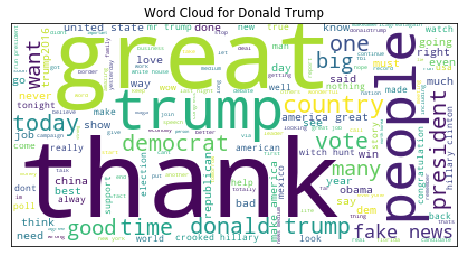

In [21]:
# Word Cloud
wc = WordCloud(background_color='white').generate(' '.join(trump_words))
plt.figure(figsize=(8,8))
plt.xticks([])
plt.yticks([])
plt.imshow(wc)
plt.title('Word Cloud for Donald Trump');

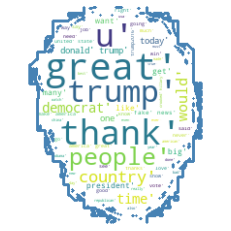

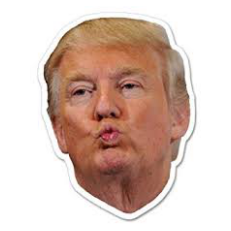

In [22]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = str(trump_words)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "trump3.jfif")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "trump_bnw_wordcloud.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

Trump Frequently used words: Great, People, Thank, Country

In [23]:
from gensim import corpora, models, similarities

In [24]:
import tempfile
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "C:\Users\jaymj\AppData\Local\Temp" will be used to save temporary dictionary and corpus.


In [25]:
# removing common words and tokenizing
from nltk.corpus import stopwords
from string import punctuation
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1
texts=final_trump_words
# texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference

#print(dictionary)
#print(dictionary.token2id)

2019-12-12 18:24:18,293 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-12-12 18:24:18,469 : INFO : adding document #10000 to Dictionary(13317 unique tokens: ['addressed', 'commitment', 'contracting', 'defense', 'eddie']...)
2019-12-12 18:24:18,587 : INFO : adding document #20000 to Dictionary(19015 unique tokens: ['addressed', 'commitment', 'contracting', 'defense', 'eddie']...)
2019-12-12 18:24:18,619 : INFO : built Dictionary(20184 unique tokens: ['addressed', 'commitment', 'contracting', 'defense', 'eddie']...) from 22538 documents (total 262455 corpus positions)
2019-12-12 18:24:18,620 : INFO : saving Dictionary object under C:\Users\jaymj\AppData\Local\Temp\elon.dict, separately None
2019-12-12 18:24:18,628 : INFO : saved C:\Users\jaymj\AppData\Local\Temp\elon.dict


In [26]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)

2019-12-12 18:24:18,811 : INFO : storing corpus in Matrix Market format to C:\Users\jaymj\AppData\Local\Temp\elon.mm
2019-12-12 18:24:18,812 : INFO : saving sparse matrix to C:\Users\jaymj\AppData\Local\Temp\elon.mm
2019-12-12 18:24:18,812 : INFO : PROGRESS: saving document #0
2019-12-12 18:24:18,830 : INFO : PROGRESS: saving document #1000
2019-12-12 18:24:18,848 : INFO : PROGRESS: saving document #2000
2019-12-12 18:24:18,870 : INFO : PROGRESS: saving document #3000
2019-12-12 18:24:18,891 : INFO : PROGRESS: saving document #4000
2019-12-12 18:24:18,912 : INFO : PROGRESS: saving document #5000
2019-12-12 18:24:18,933 : INFO : PROGRESS: saving document #6000
2019-12-12 18:24:18,956 : INFO : PROGRESS: saving document #7000
2019-12-12 18:24:18,975 : INFO : PROGRESS: saving document #8000
2019-12-12 18:24:18,990 : INFO : PROGRESS: saving document #9000
2019-12-12 18:24:19,005 : INFO : PROGRESS: saving document #10000
2019-12-12 18:24:19,019 : INFO : PROGRESS: saving document #11000
2019-

In [27]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

2019-12-12 18:24:19,178 : INFO : collecting document frequencies
2019-12-12 18:24:19,178 : INFO : PROGRESS: processing document #0
2019-12-12 18:24:19,201 : INFO : PROGRESS: processing document #10000
2019-12-12 18:24:19,217 : INFO : PROGRESS: processing document #20000
2019-12-12 18:24:19,222 : INFO : calculating IDF weights for 22538 documents and 20184 features (252848 matrix non-zeros)


In [28]:
total_topics = 4
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
#Show first n important word in the topics:
lda.show_topics(total_topics,5)

2019-12-12 18:24:19,271 : INFO : using symmetric alpha at 0.25
2019-12-12 18:24:19,271 : INFO : using symmetric eta at 0.25
2019-12-12 18:24:19,274 : INFO : using serial LDA version on this node
2019-12-12 18:24:19,283 : INFO : running online (single-pass) LDA training, 4 topics, 1 passes over the supplied corpus of 22538 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2019-12-12 18:24:19,285 : INFO : PROGRESS: pass 0, at document #2000/22538
2019-12-12 18:24:20,126 : INFO : merging changes from 2000 documents into a model of 22538 documents
2019-12-12 18:24:20,135 : INFO : topic #0 (0.250): 0.013*"great" + 0.010*"democrat" + 0.009*"people" + 0.009*"president" + 0.009*"nothing" + 0.009*"trump" + 0.008*"republican" + 0.007*"would" + 0.007*"thank" + 0.007*"time"
2019-12-12 18:24:20,136 : INFO : topic #1 (0.250): 0.017*"great" + 0.011*"president" + 0.010*"democrat" + 0.009*"big" + 0.00

2019-12-12 18:24:24,233 : INFO : merging changes from 2000 documents into a model of 22538 documents
2019-12-12 18:24:24,238 : INFO : topic #0 (0.250): 0.029*"trump" + 0.009*"people" + 0.008*"donald" + 0.007*"great" + 0.006*"vote" + 0.006*"time" + 0.006*"get" + 0.006*"hillary" + 0.006*"want" + 0.006*"poll"
2019-12-12 18:24:24,239 : INFO : topic #1 (0.250): 0.015*"great" + 0.008*"people" + 0.006*"hillary" + 0.006*"country" + 0.006*"state" + 0.006*"big" + 0.005*"president" + 0.005*"trump" + 0.005*"u" + 0.005*"thank"
2019-12-12 18:24:24,240 : INFO : topic #2 (0.250): 0.034*"great" + 0.025*"thank" + 0.020*"america" + 0.018*"trump2016" + 0.017*"makeamericagreatagain" + 0.011*"new" + 0.011*"make" + 0.010*"trump" + 0.010*"tonight" + 0.010*"poll"
2019-12-12 18:24:24,241 : INFO : topic #3 (0.250): 0.011*"u" + 0.010*"hillary" + 0.008*"deal" + 0.007*"great" + 0.007*"much" + 0.006*"clinton" + 0.006*"country" + 0.006*"job" + 0.005*"poll" + 0.005*"thank"
2019-12-12 18:24:24,241 : INFO : topic diff=0

[(0,
  '0.042*"trump" + 0.021*"president" + 0.020*"donald" + 0.017*"run" + 0.012*"would"'),
 (1,
  '0.019*"via" + 0.011*"trump" + 0.010*"great" + 0.007*"golf" + 0.007*"hotel"'),
 (2,
  '0.038*"great" + 0.021*"america" + 0.017*"thank" + 0.016*"trump2016" + 0.014*"make"'),
 (3,
  '0.012*"u" + 0.010*"deal" + 0.009*"entrepreneur" + 0.009*"wait" + 0.007*"cant"')]

In [29]:
#data_lda
from collections import OrderedDict
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
#data_lda
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(4, 74)


In [30]:
df_lda

2016   amazing   america  apprentice       art      back  beautiful  \
0  0.006867  0.000000  0.000000    0.005431  0.000000  0.000000   0.000000   
1  0.000000  0.000000  0.000000    0.000000  0.000000  0.002914   0.004413   
2  0.000000  0.004061  0.021303    0.000000  0.000000  0.000000   0.000000   
3  0.000000  0.000000  0.000000    0.000000  0.004309  0.000000   0.000000   

       best   border  business     cant  celebrity     china      club  \
0  0.000000  0.00000  0.000000  0.00524   0.000000  0.000000  0.000000   
1  0.000000  0.00406  0.000000  0.00000   0.005794  0.000000  0.003513   
2  0.006889  0.00000  0.000000  0.00000   0.000000  0.000000  0.000000   
3  0.000000  0.00000  0.006278  0.00685   0.000000  0.003898  0.000000   

    country       day        dc     deal    donald      dont  ...       say  \
0  0.007136  0.000000  0.000000  0.00000  0.020354  0.006425  ...  0.004997   
1  0.005864  0.000000  0.003673  0.00000  0.004042  0.000000  ...  0.000000   
2  0.000000  0.004783  0.000000  0.00000  0.000000  0.000000  ...  0.000000   
3  0.006757  0.000000  0.000000  0.01049  0.000000  0.003756  ...  0.000000   

     season       see      show       sir     state     thank    thanks  \
0  0.000000  0.000000  0.005831  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.004507  0.000000  0.000000   
2  0.005892  0.003817  0.000000  0.000000  0.000000  0.016788  0.012395   
3  0.000000  0.000000  0.000000  0.004467  0.000000  0.000000  0.000000   

      think     today  tomorrow  tonight     trump  trump2016         u  \
0  0.005213  0.000000  0.000000  0.00000  0.041560   0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.00000  0.011489   0.000000  0.005486   
2  0.000000  0.005149  0.004515  0.01046  0.012255   0.015948  0.000000   
3  0.000000  0.000000  0.000000  0.00000  0.000000   0.000000  0.011807   

        via     vote      wait     would      year  
0  0.000000  0.01043  0.000000  0.012142  0.000000  
1  0.019148  0.00000  0.000000  0.000000  0.000000  
2  0.000000  0.00000  0.000000  0.000000  0.004759  
3  0.006242  0.00000  0.008875  0.004543  0.000000  

[4 rows x 74 columns]

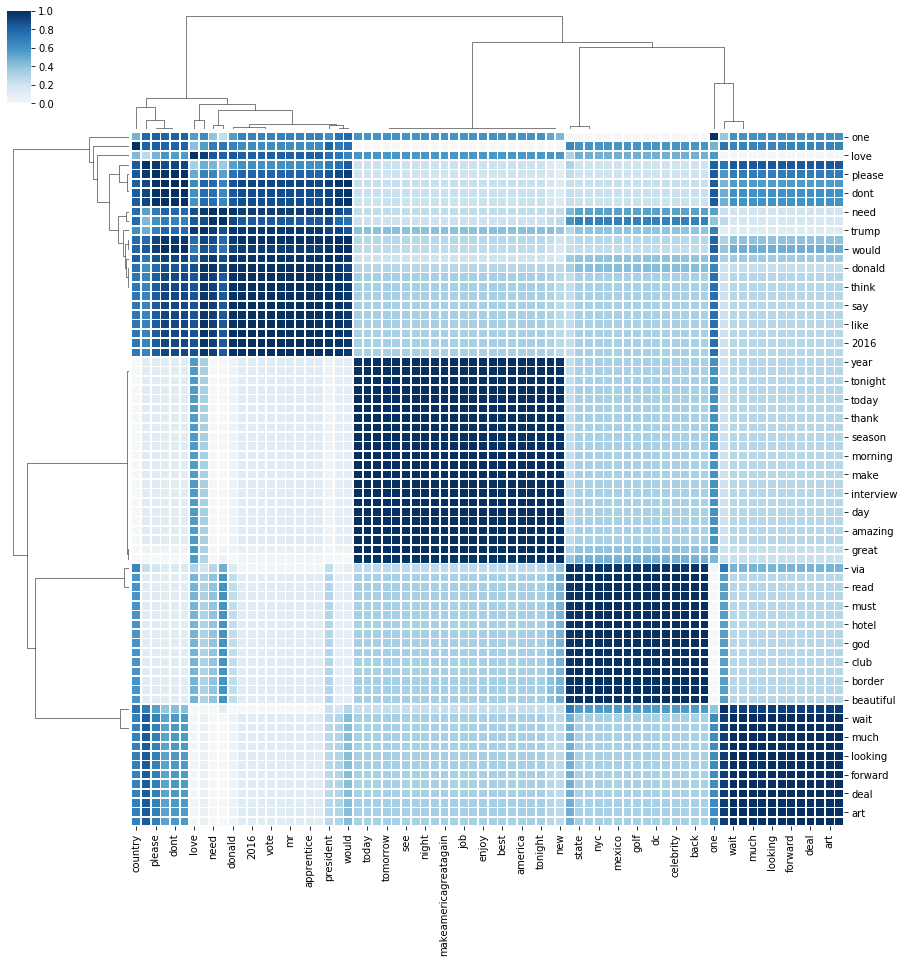

In [31]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [93]:
conda install -c memex pyldavis

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - pyldavis -> python=2.7

Your python: python=3.7

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a diff

In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

# 3. Miscellaneous Methods for Data Visualization

In [82]:

import numpy as np
import pandas as pd

In [83]:
df = pd.read_csv('cleaned_trump.csv',low_memory=False)

In [84]:
df['urls'] = df['urls'].map(eval)
df['photos'] = df['photos'].map(eval)
df['mentions'] = df['mentions'].map(eval)

In [85]:
mentions = [name.strip() for name_li in df["mentions"].values for name in (name_li)]

mentions= pd.DataFrame([mentions,[1]*len(mentions)]).T.groupby(0).count().sort_values(by=1,ascending=False)

In [86]:
mentions.drop(["realdonaldtrump"],inplace=True)
mentions.columns = ['mention_count']

In [87]:
mentions['id'] = range(1,mentions.shape[0]+1)

In [88]:
mentions_name = mentions.index.values
mentions_id = mentions['id'].values
mentions_count = mentions['mention_count'].values

In [89]:
mentions_count = mentions_count/np.sum(mentions_count)
mentions_id = [int(x) for x in mentions_id]

### 3.1 Connection Web

In [91]:
from pyvis.network import Network

mention_g = Network(height="750px", width="100%", bgcolor="#222222", font_color="white",notebook=True)
mention_g.barnes_hut()
num_vis = 100
mention_g.add_nodes(mentions_id[:num_vis] ,label=mentions_name [:num_vis])

mention_g.add_node(0,label='realtrump')
for mid,w in zip(mentions_id [:num_vis] ,mentions_count[:num_vis] ):
    mention_g.add_edge(0, mid, weight=w)
mention_g.show("mention.html")

Among all the people who being mentioned by the two presidents, Obama maintais a close relationship with nytimes. 

In [11]:
df['date'] = pd.to_datetime(df['date'])
df['period'] =df['date'].dt.to_period("Q")

In [12]:
%matplotlib inline
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


### 3.2 Time Series Graph

Text(0.5, 1.0, 'nb_tweets by quater')

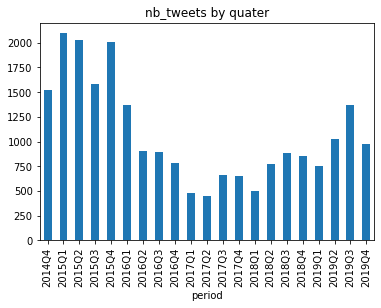

In [13]:
df.groupby('period').count()["id"].plot(kind="bar")
plt.title("nb_tweets by quater")

In 2017 Q1 and Q2, Trump was least active in Tweet, which is quite interesting, perhaps because he was busy when he just became a president and he needed some time to fit in with the presidential life.

In [14]:
prods = pd.DataFrame({'hour':range(1, 25)})

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']




In [15]:
get_hour = lambda x:int(x[:x.index(":")])

In [16]:
df["hour"] = df['time'].map(get_hour)

df["session"] = pd.cut(df['hour'], bins=b, labels=l)

Text(0.5, 1.0, 'nb_tweets by session')

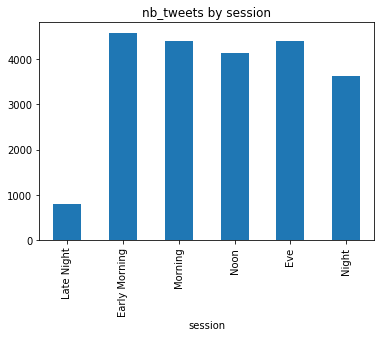

In [17]:
df.groupby("session").count()["id"].plot(kind="bar")
plt.title("nb_tweets by session")

Trump tweets on the eary morning, and also at night. It looks like he tweets whenever he is awake.

In [18]:
keywords = ["immigrant","fake","china","america","job"]

In [19]:
keyword_df = df[['tweet','period','session']].copy()

In [20]:
for k in keywords:
    keyword_df[k] = keyword_df["tweet"].apply(lambda x:1 if k in x.lower() else 0)

### 3.3 Bar Chart

Text(0.5, 1.0, 'nb_tweets by keywords')

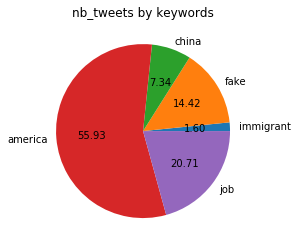

In [21]:
keyword_df[keywords].sum(0).plot.pie(autopct="%.2f")
plt.ylabel("")
plt.title("nb_tweets by keywords")

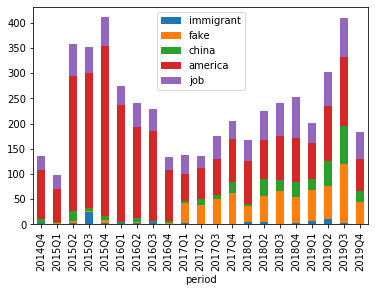

In [22]:
keyword_df.groupby("period")[keywords].sum().plot.bar(stacked=True)

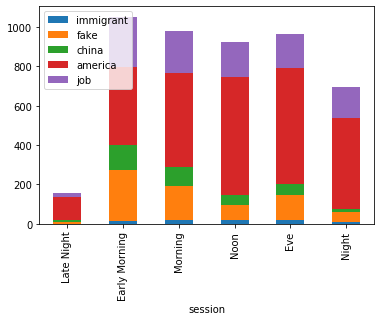

In [23]:
keyword_df.groupby("session")[keywords].sum().plot.bar(stacked=True)

Trump likes to talk about fake news on the early morning most, which perhaps because people tend to get angry at the things most when they just get up.

In [24]:
hot_df = df[["id","replies_count","retweets_count","likes_count","period"]].copy()

Text(0.5, 1.0, 'pop by period')

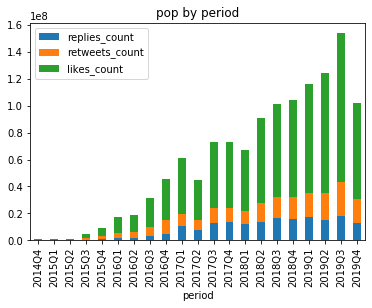

In [25]:
hot_df.groupby("period")["replies_count","retweets_count","likes_count"].sum().plot.bar(stacked=True)
plt.title("pop by period")

Over time, we can see that more and more people like to read Trump's tweets, and the number of replies, retweets and likes are all increasing over time.

In [26]:
keyword_hot_df  = df[["replies_count","retweets_count","likes_count","period","tweet"]].copy()

In [27]:
for k in keywords:
    keyword_hot_df[k] = keyword_hot_df["tweet"].apply(lambda x:1 if k in x.lower() else 0)

In [28]:
keyword_hot_df = keyword_hot_df[keyword_hot_df[keywords].sum(axis=1)!=0]

In [29]:

kw_ht =  []
for k in keywords:
    row = keyword_hot_df[keyword_hot_df[k]==1][["replies_count","retweets_count","likes_count"]].sum(axis=0)
    row["keyword"] = k
    kw_ht.append(row)
kw_ht=  pd.DataFrame(kw_ht)

In [30]:
kw_ht.set_index("keyword",drop=True,inplace=True)

In [31]:
kw_ht

replies_count  retweets_count  likes_count
keyword                                              
immigrant         888687         1073934      4179987
fake            17633164        14649016     62232030
china            3990533         5425708     24474176
america         19440545        24955142    101816023
job              9449157        11785364     52374277

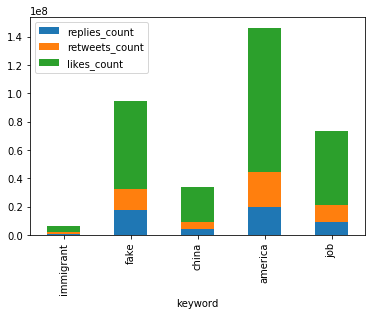

In [32]:
kw_ht.plot.bar(stacked=True)



From this graph above, we can see that Trump's followers most like replying the America topics and they love to add "likes" to all kinds of topics. 

### 3.4 Colormaps

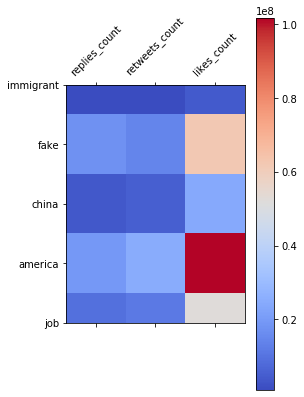

In [33]:
plt.matshow(kw_ht,cmap="coolwarm")
plt.xticks(range(3),kw_ht.columns,rotation=45)
plt.yticks(range(len(keywords)),kw_ht.index)
plt.colorbar()



From the graph above, we can see that  
1.**Netizens loves to read Trump's tweets about America, and fake news (Yes, people love to watch the fight war between president and CNN) and then job.**

2.Among the three index aformentioned, the result typical is similar with the result mentioned before, which means **the followers are active ones and trump does not buy fake followers to advertize his twitters.**  

3.In terms of the actions by the followers, we can see that most of people prefer to click the "like" bottom and do not like to type and write comments. **Even you are a president, we just do not want to talk to you! :)***

In [34]:
cols = ["replies_count","retweets_count","likes_count"]
cols.extend(keywords)
keyword_hot_df[cols]

replies_count  retweets_count  likes_count  immigrant  fake  china  \
0               3785            7696        28138          0     0      0   
6               3987            6088        18615          0     1      0   
24              5316            9475        36290          0     0      0   
26              7870           17596        66550          0     0      0   
36              1232            6305        21042          0     0      0   
...              ...             ...          ...        ...   ...    ...   
22457             39              70           41          1     0      0   
22458            159             610          862          0     0      0   
22471            535            1569         1797          0     0      0   
22484             16              20           67          0     0      0   
22524             64              76          132          0     0      0   

       america  job  
0            0    1  
6            0    0  
24           1    0  
26           1    0  
36           1    0  
...        ...  ...  
22457        0    0  
22458        1    0  
22471        1    0  
22484        1    0  
22524        1    0  

[4586 rows x 8 columns]

### 3.5 ScatterPlot for Linear Regression

In [35]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa2bf96790>,
      dtype=object)

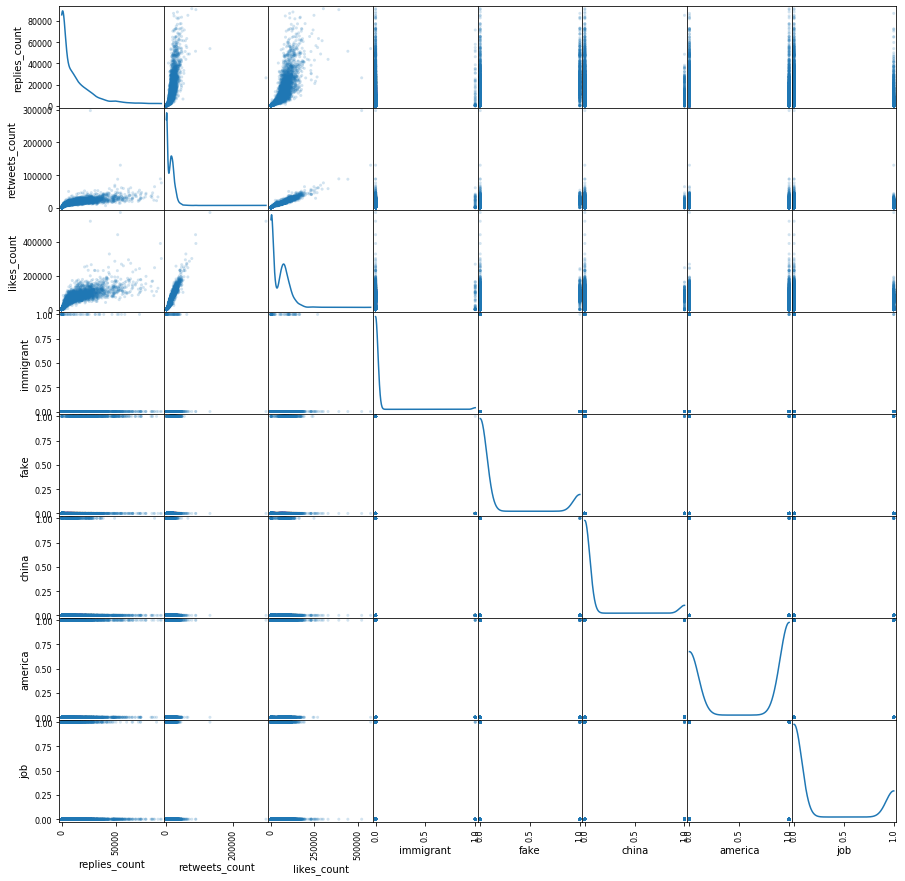

In [36]:
scatter_matrix(keyword_hot_df[cols], alpha=0.2, figsize=(15,15), diagonal='kde')

1. Looking at the left above nine graphs, we can see **the positive relations among the number of likes, retweets and replies.**

2. Looking at the graphs located in the 3rd column, 1st to 3rd rows, we can see that the numbers of likes and replies are both more than that of retweets, which means that **some of the followers love Trump in a clandestine way and they do not want other people to get notice that they are Trump’s followers and speak for Trump.**. 

3. Considering the graph located in the 6th to 7th column and the 1st row, we can see that **the the number of people who replies to the topics containing "China" is less than the people who does not and in terms of the topics containing “America”, the situation is the other way around.**



In [37]:
sum(df["tweet"].apply(lambda x:"hillary" in x.lower()))

956

Text(0.5, 1.0, 'tweet type')

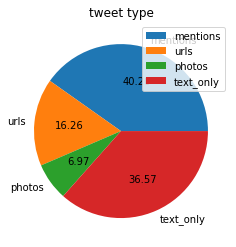

In [38]:
tweet_type = df[['period','mentions','urls','photos',]].copy()

for c in ['mentions','urls','photos']:
    tweet_type[c] = tweet_type[c].apply(lambda x:1 if len(x) >0 else 0)

tweet_type["text_only"] =tweet_type[['mentions','urls','photos']].apply(lambda x: 1 if sum(x) ==0 else 0,axis=1)

tweet_type.sum(axis=0).plot.pie(autopct="%.2f")
plt.legend()
plt.ylabel("")
plt.title("tweet type")

Trump loves to mention people so much. And then he likes to tweet text only.

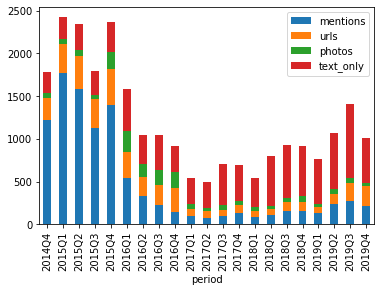

In [39]:
tt_grp = tweet_type.groupby("period")

tt_grp.sum().plot.bar(stacked=True)

From this time seris graph, we can see that the preference for the mentions function has decreased over time, and he increasingly falls in love with the text only tweets.